In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# Pandas for managing datasets
import pandas as pd
import numpy as np
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
from datetime import datetime
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import scale_down,standardize_data, print_genetic_param, print_settings, set_movements, angle_diff
train_test_options = {"split": 25}

In [16]:
ship =  pd.read_csv("ships/SIEM PILOT.csv")
shipname = ship.loc[0]["SHIPNAME"]
ship = ship [["TIMESTAMP","LAT","LON","HEADING"]]
ship['TIMESTAMP'] = pd.to_datetime(ship['TIMESTAMP'])  
ship.sort_values('TIMESTAMP',inplace=True)
ship=ship.reset_index(drop=True)
# ship = scale_down(ship[0:500],train_test_options["split"])
n = 500  #chunk row size
ship_dfs = [ship[i:i+n] for i in range(0,ship.shape[0],n)]
ship_data_chunked = []
for idx,x in enumerate(ship_dfs):
    x = scale_down(x,train_test_options["split"])
    x = np.array(x["HEADING"].values.astype(int))
    if len(x) == train_test_options["split"]:
        ship_data_chunked.append(x)
ship_data_chunked = np.array(ship_data_chunked)
ship ={"shipname":shipname,"data":ship_data_chunked}
# print(ship["data"].shape)

# ship_dfs = [ship]

In [22]:
linestyle_tuple[3][1]

(0, (5, 10))

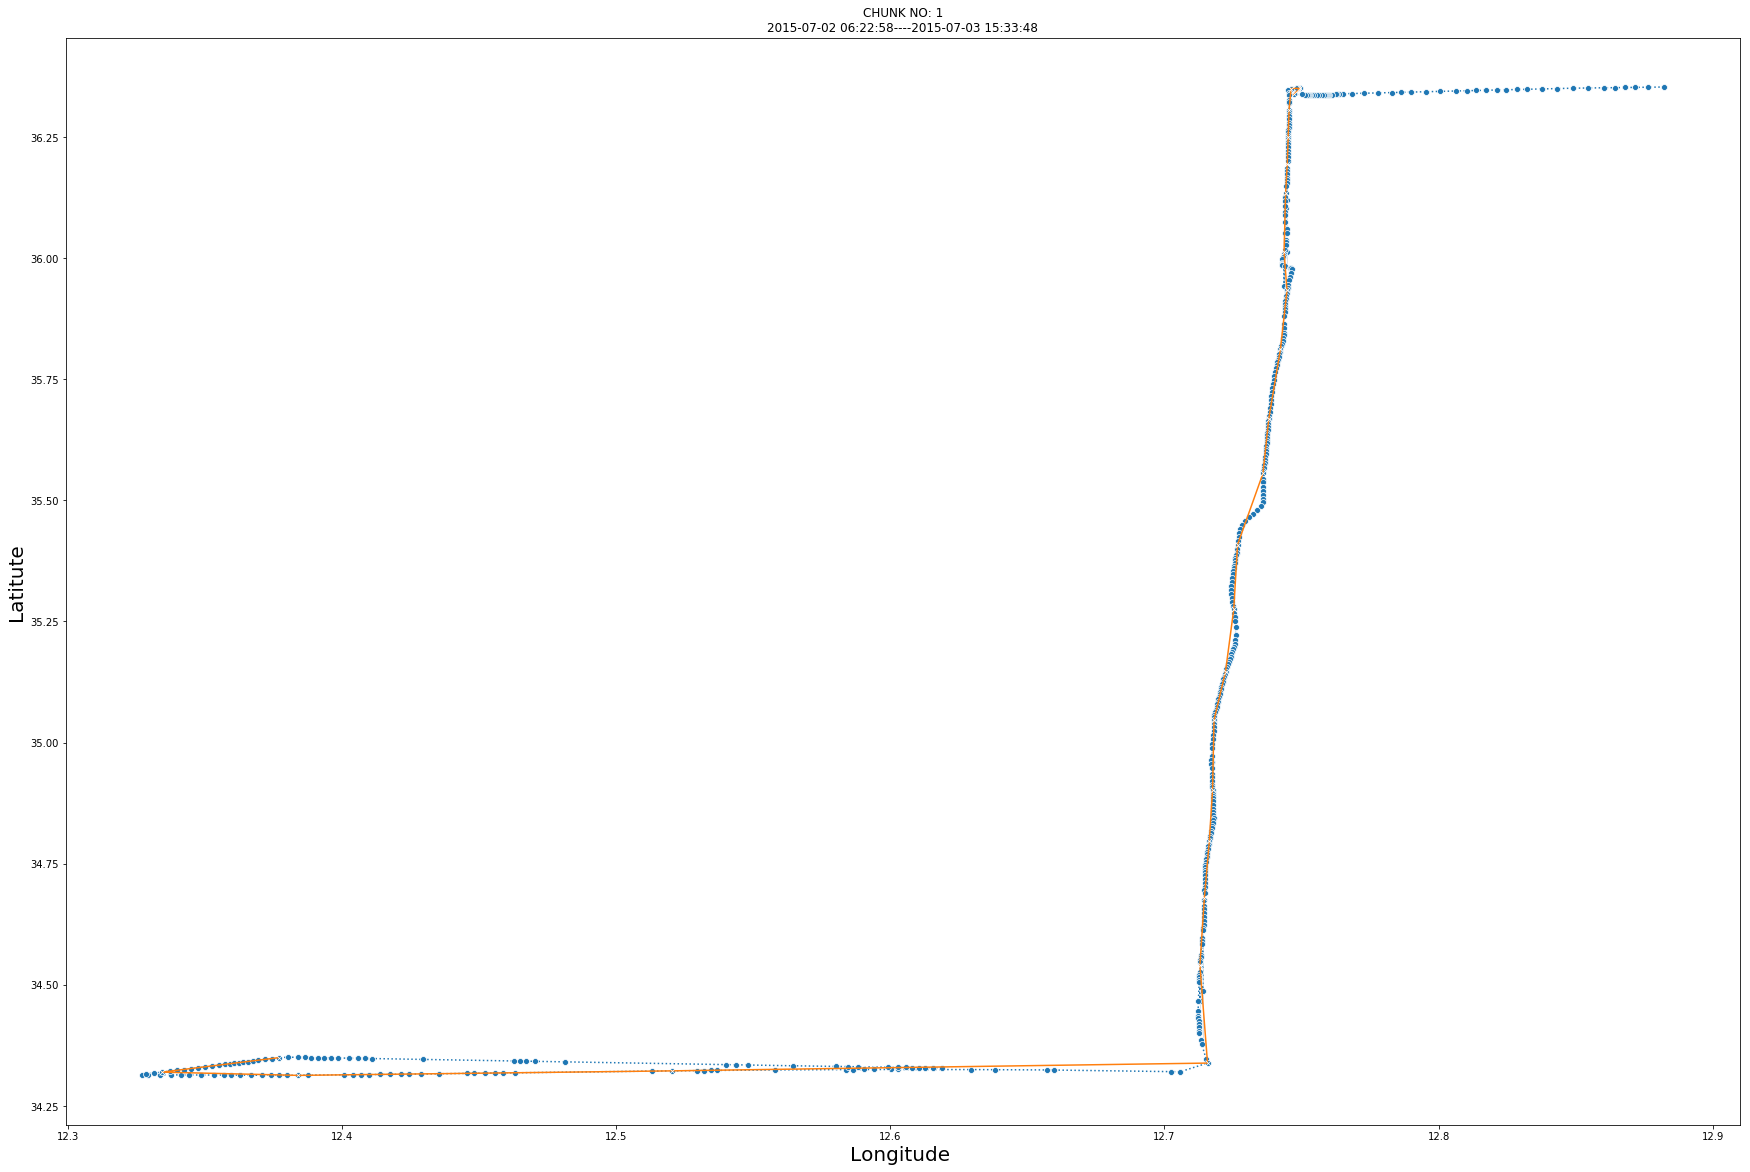

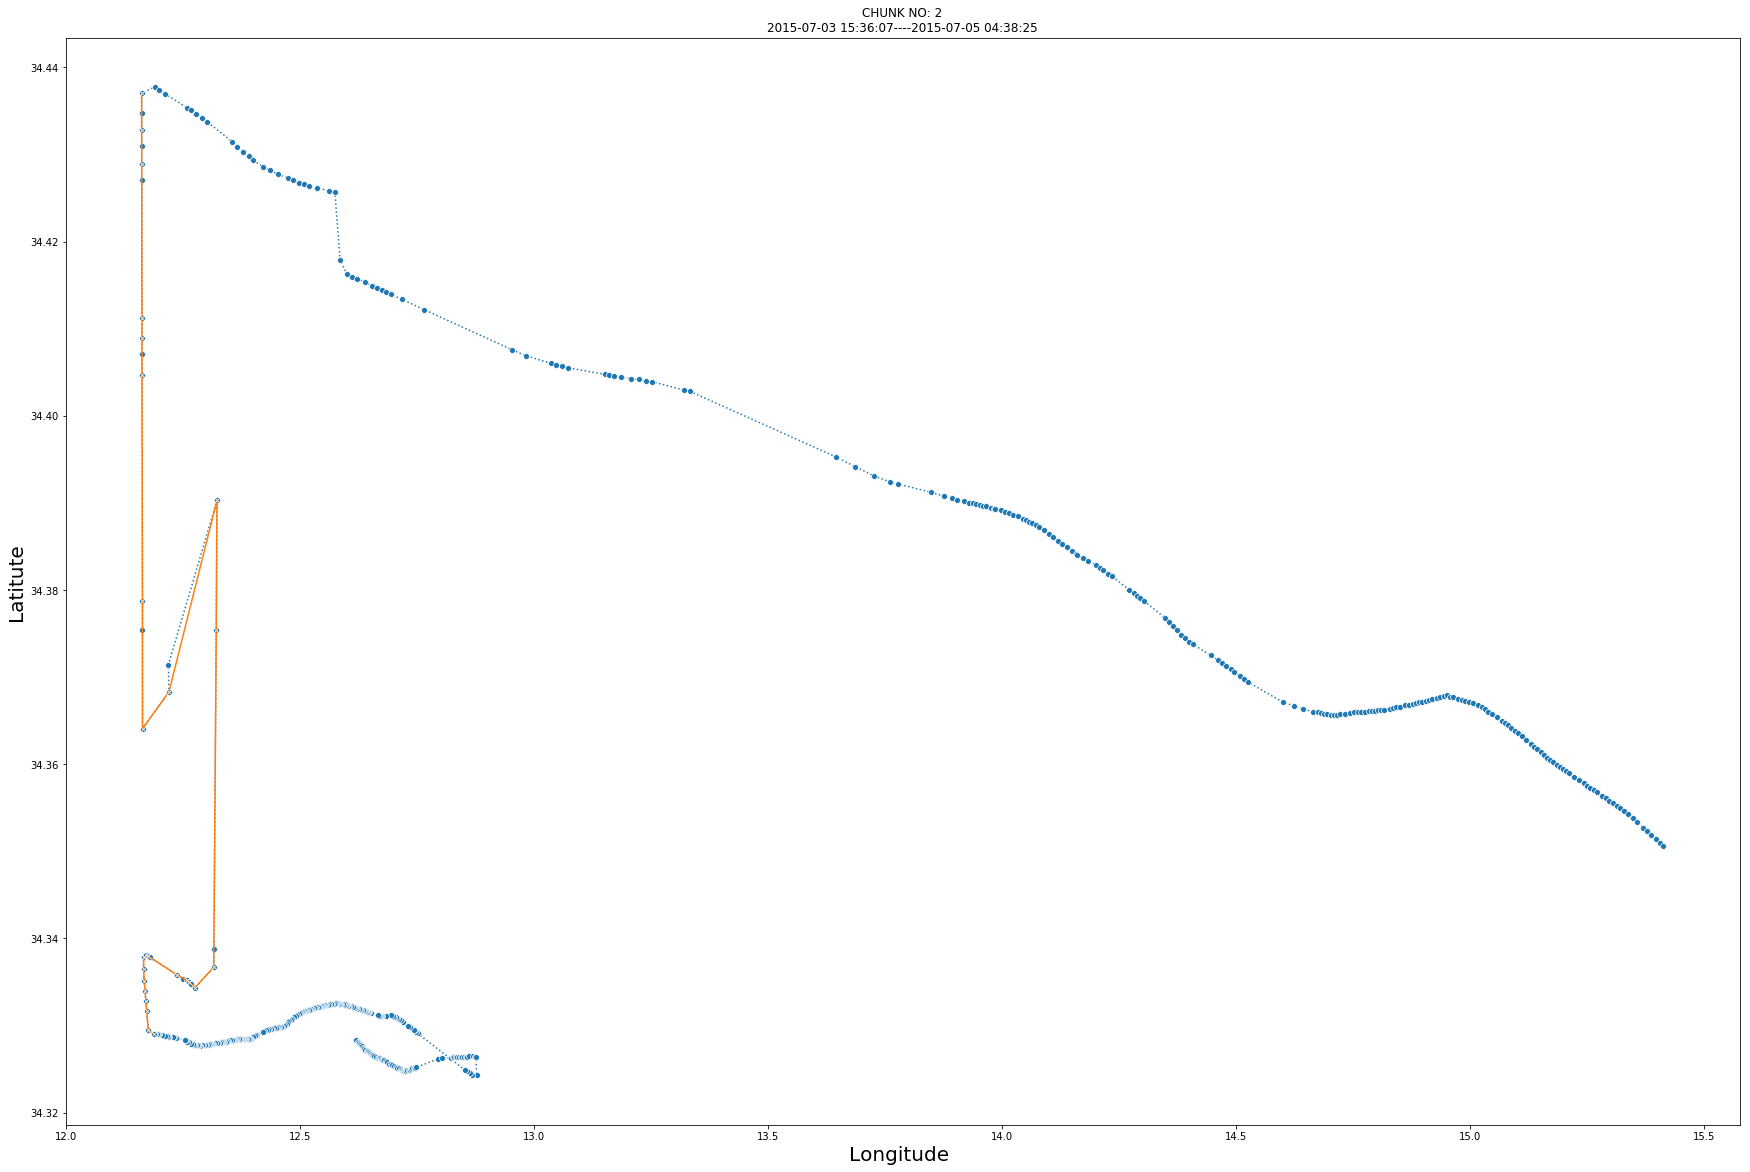

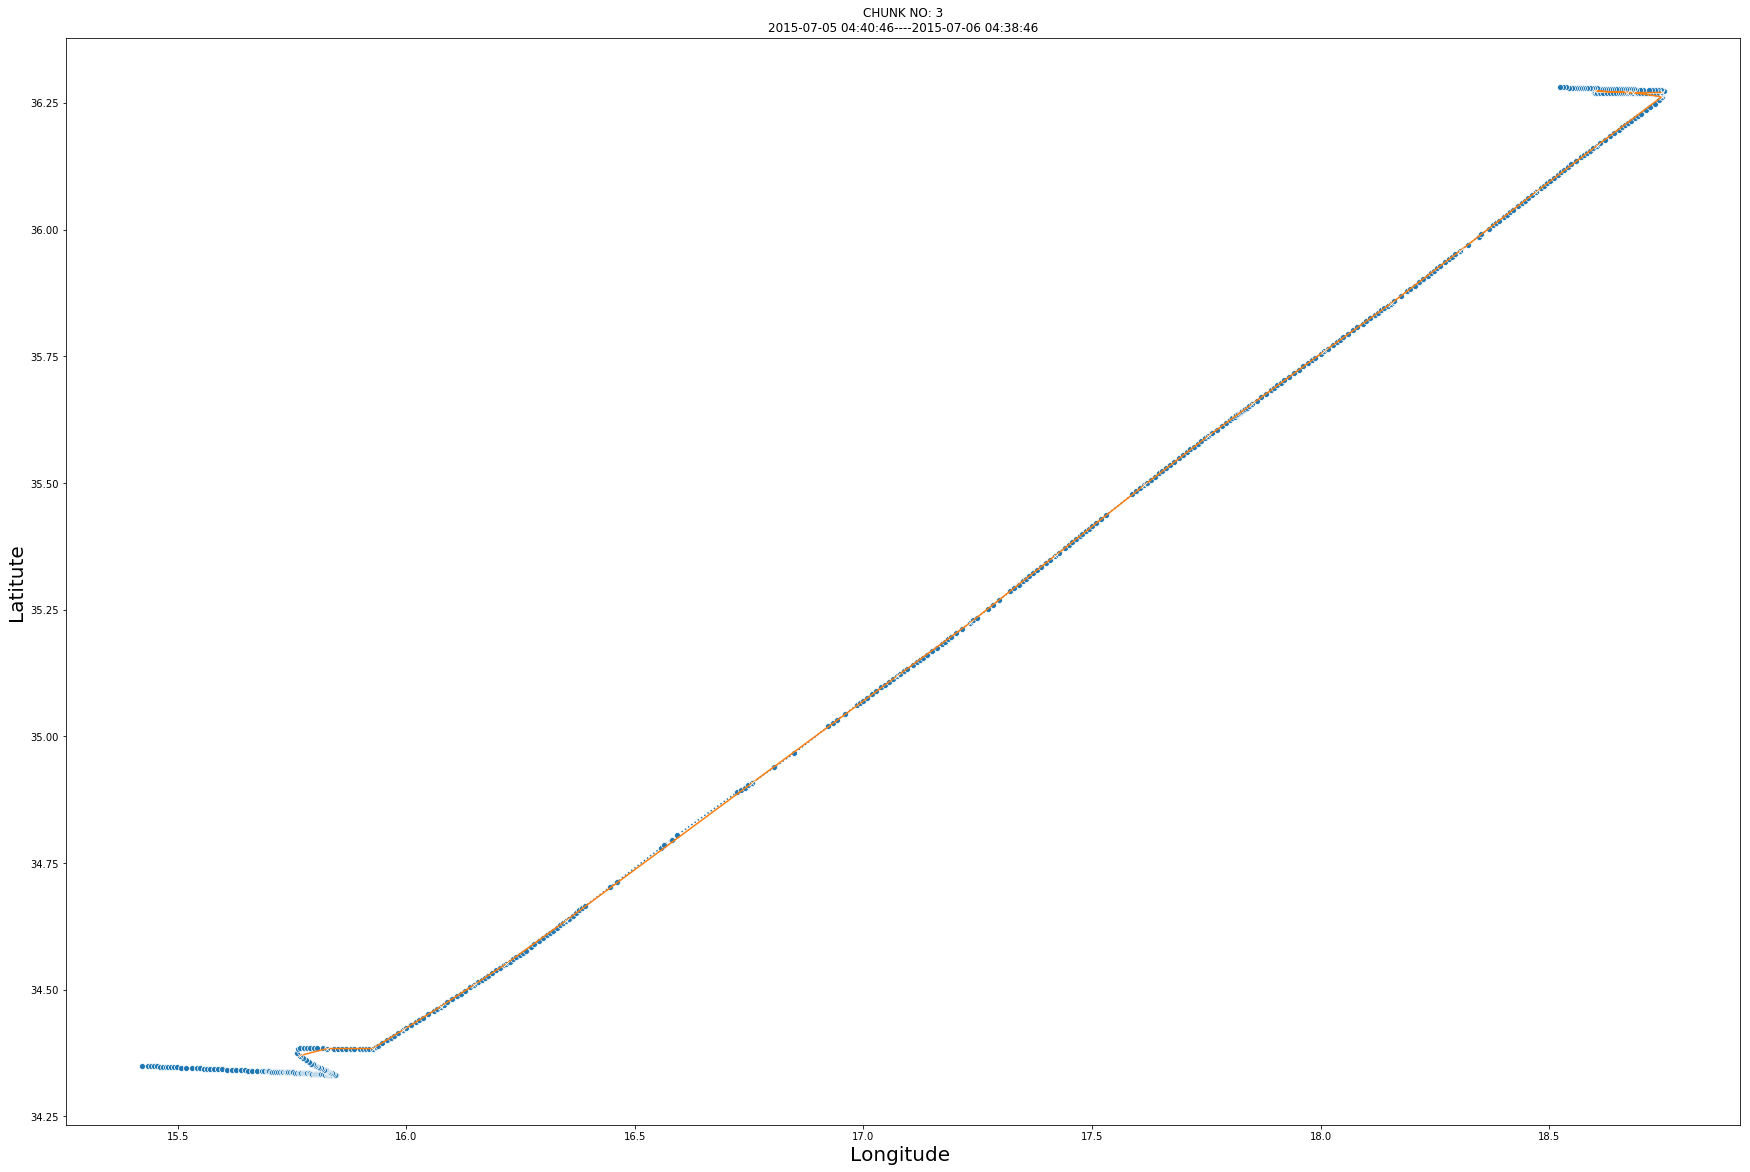

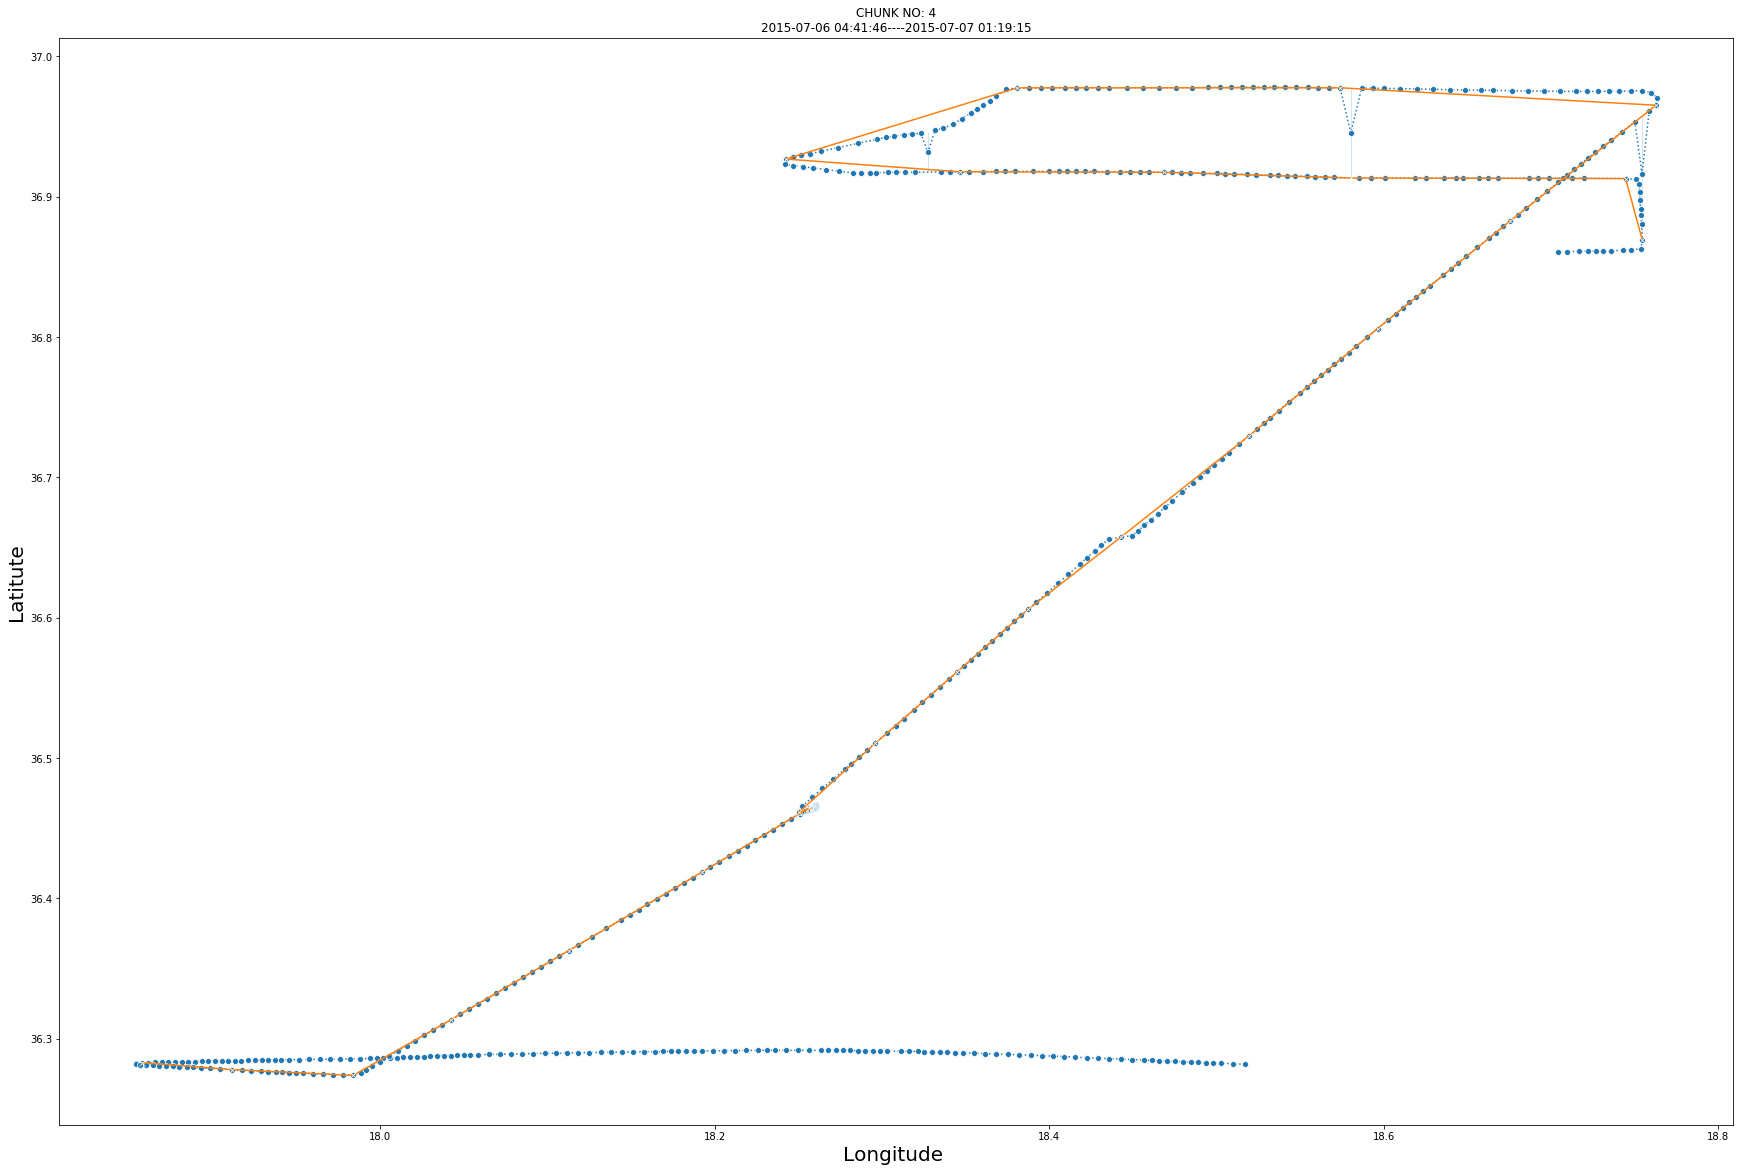

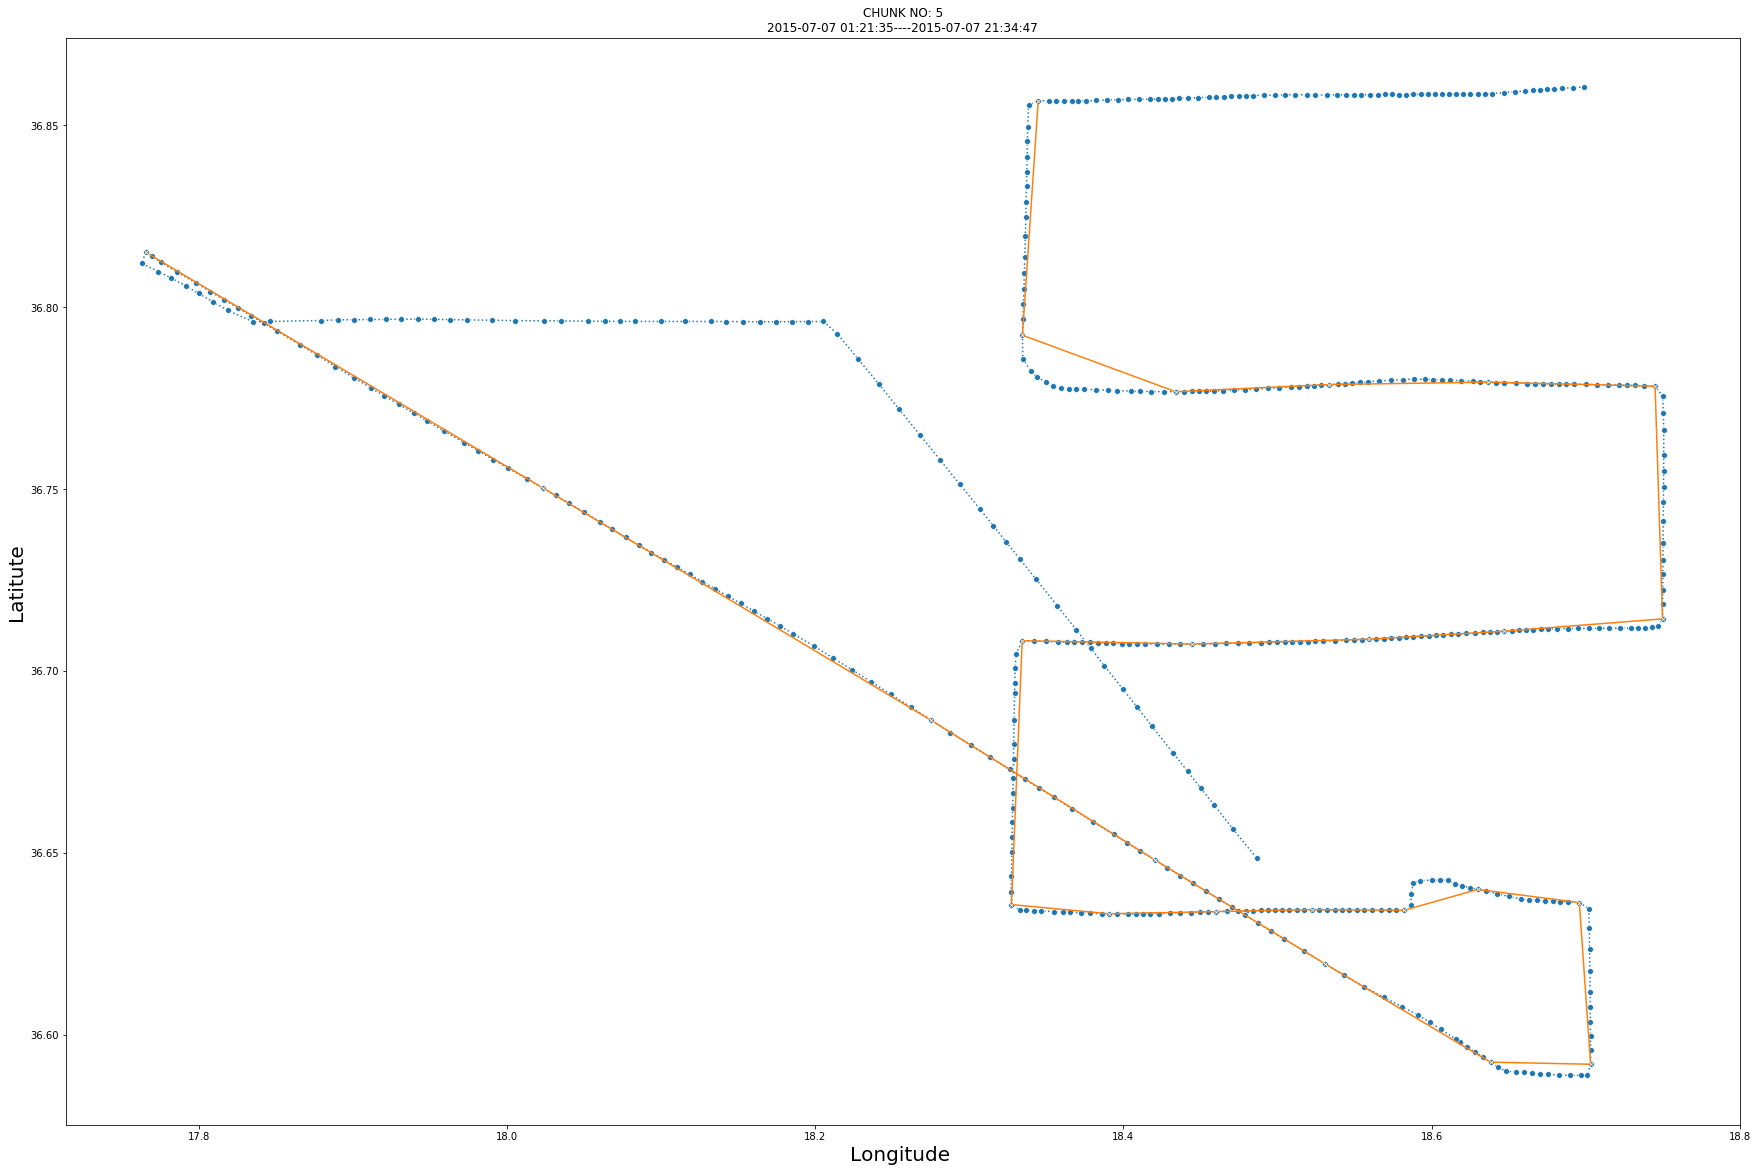

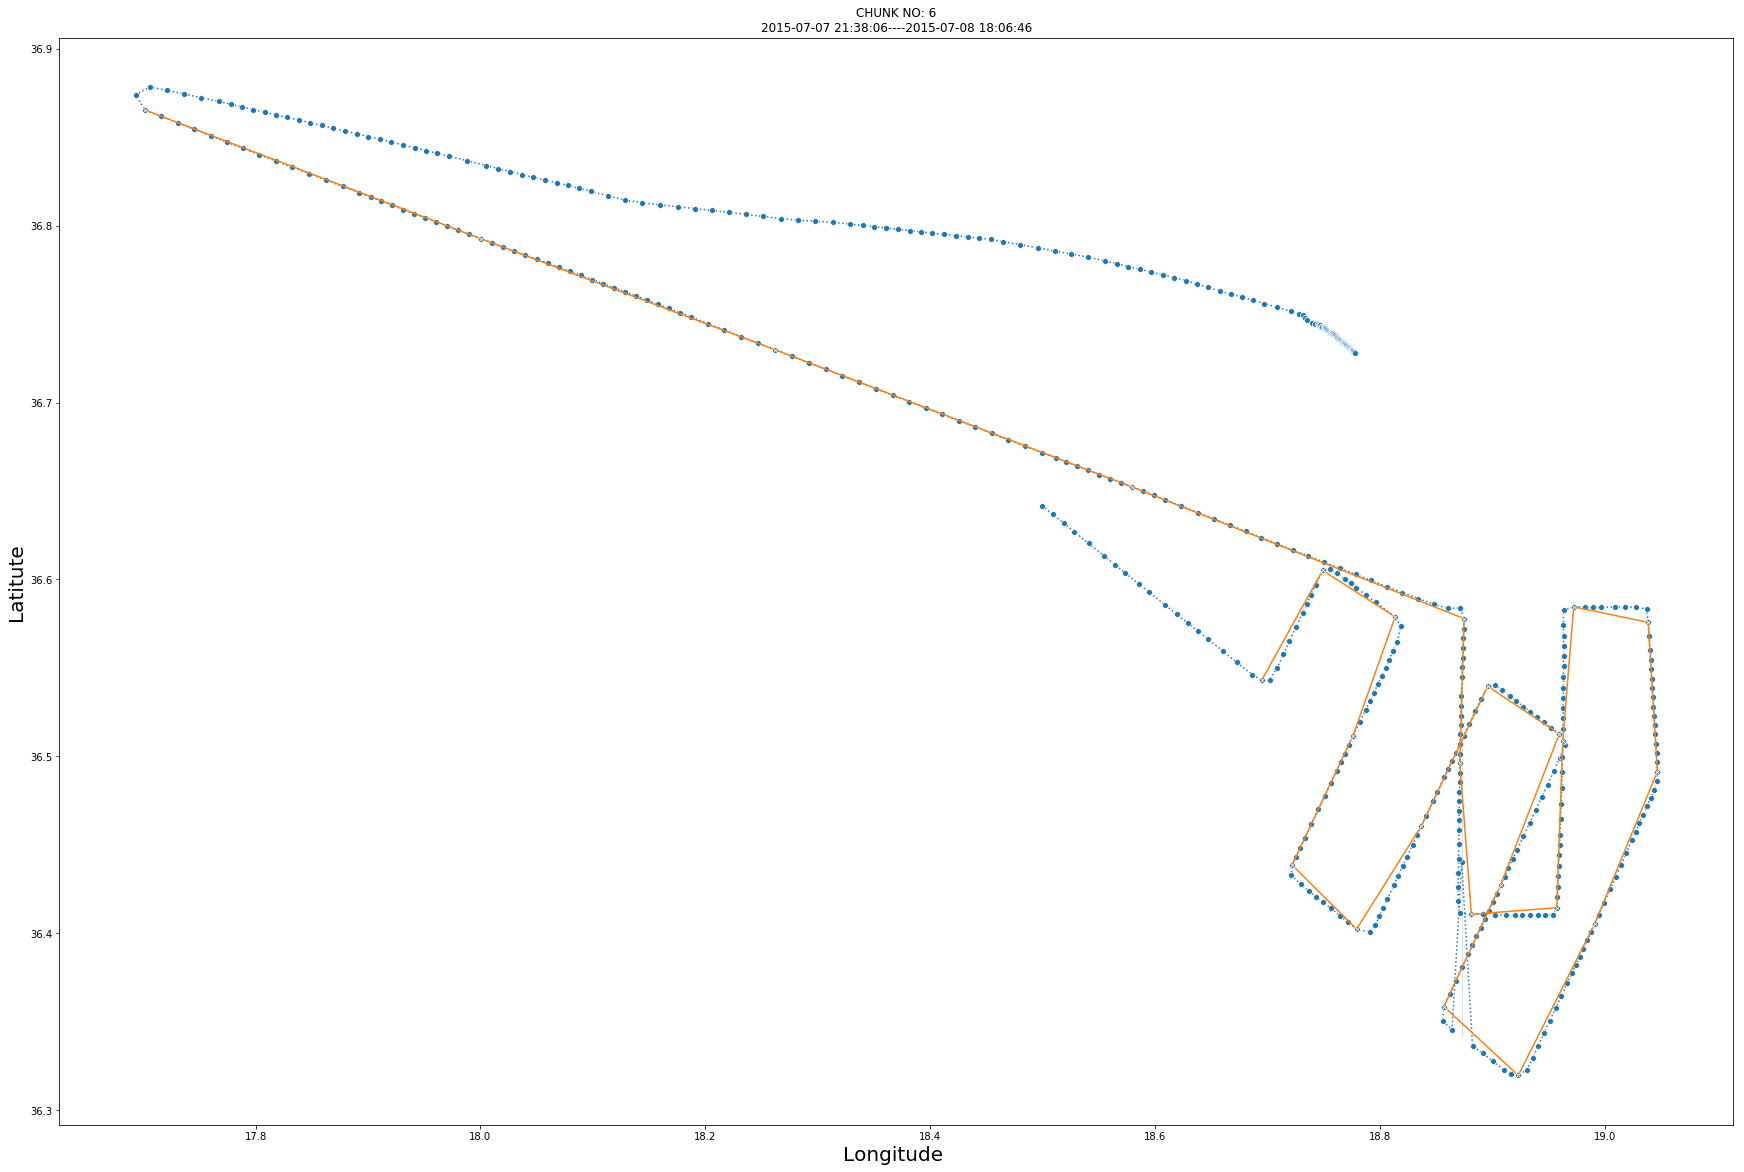

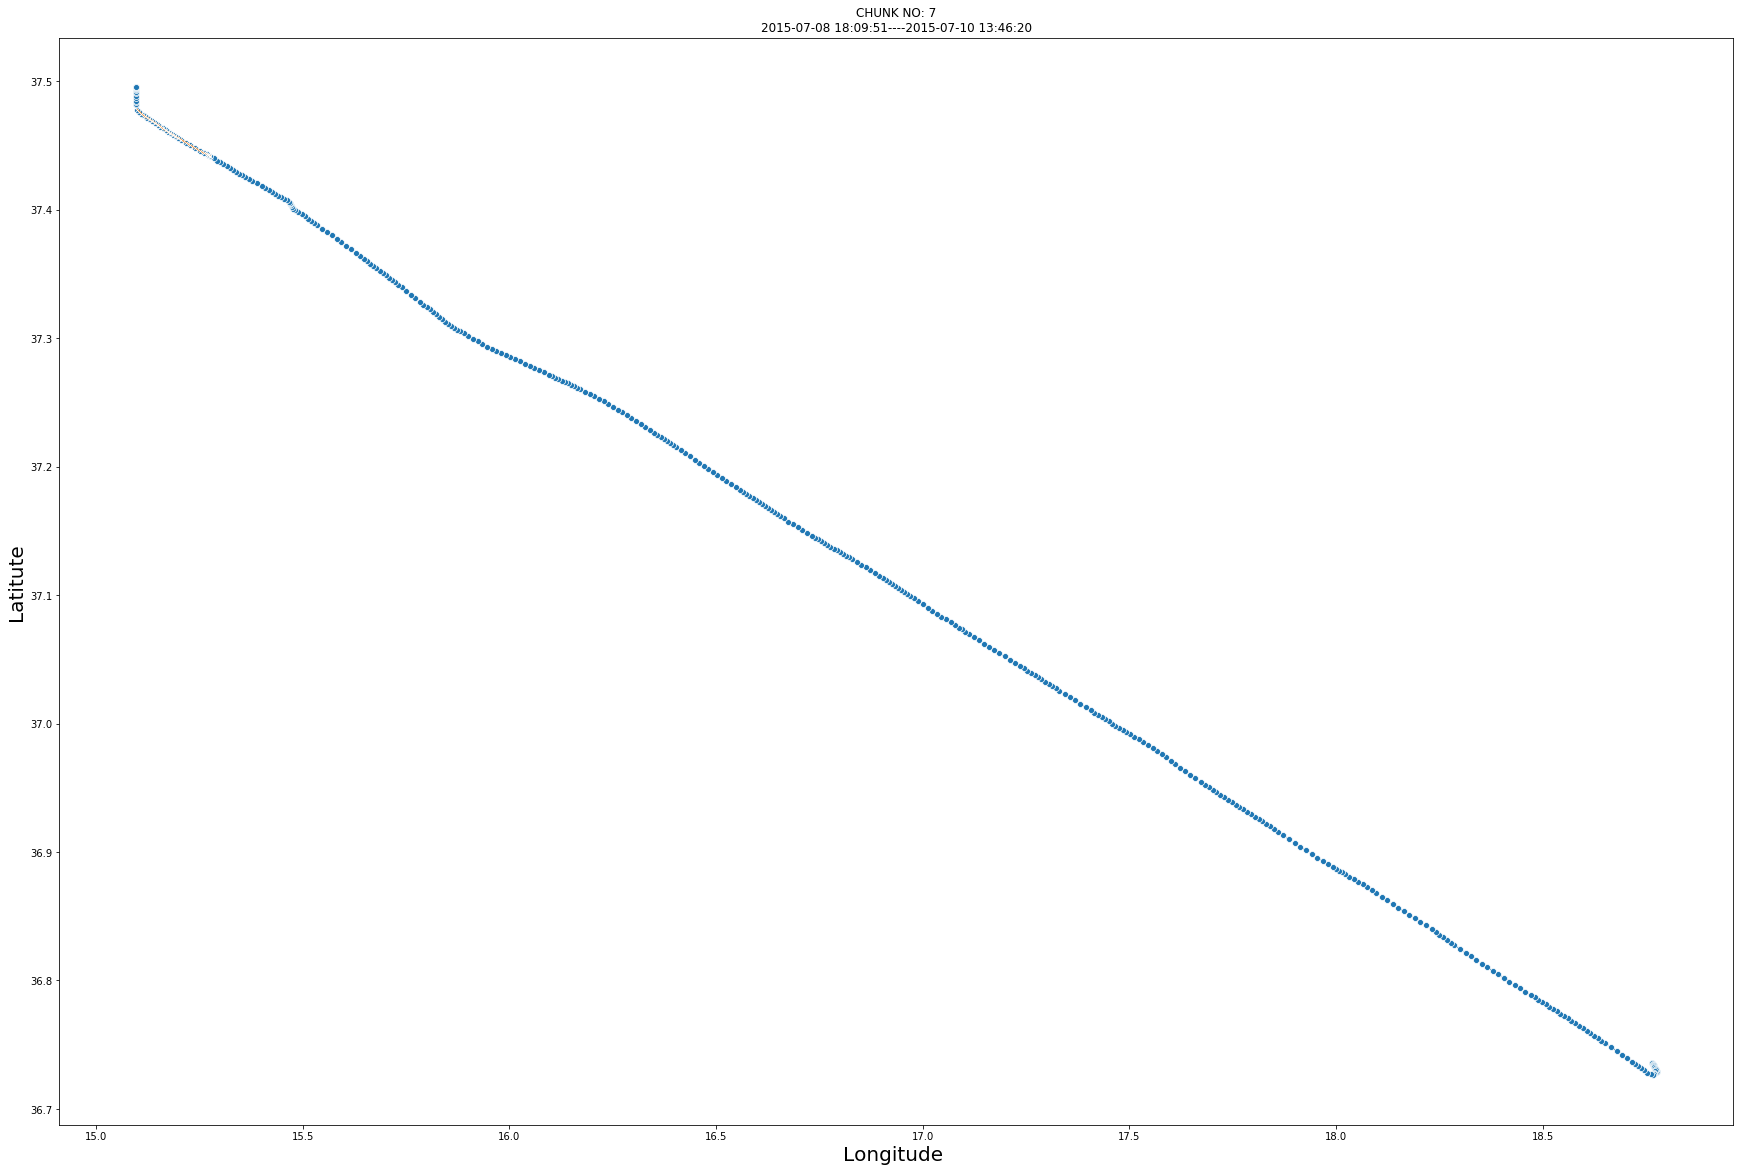

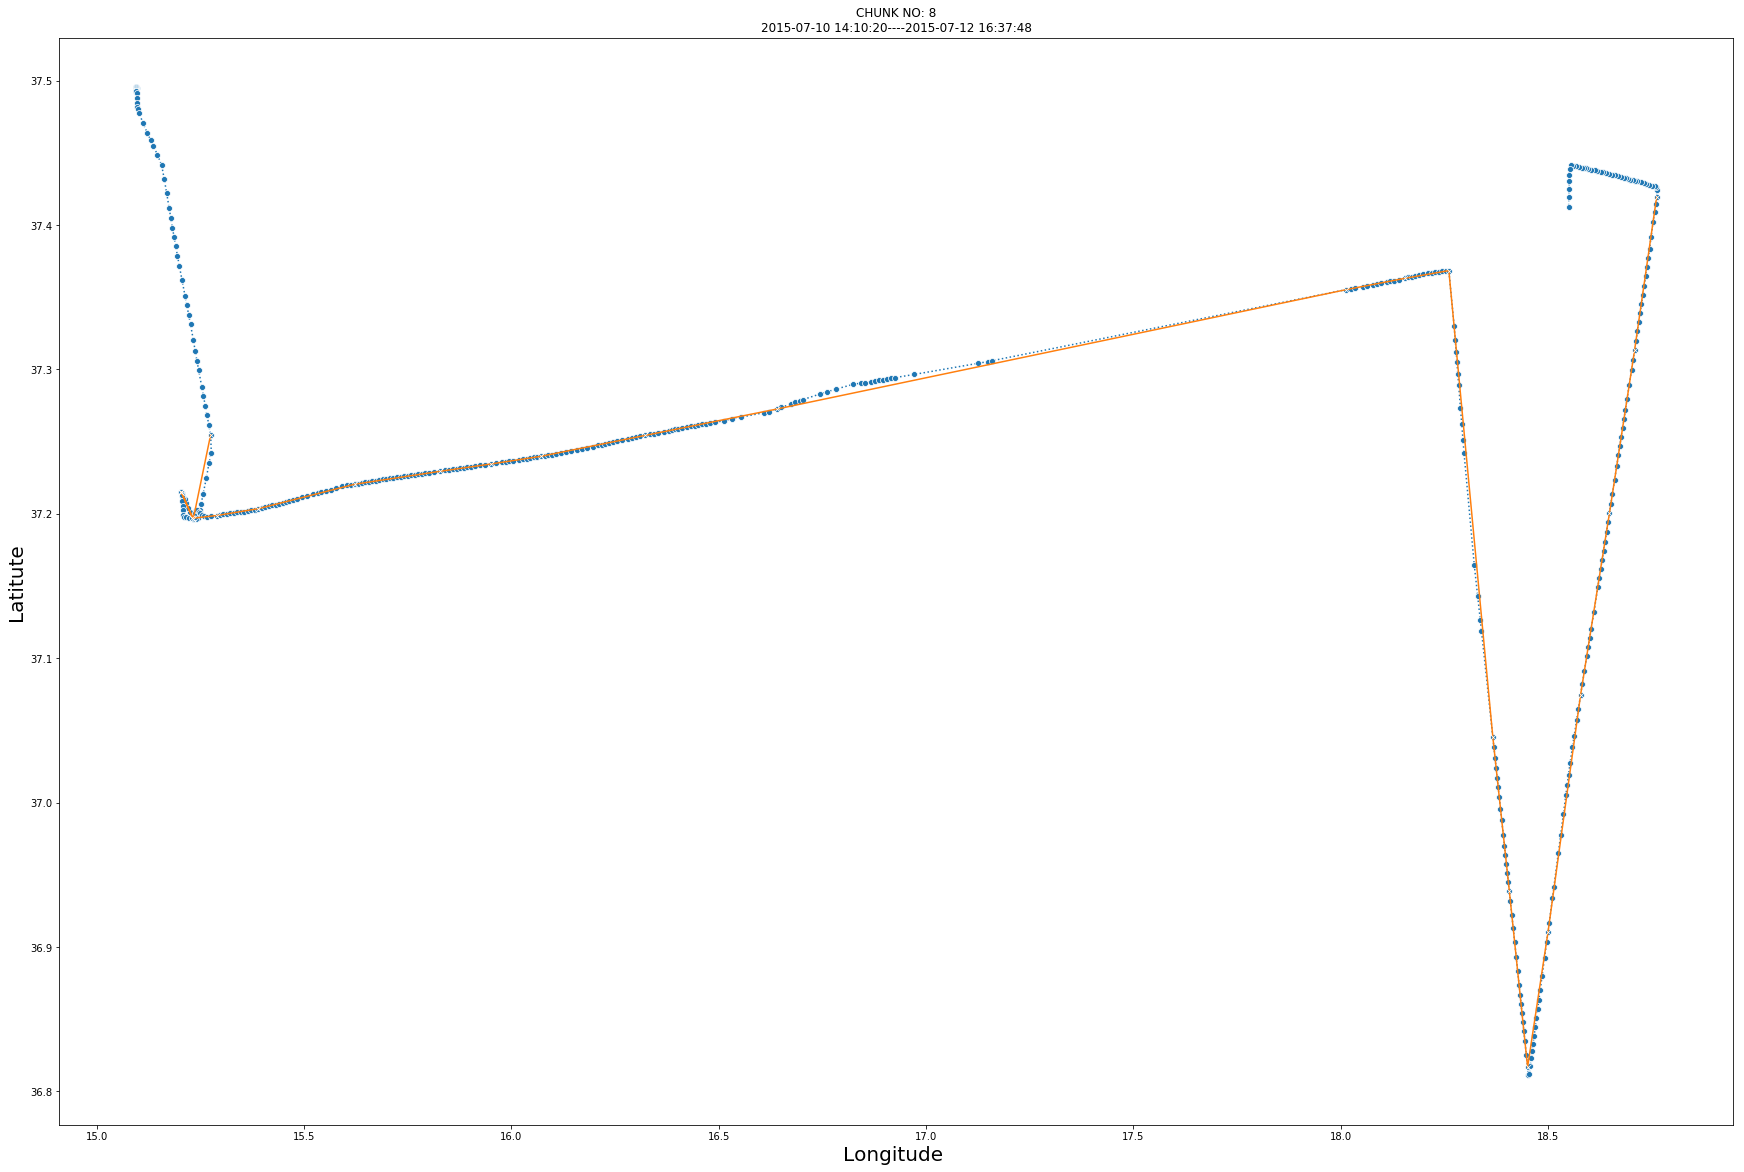

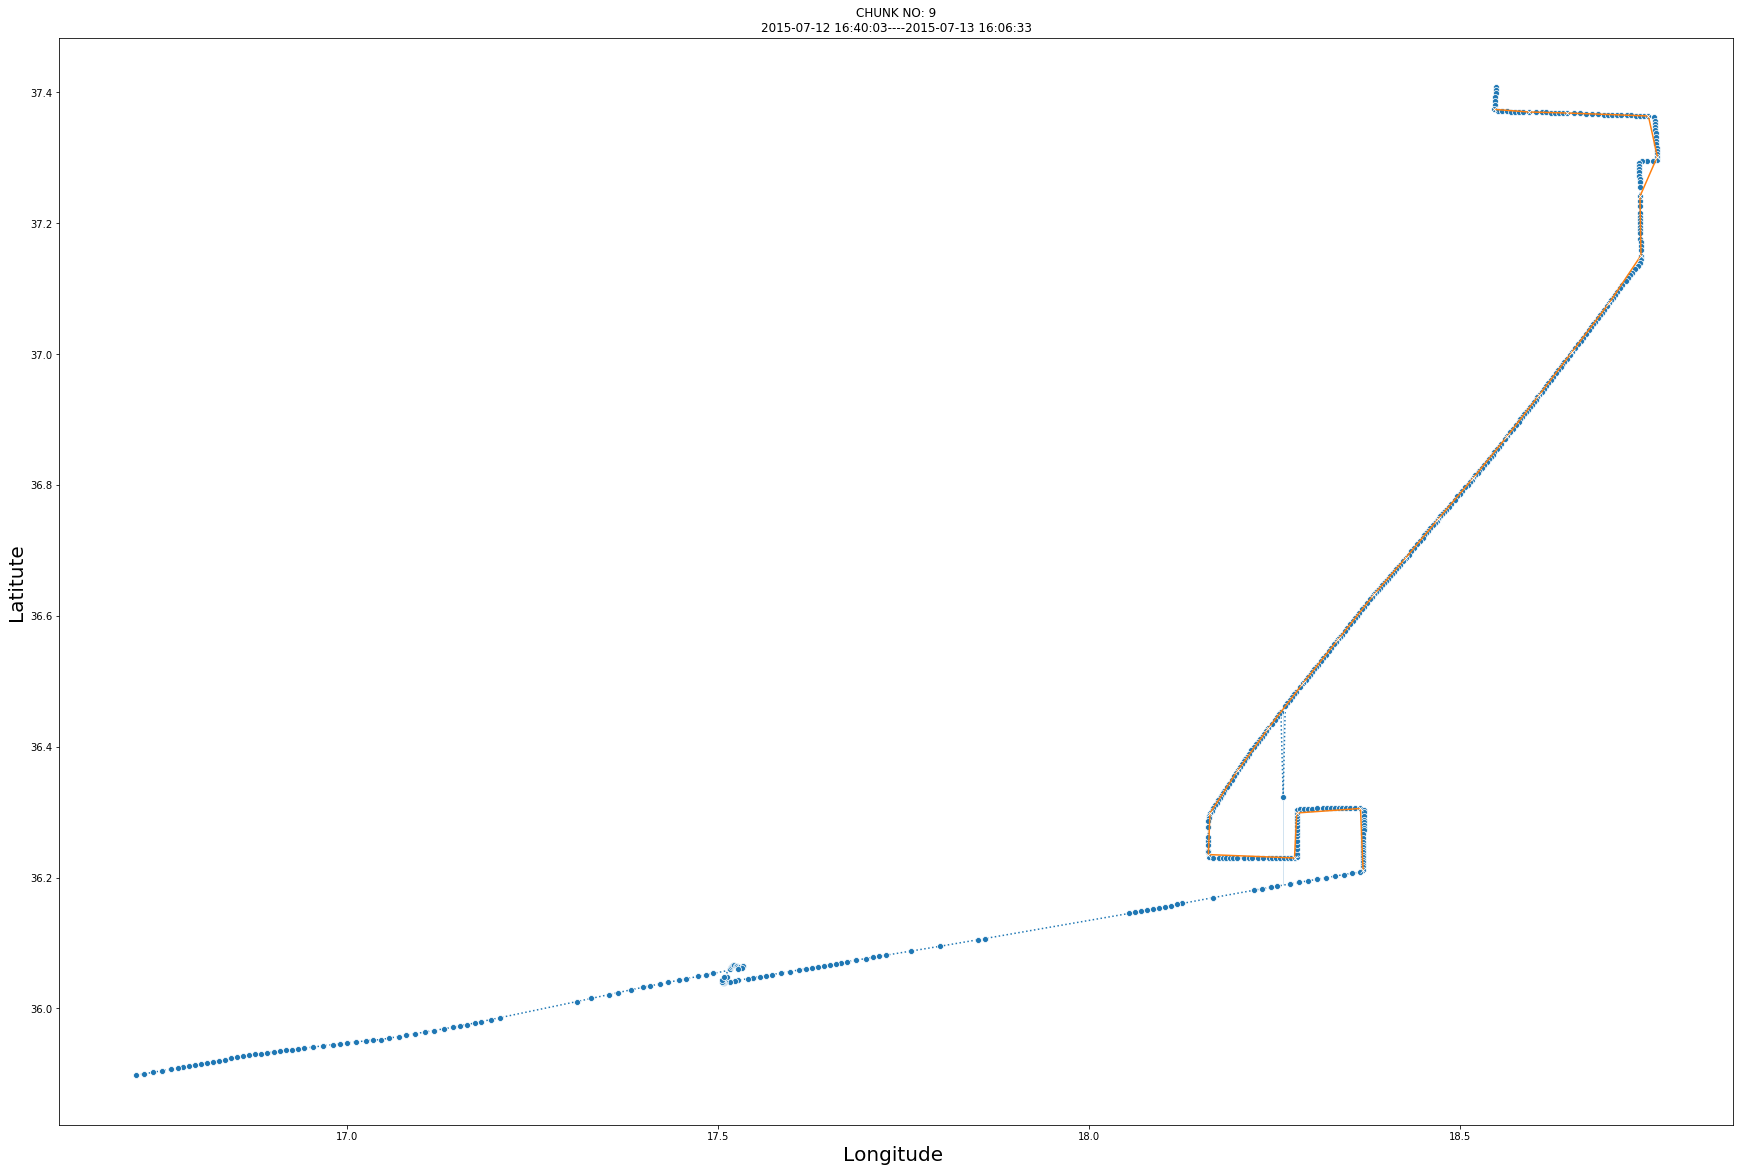

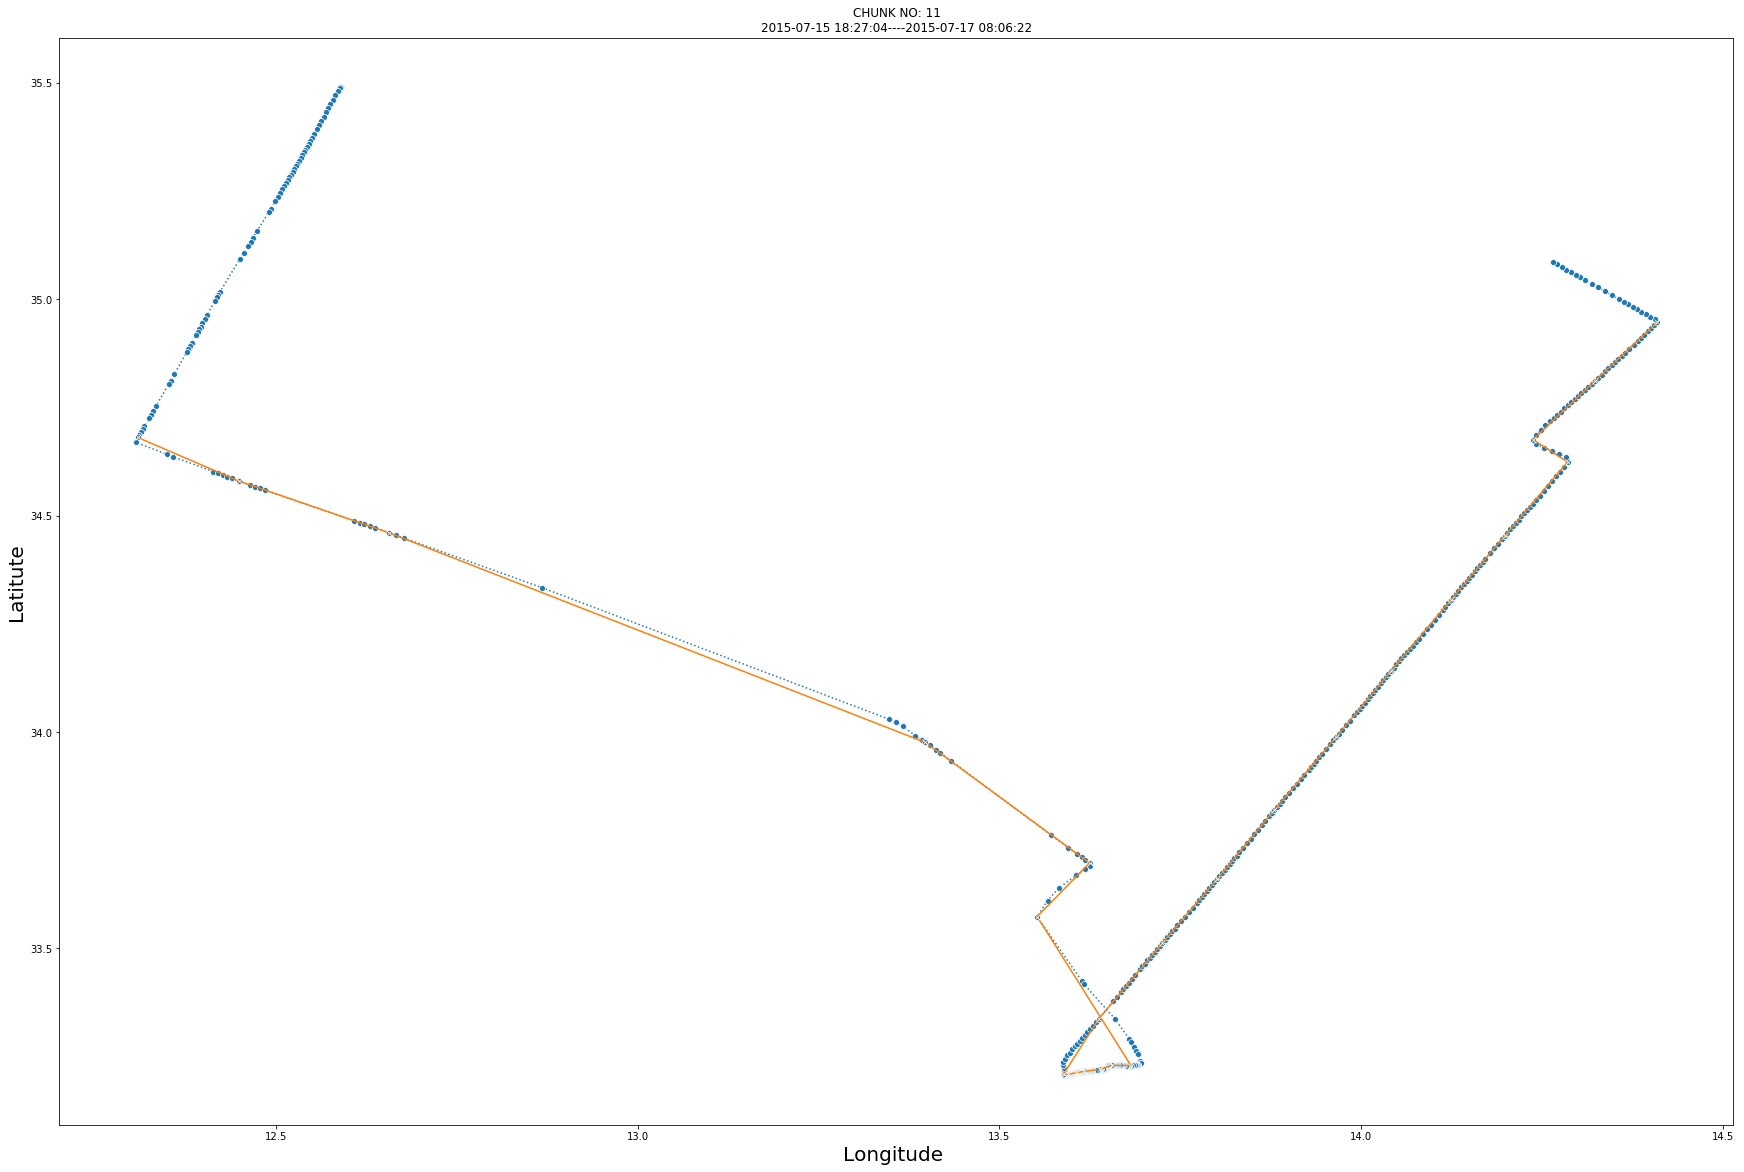

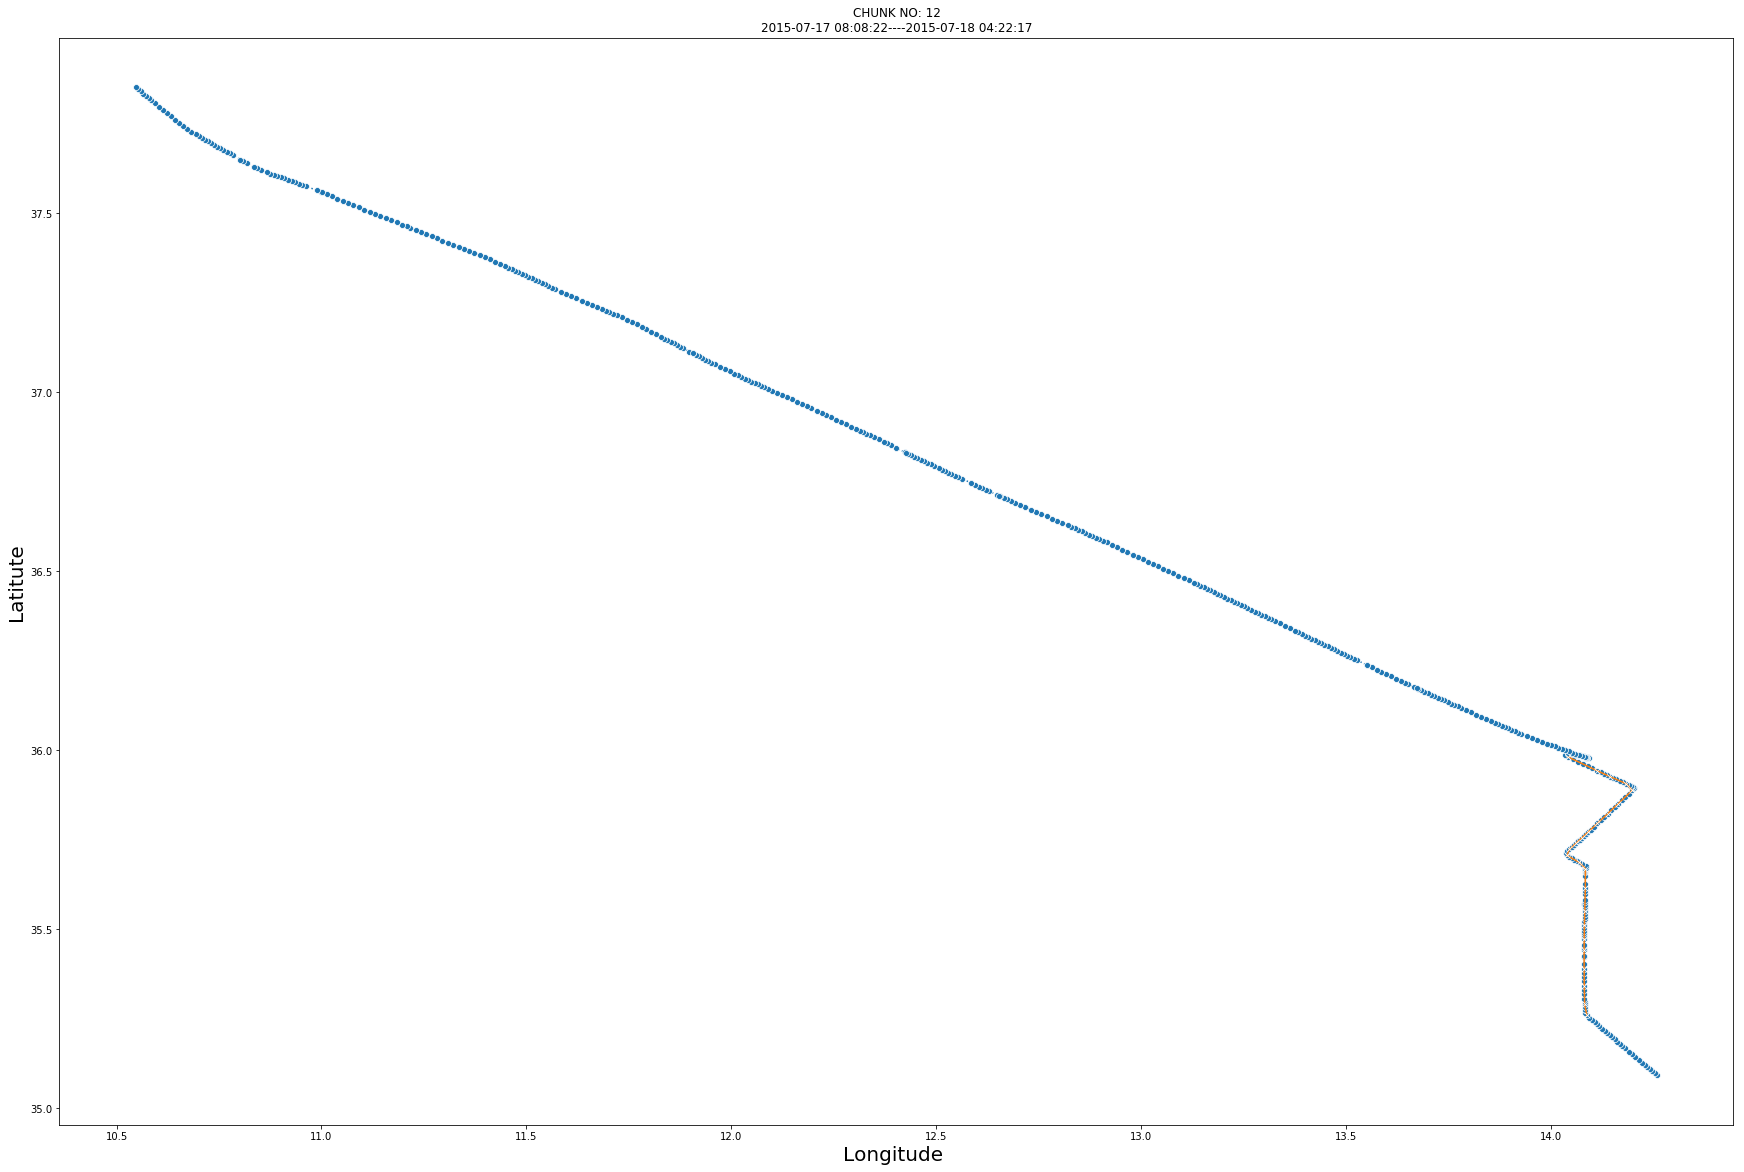

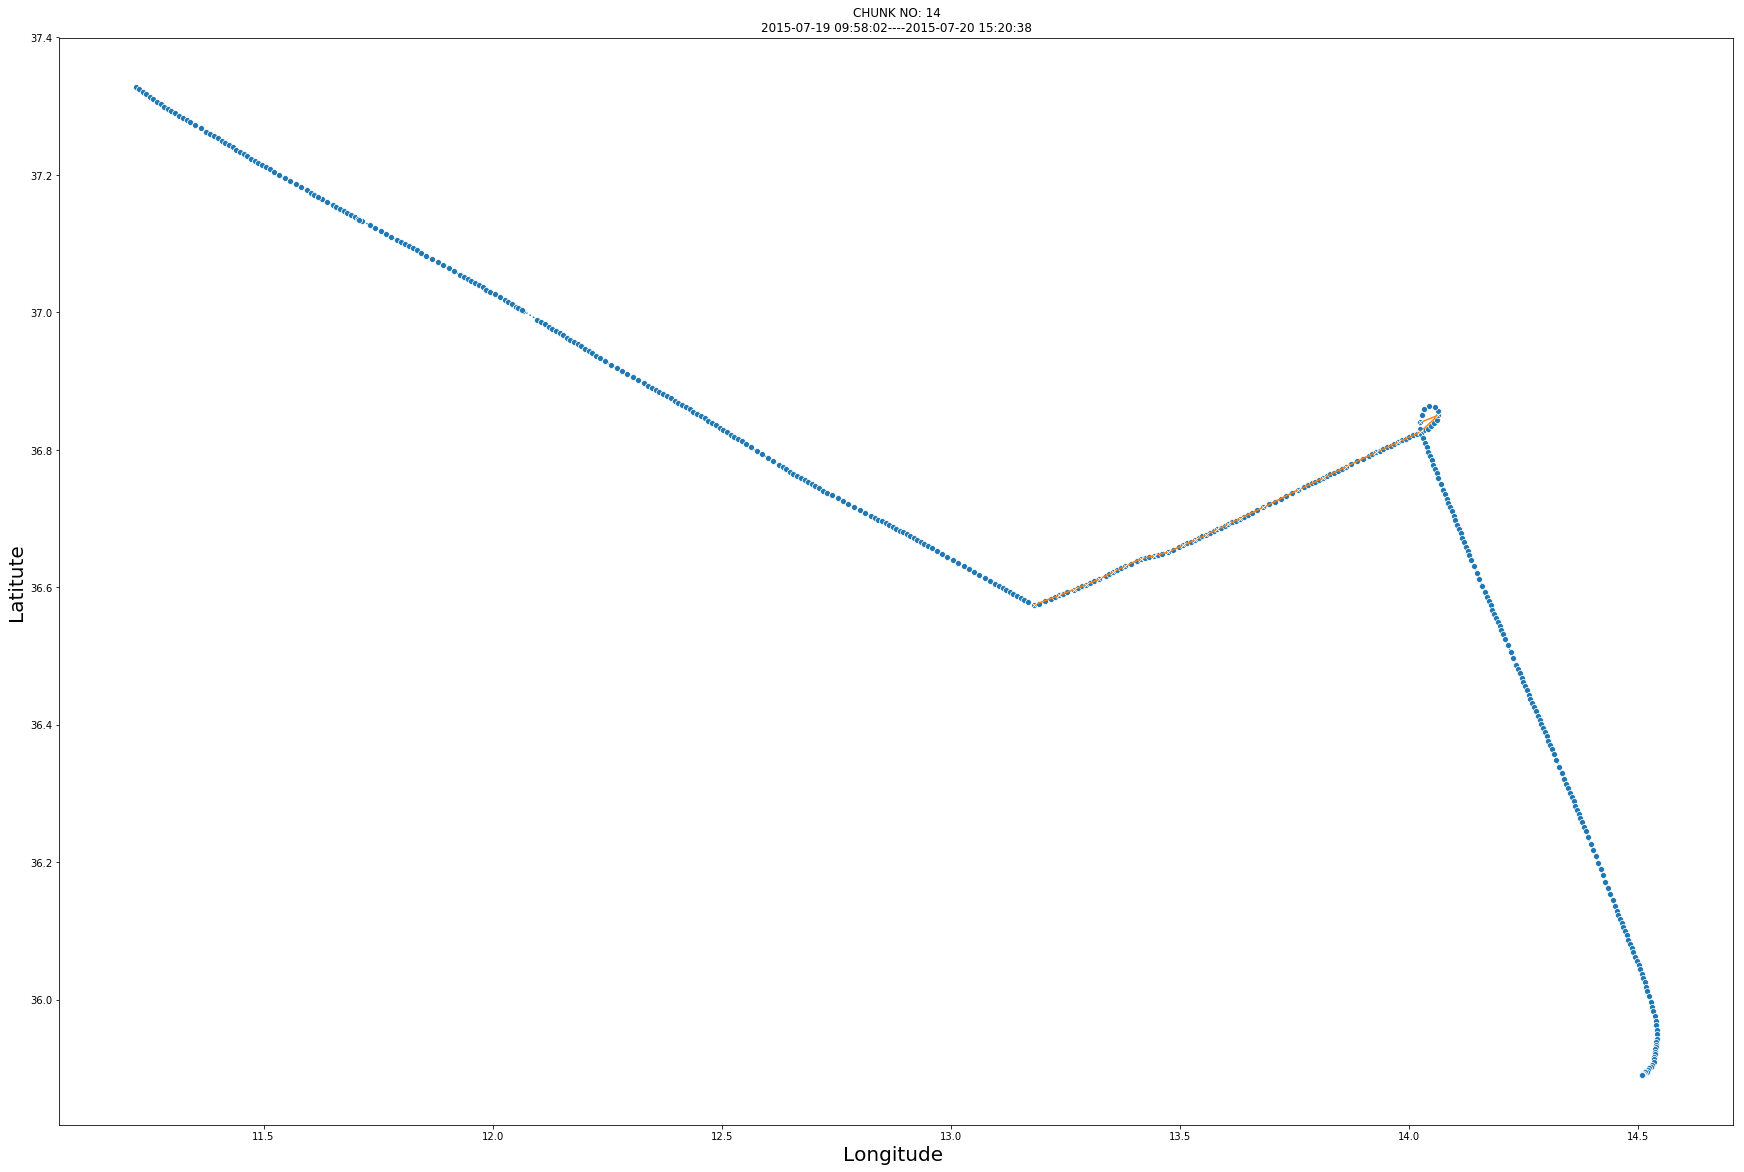

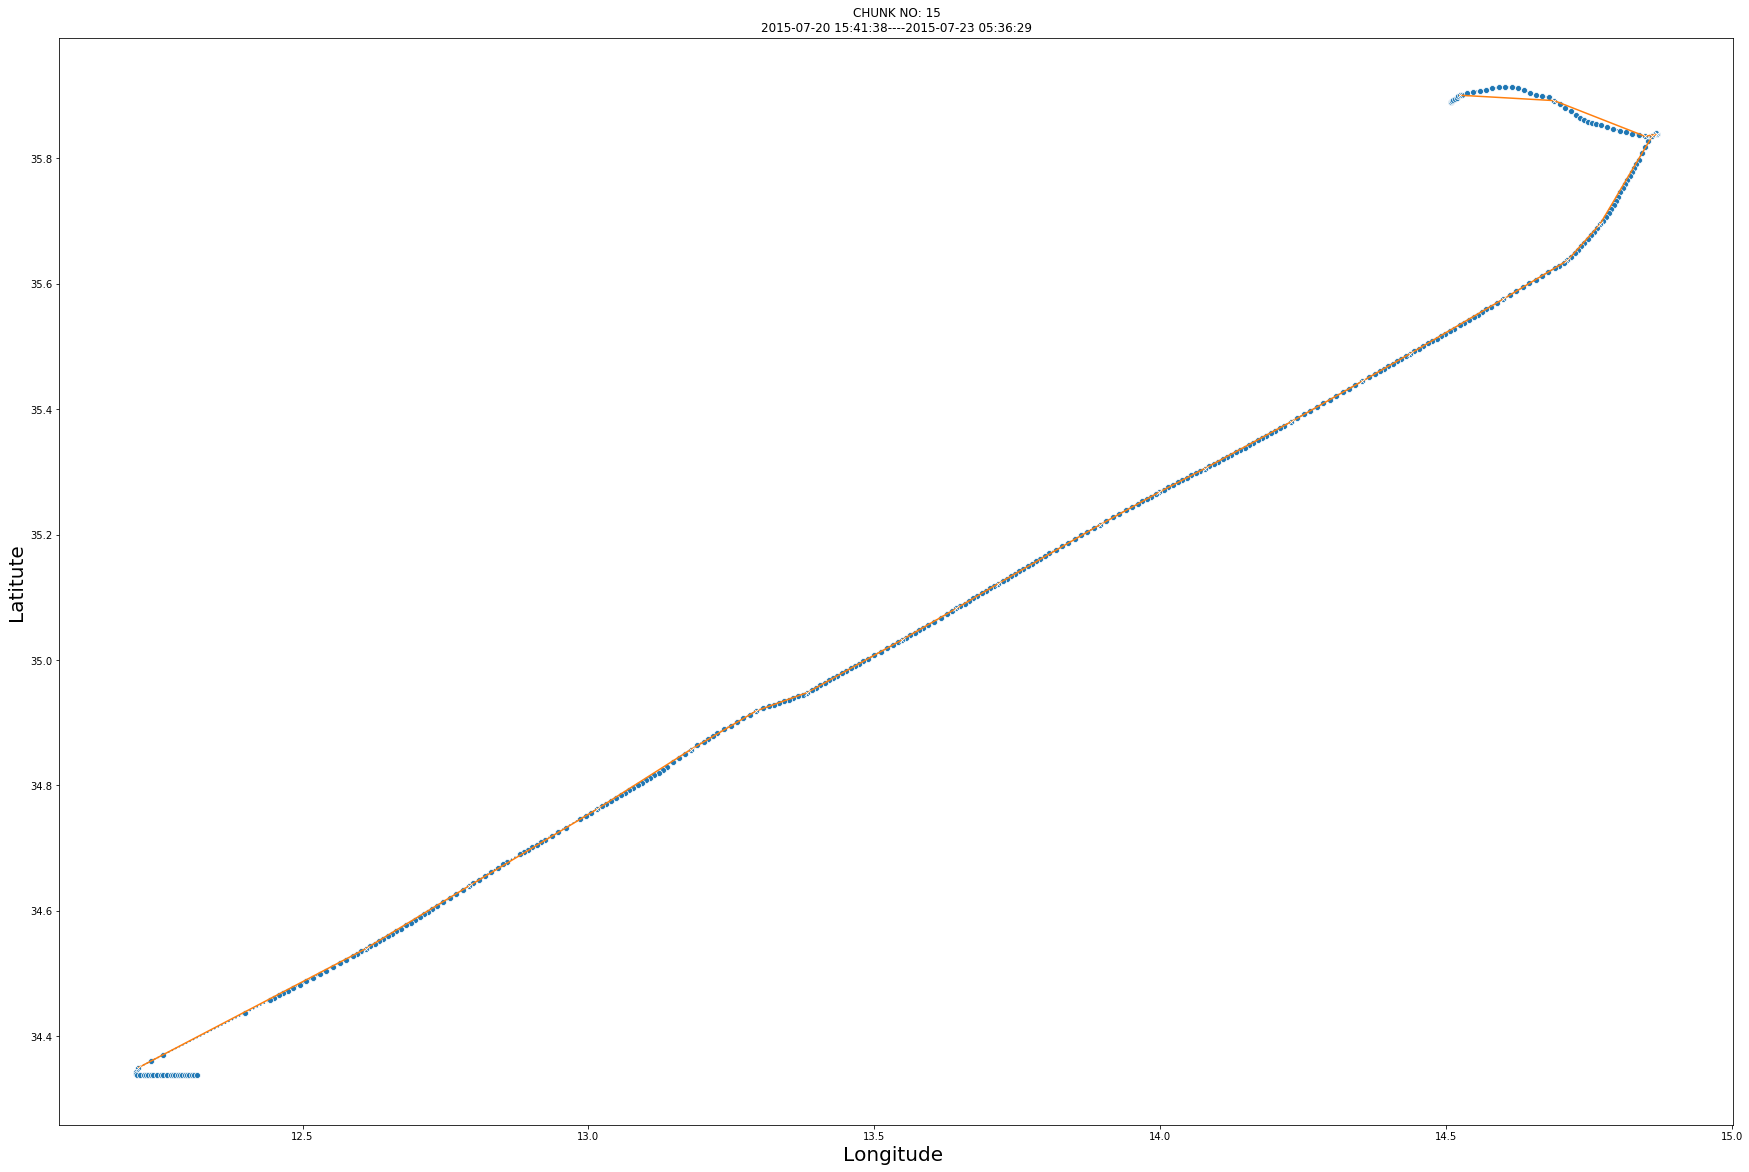

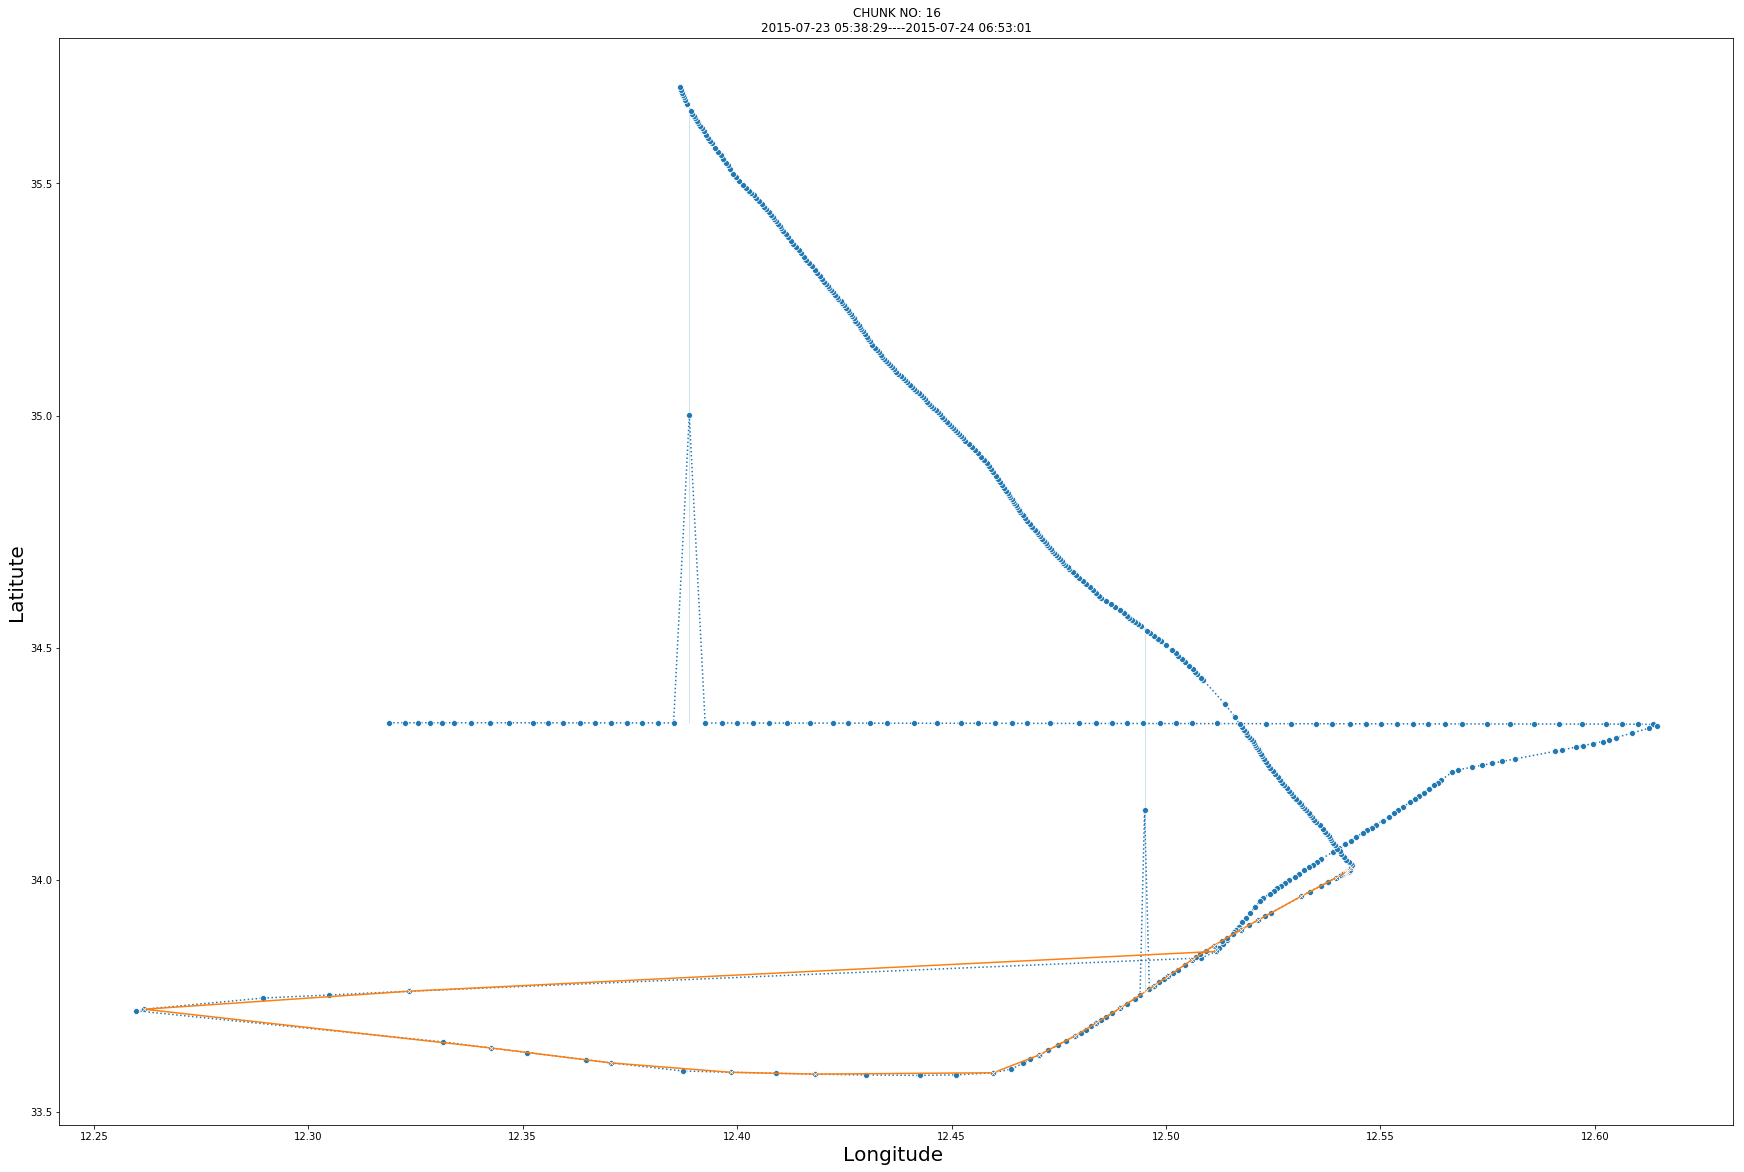

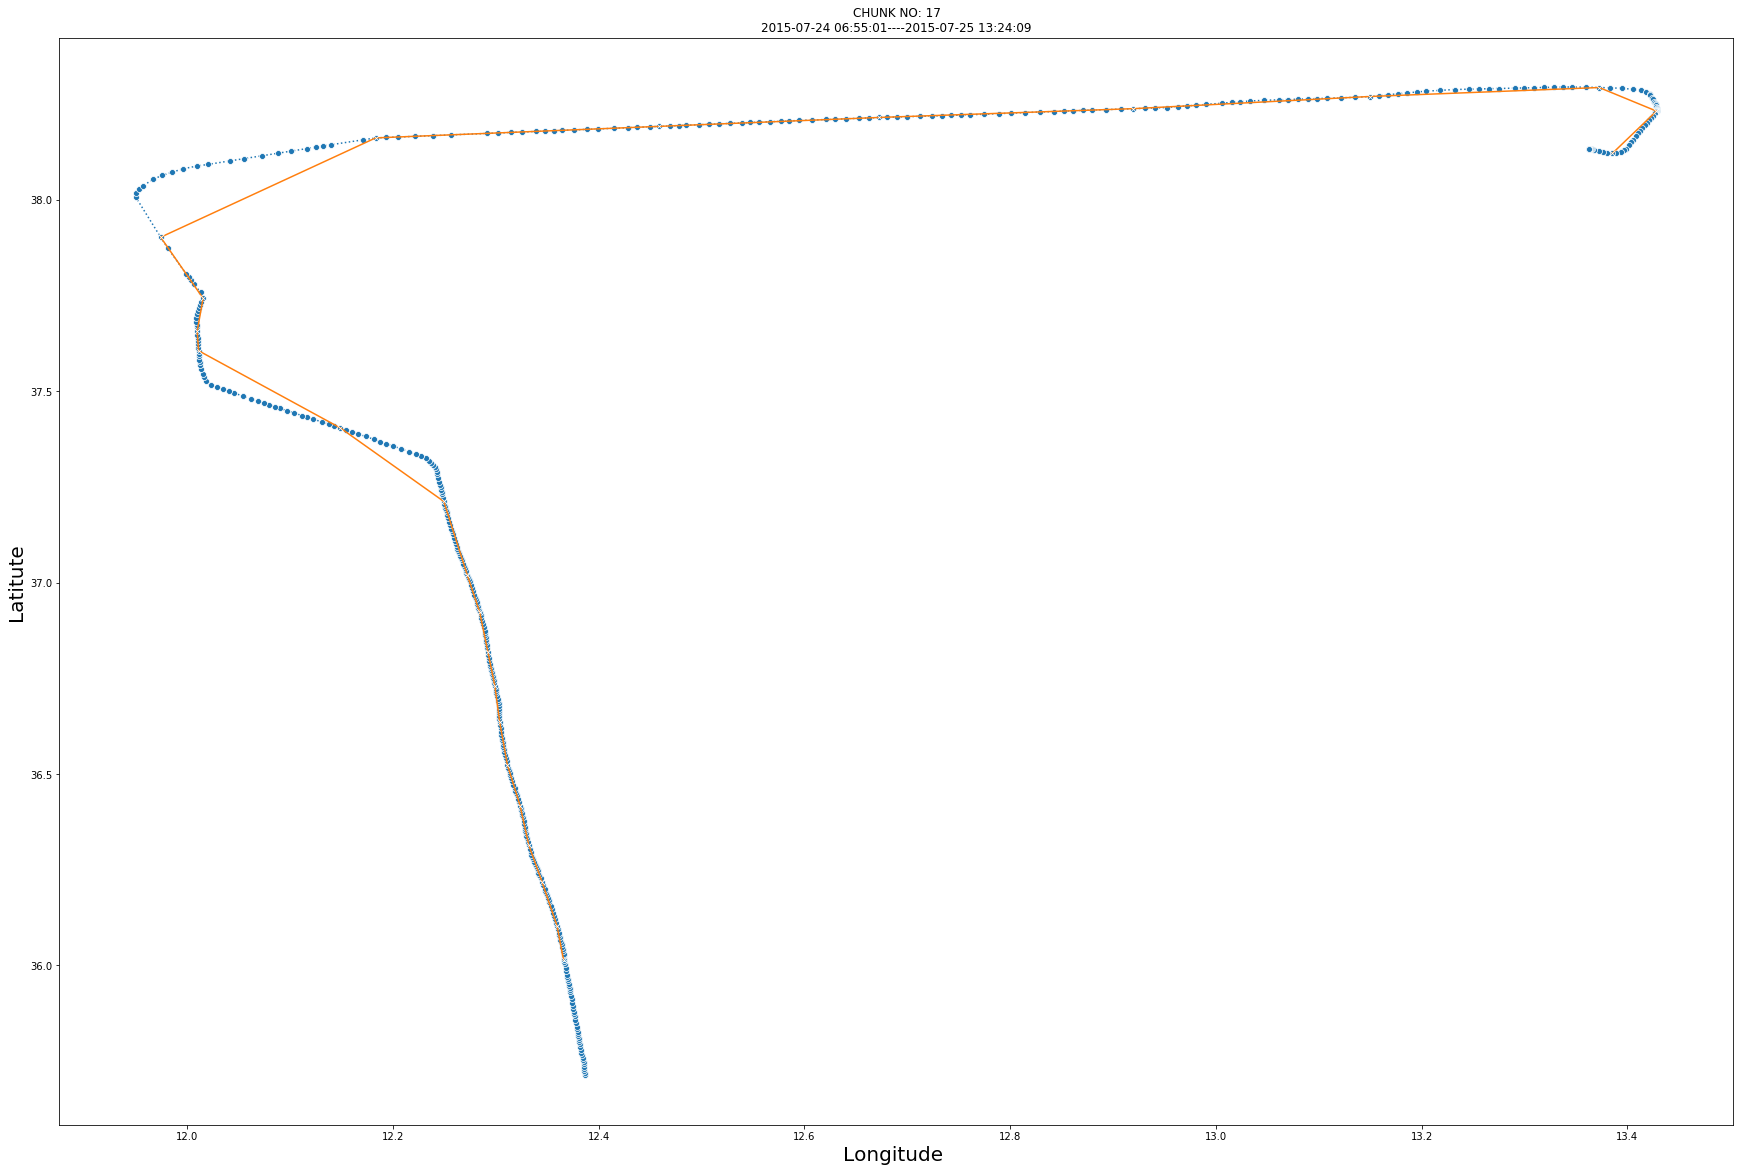

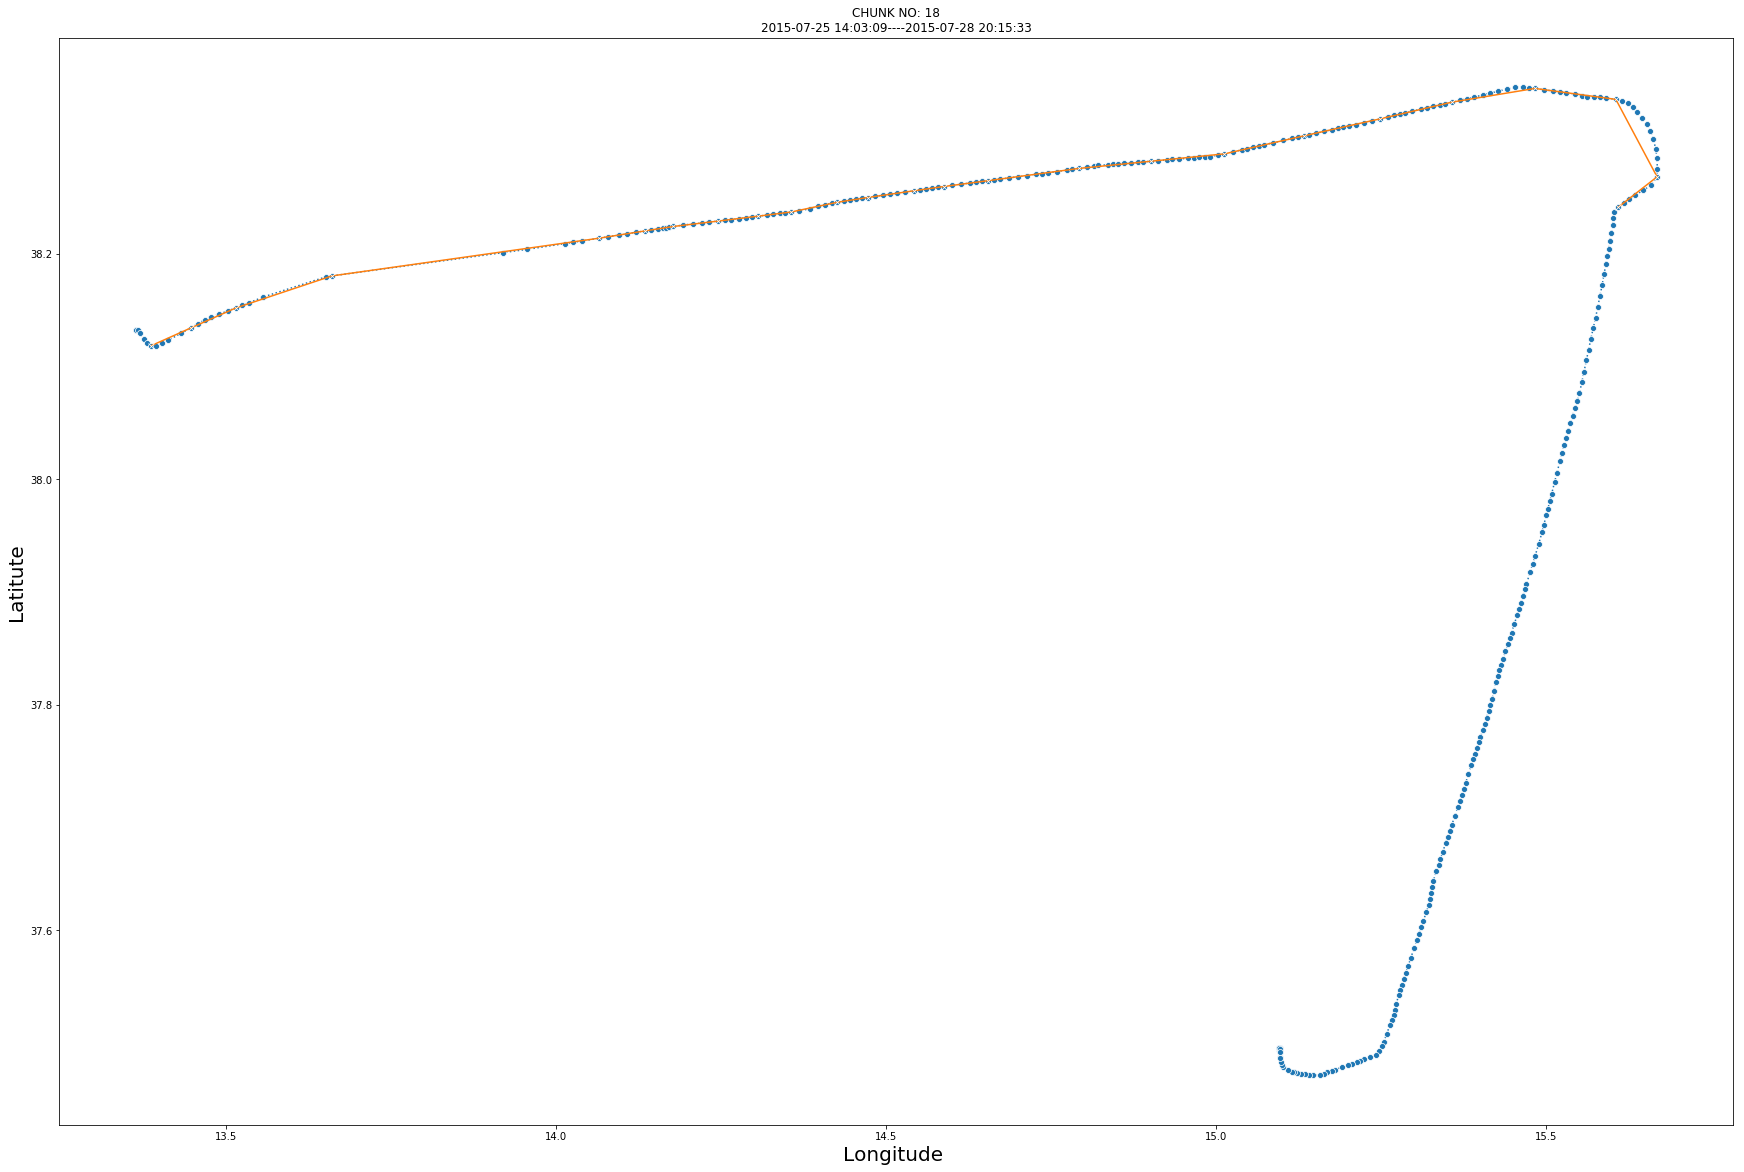

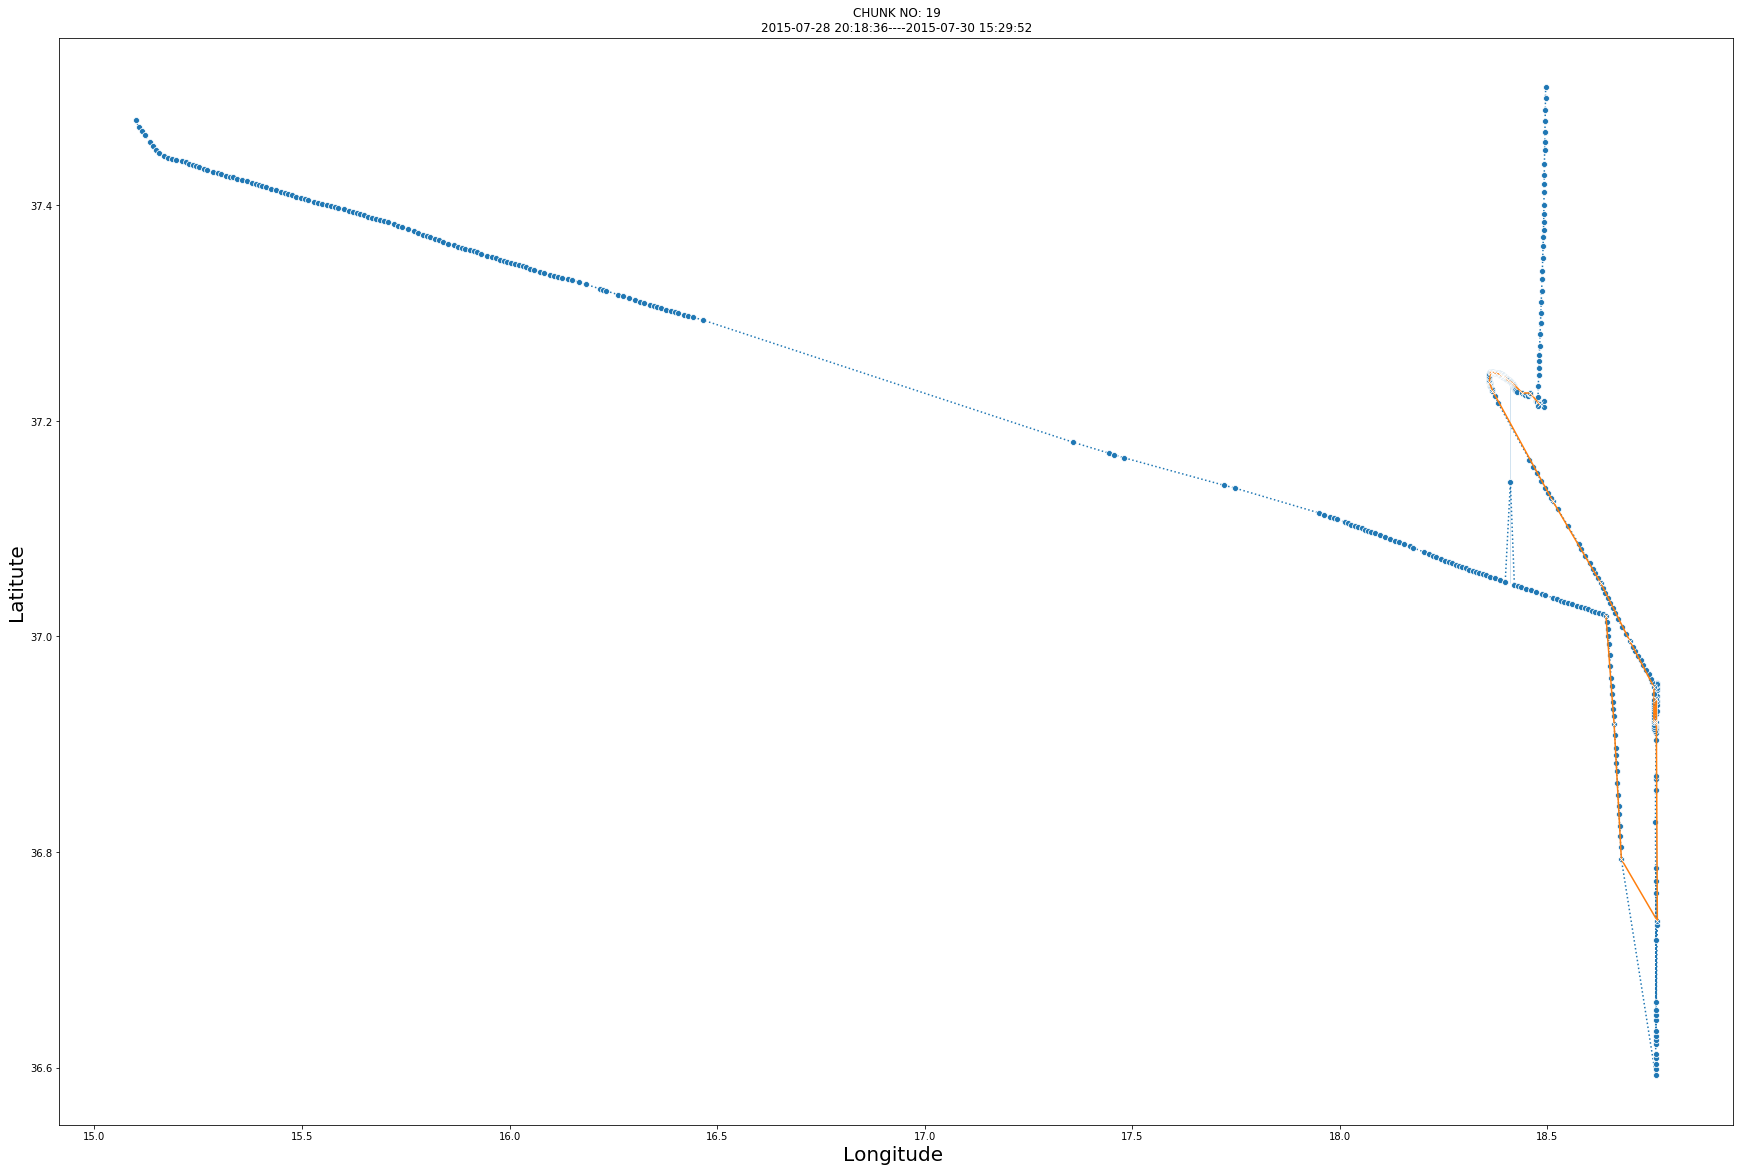

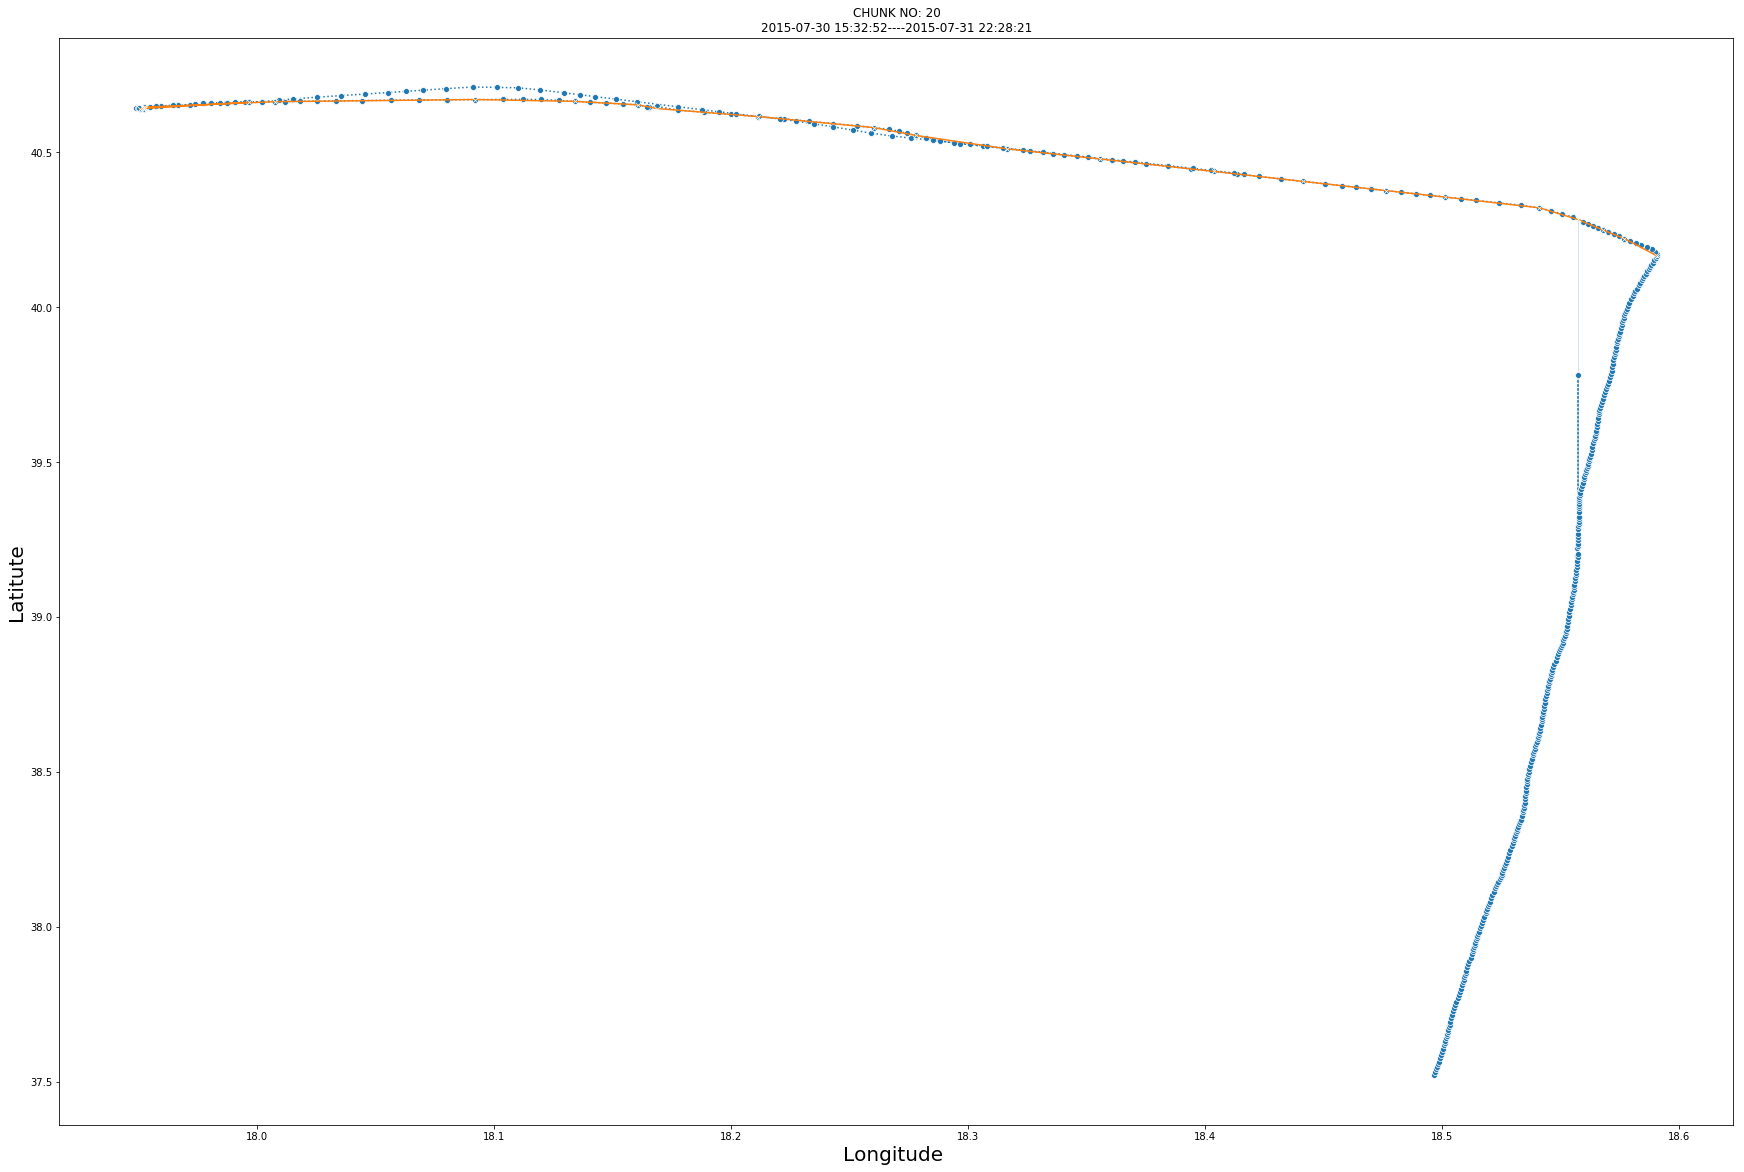

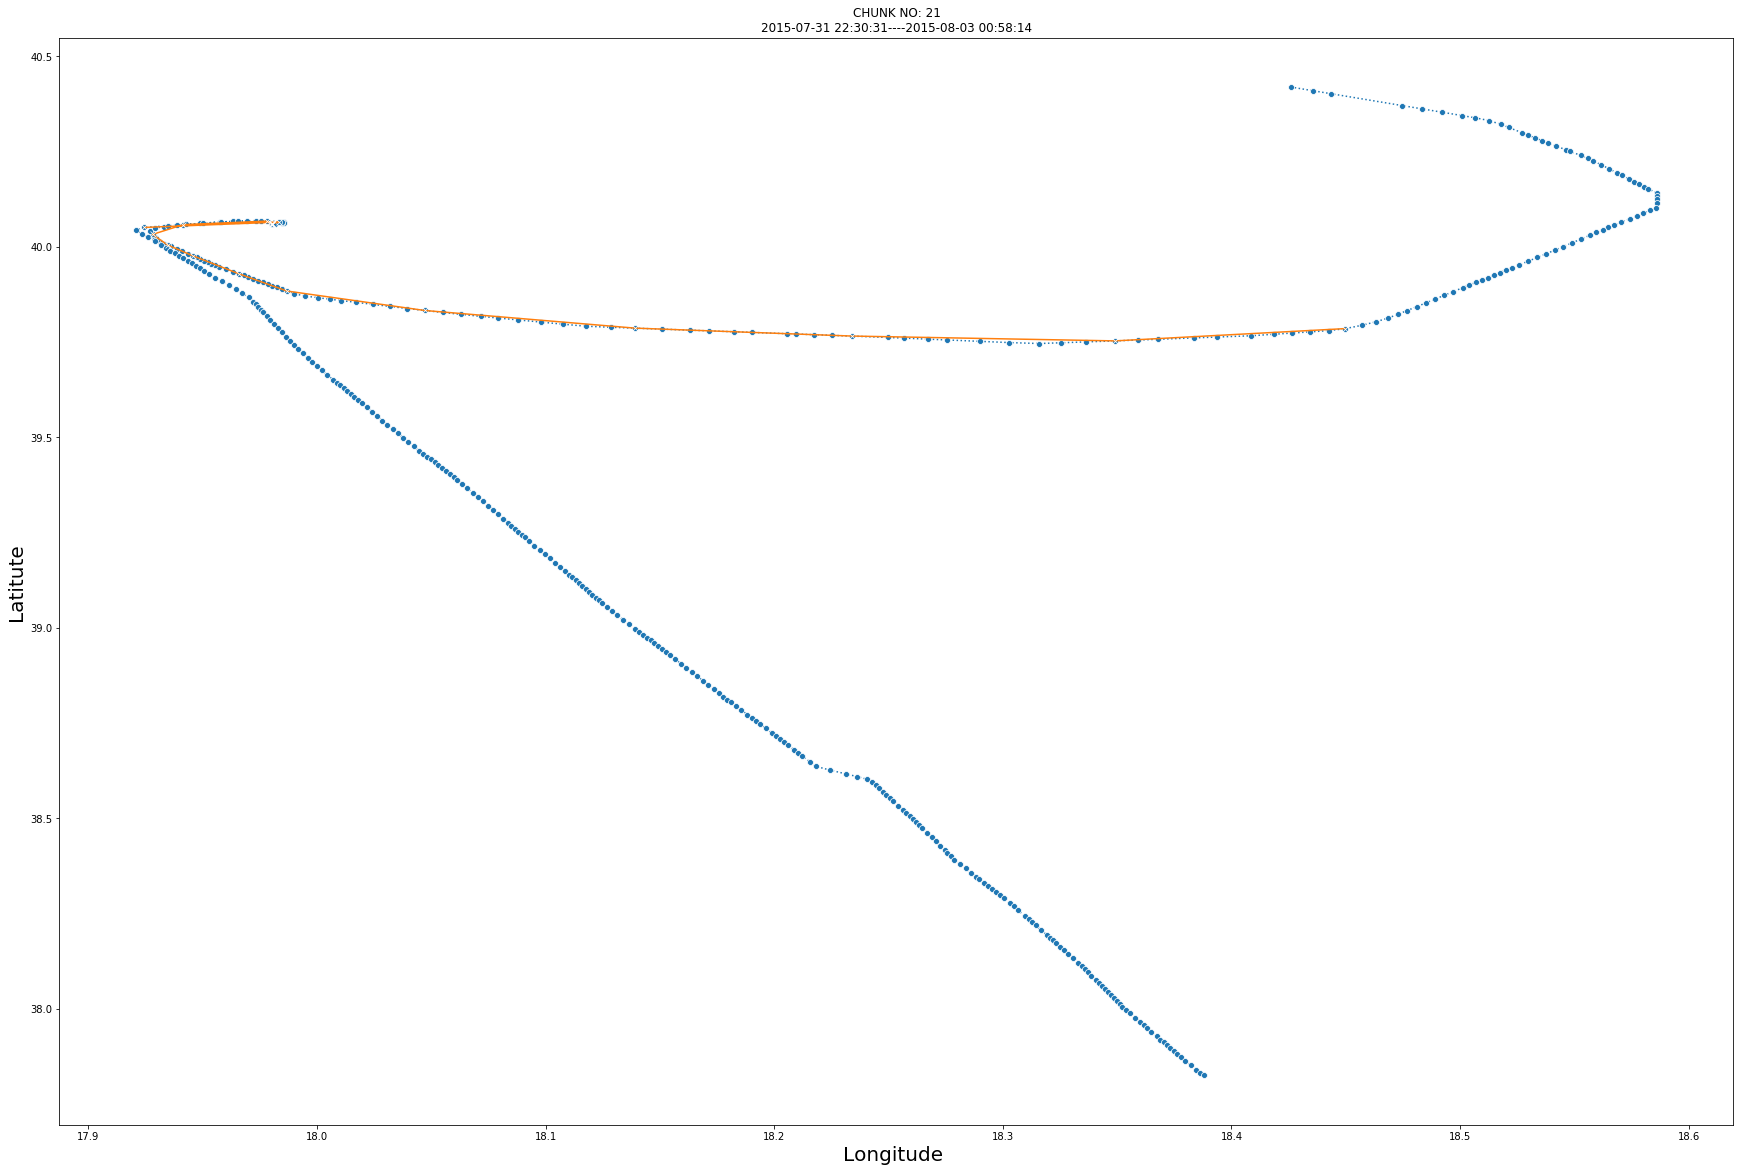

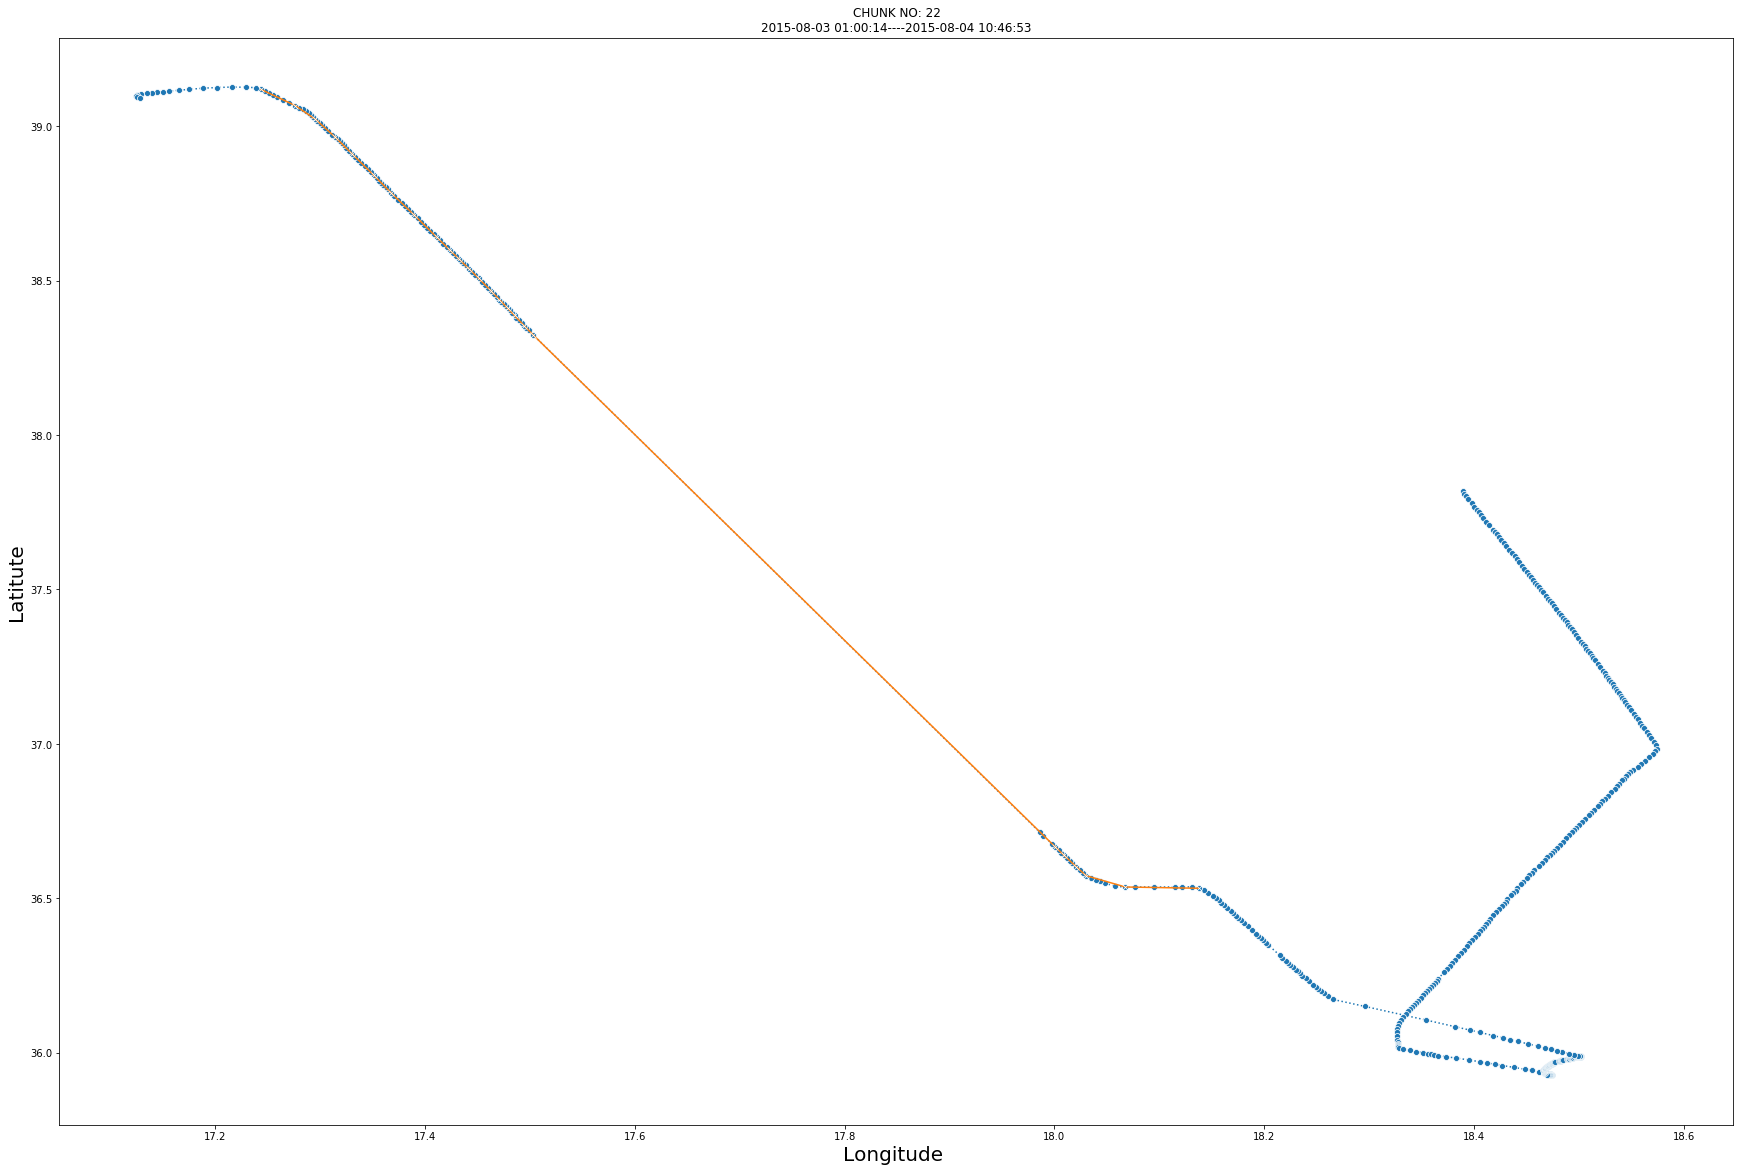

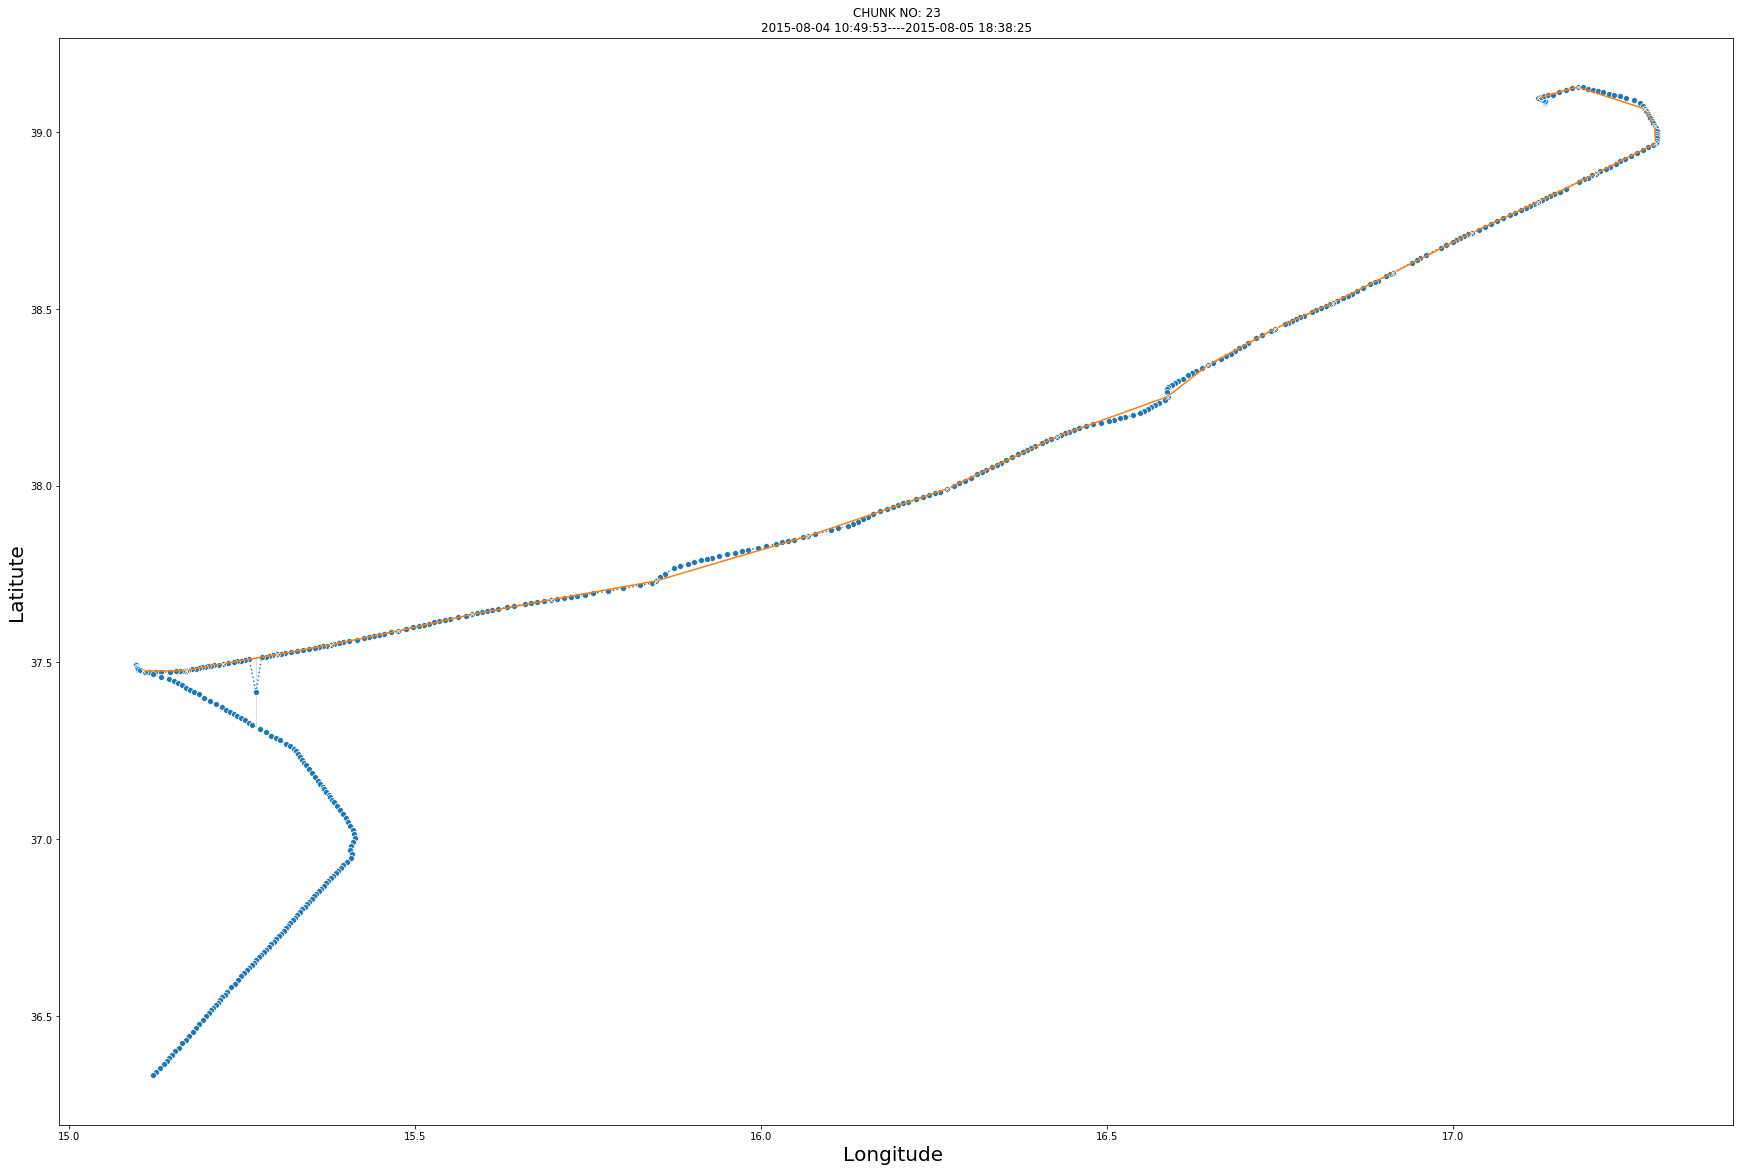

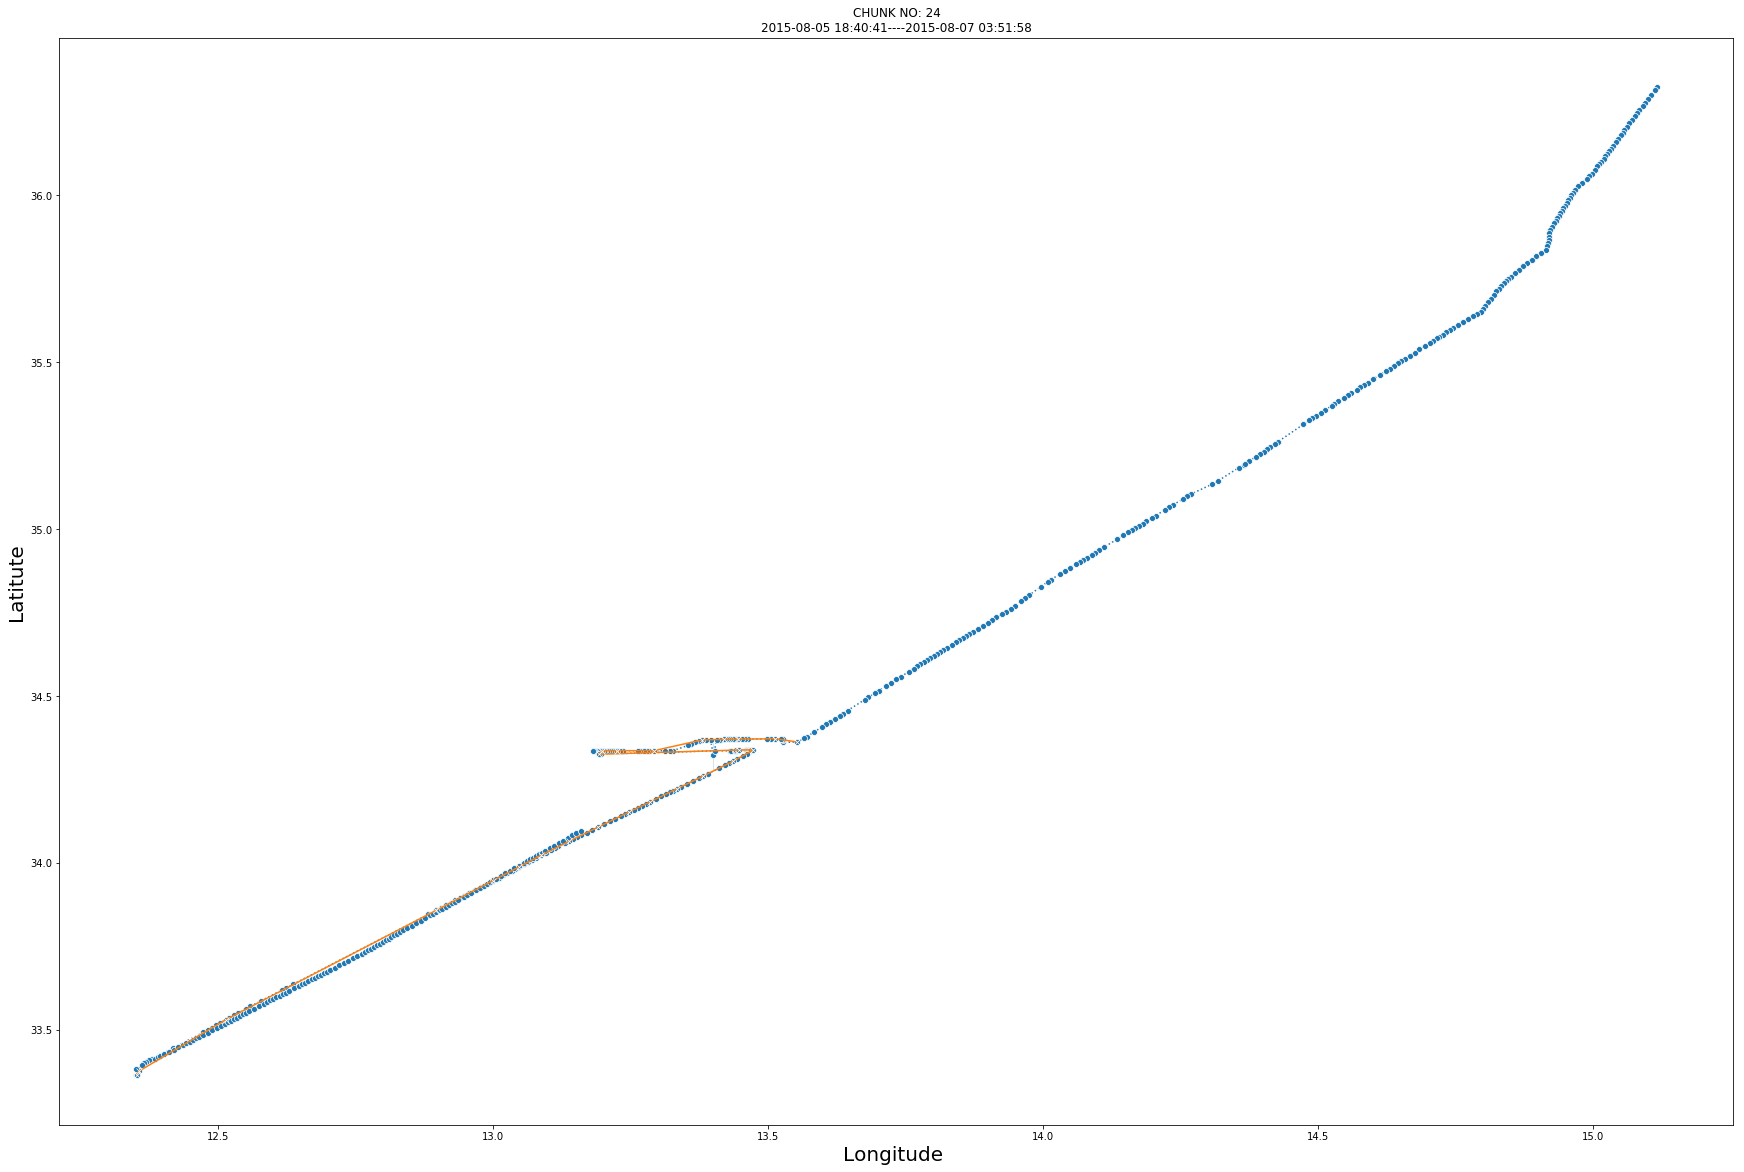

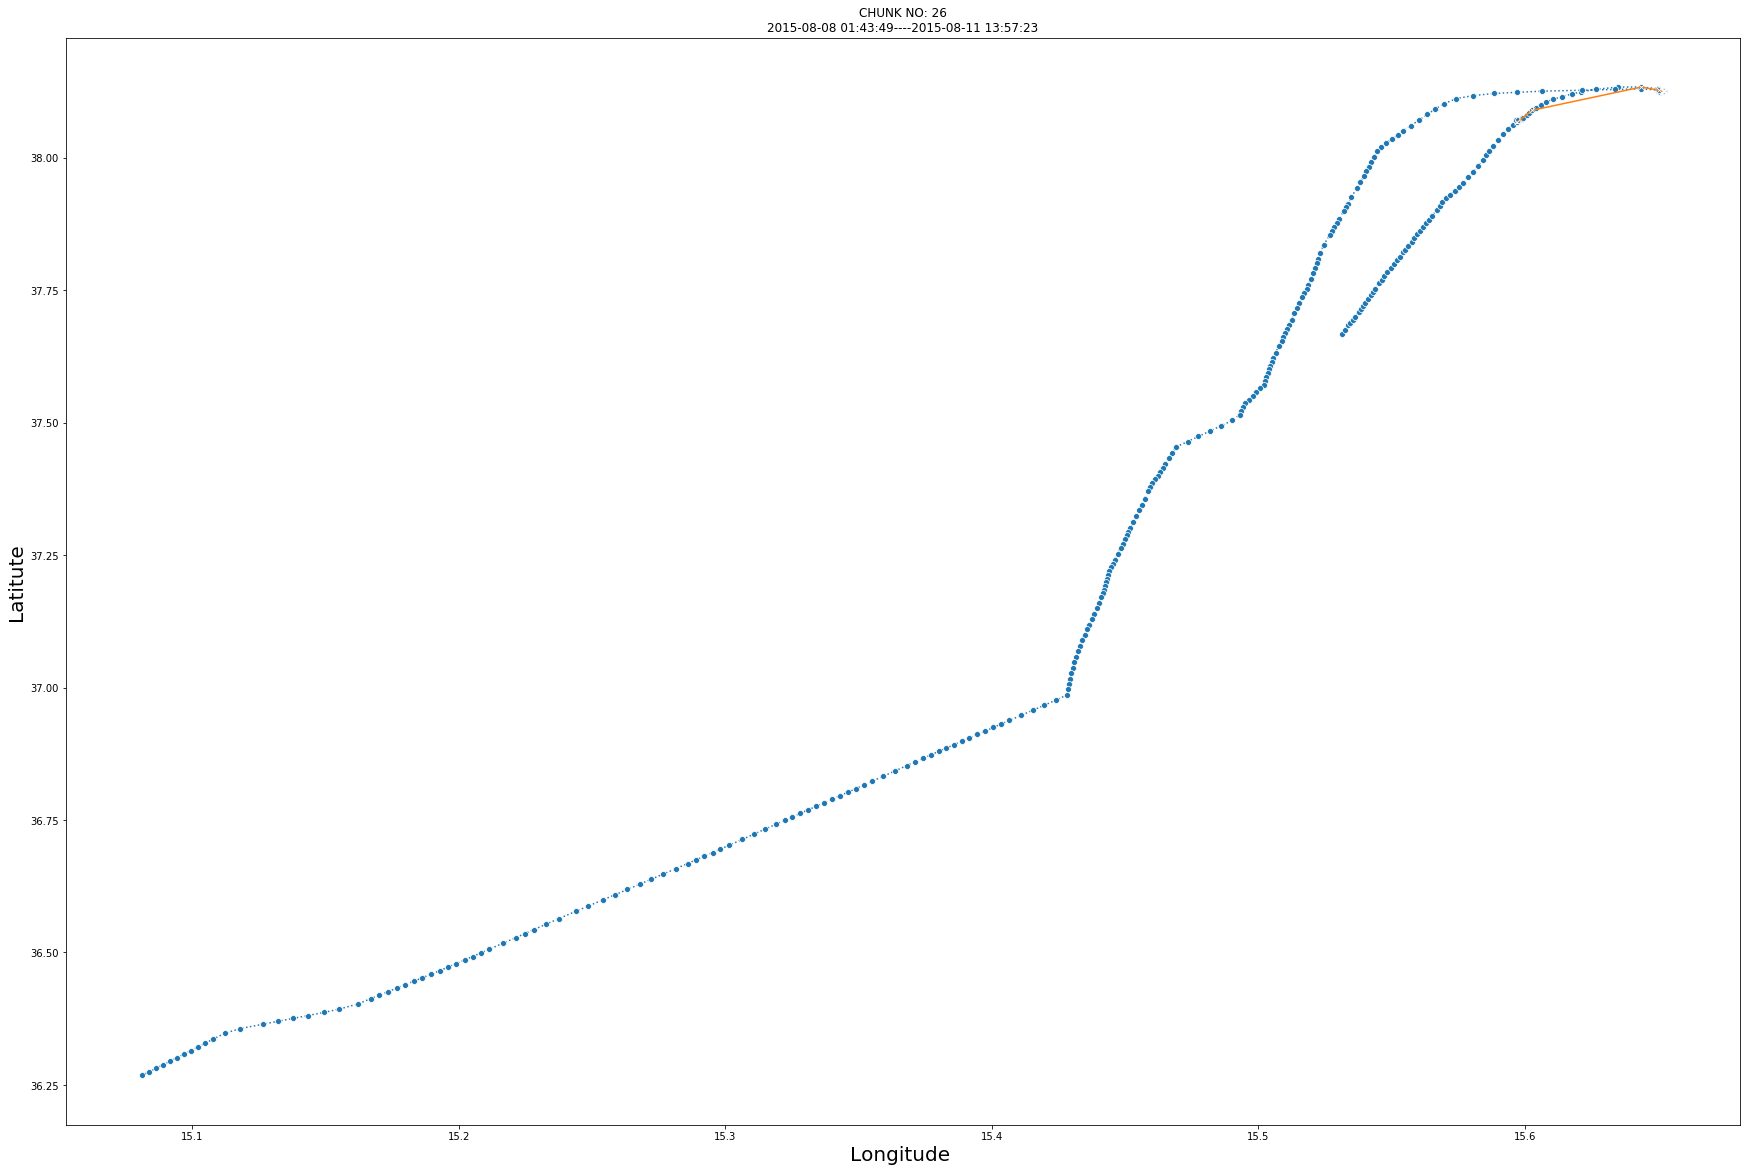

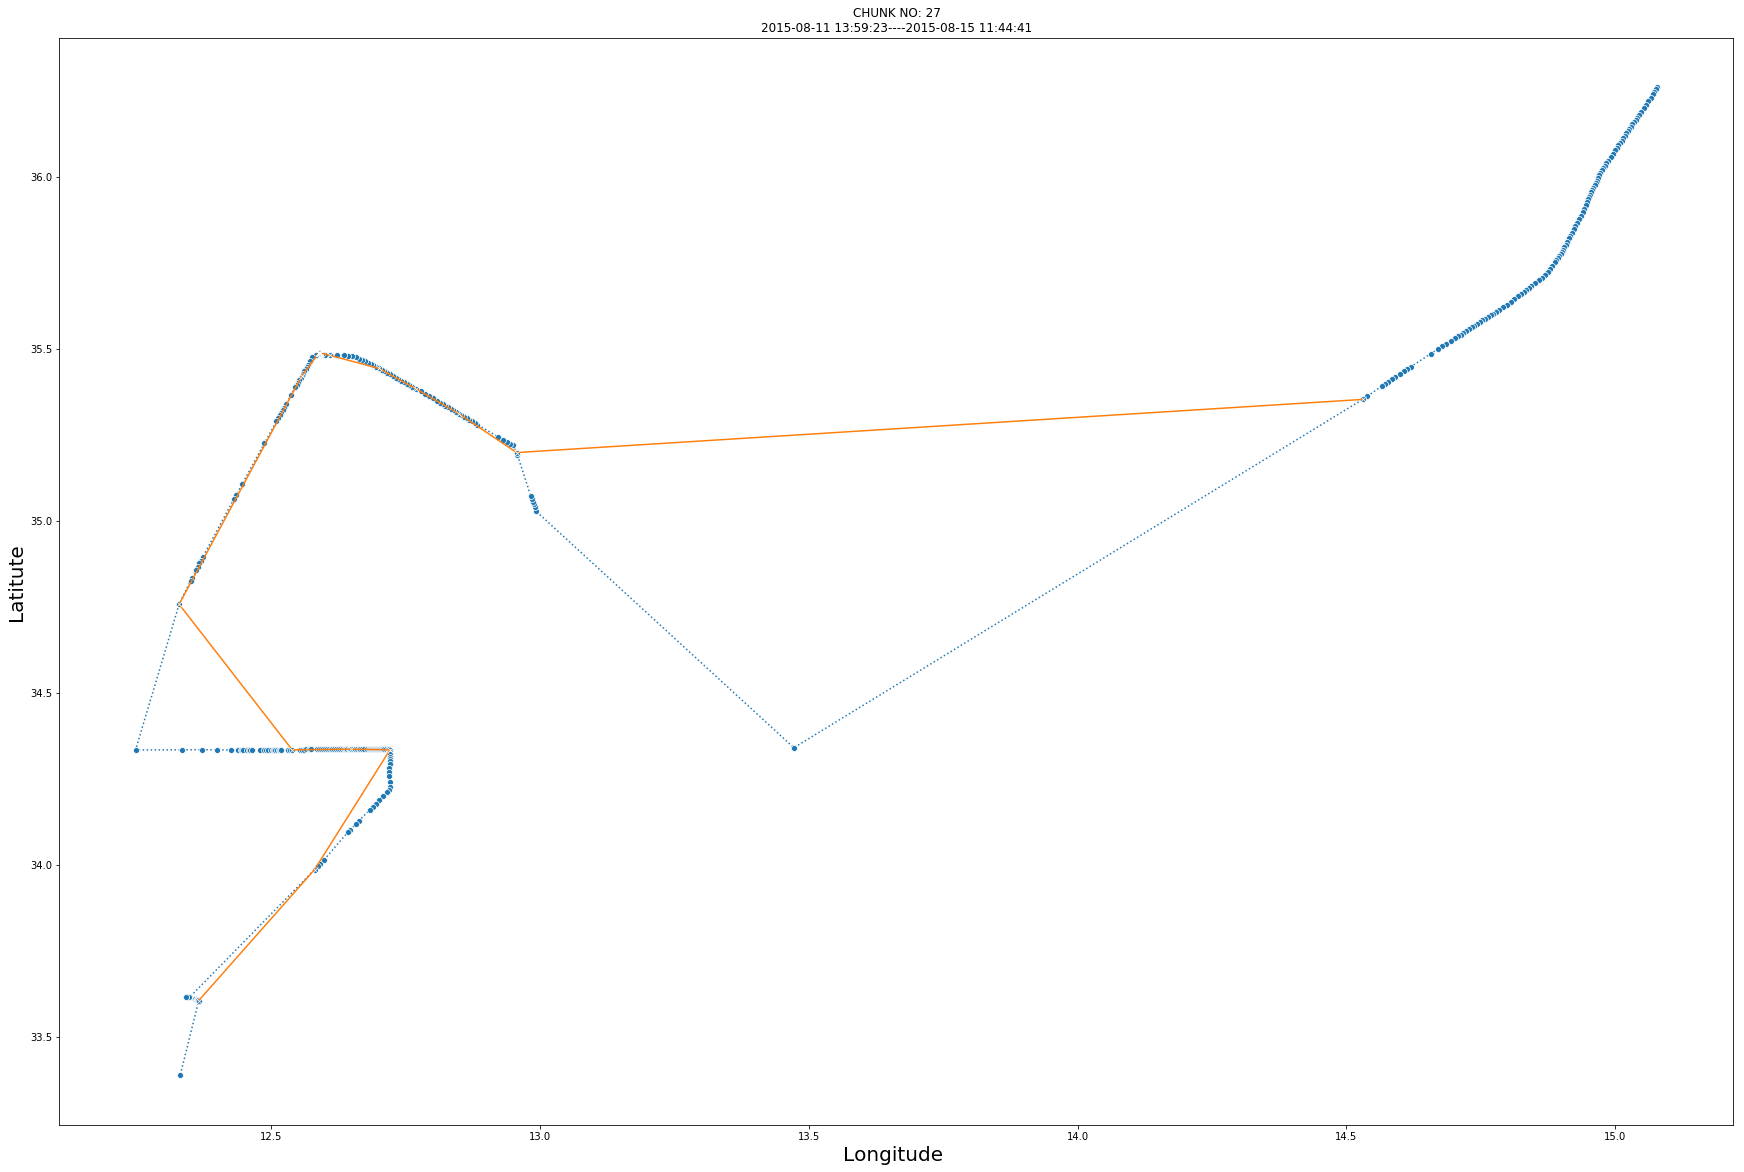

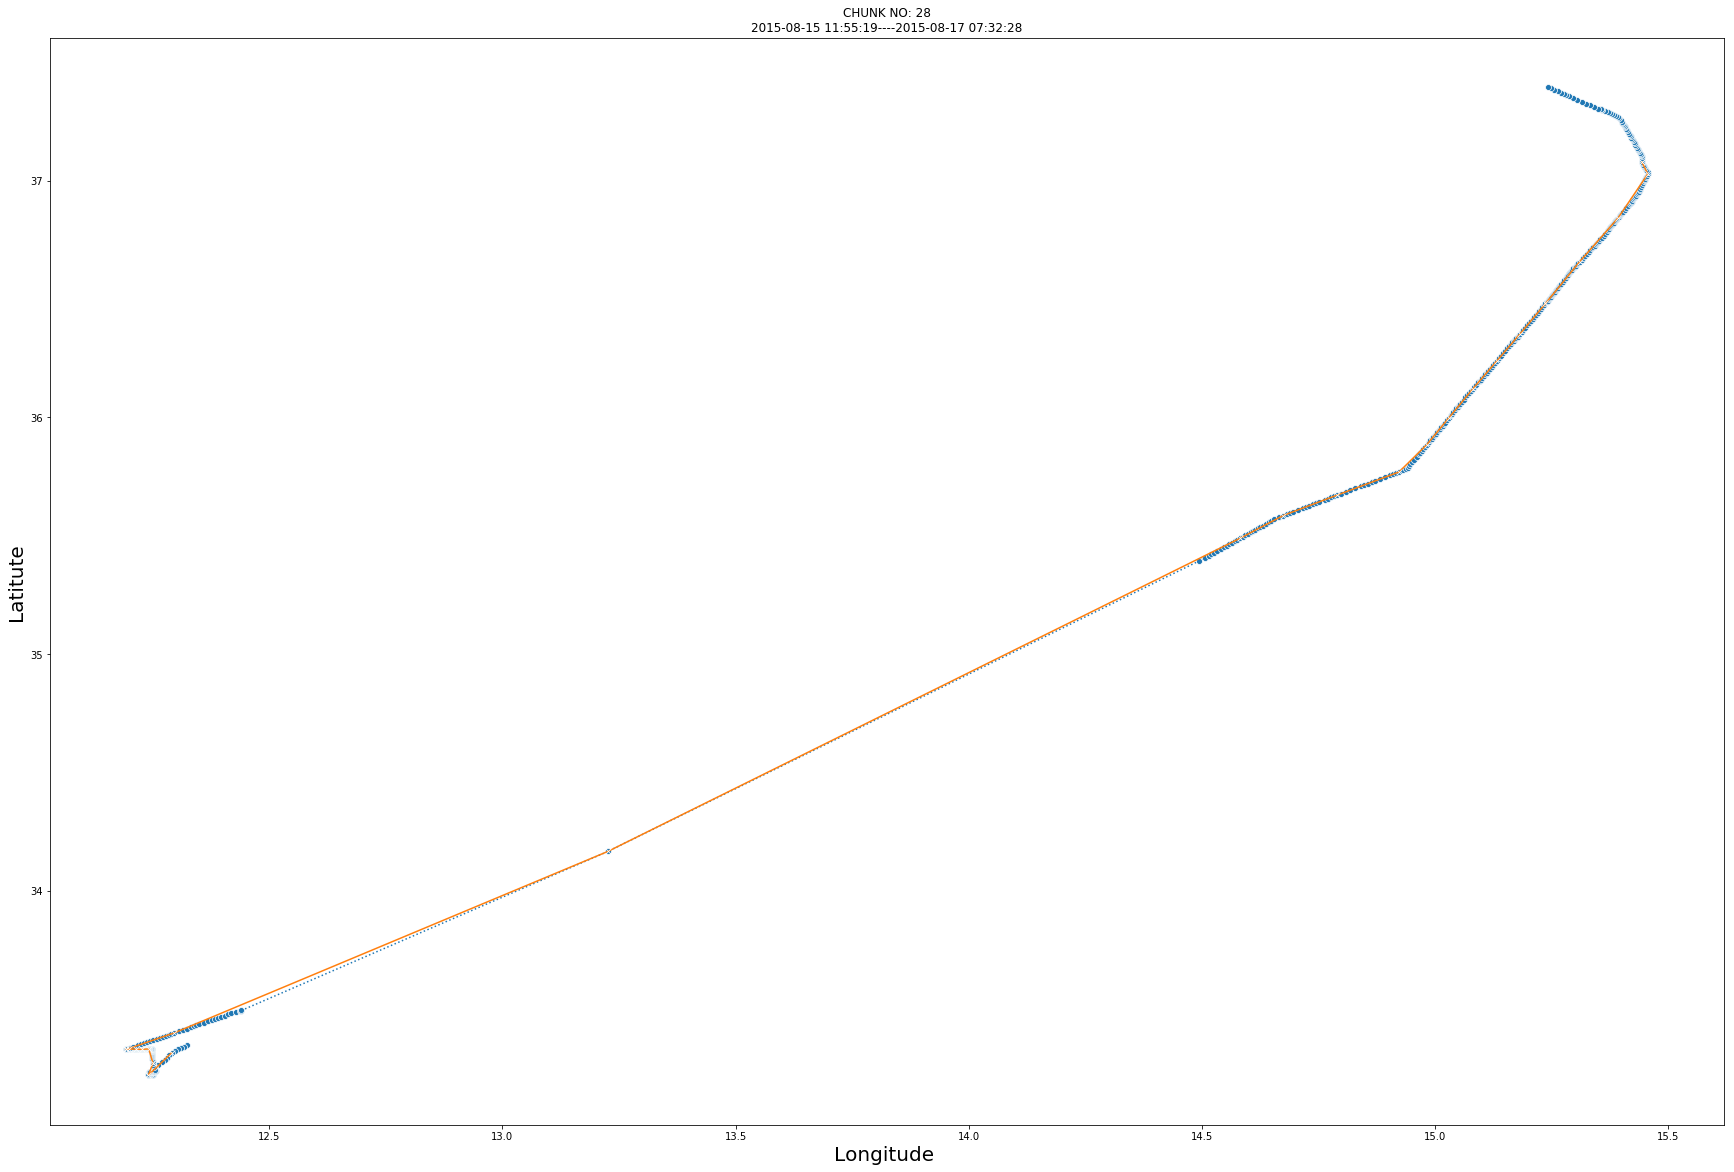

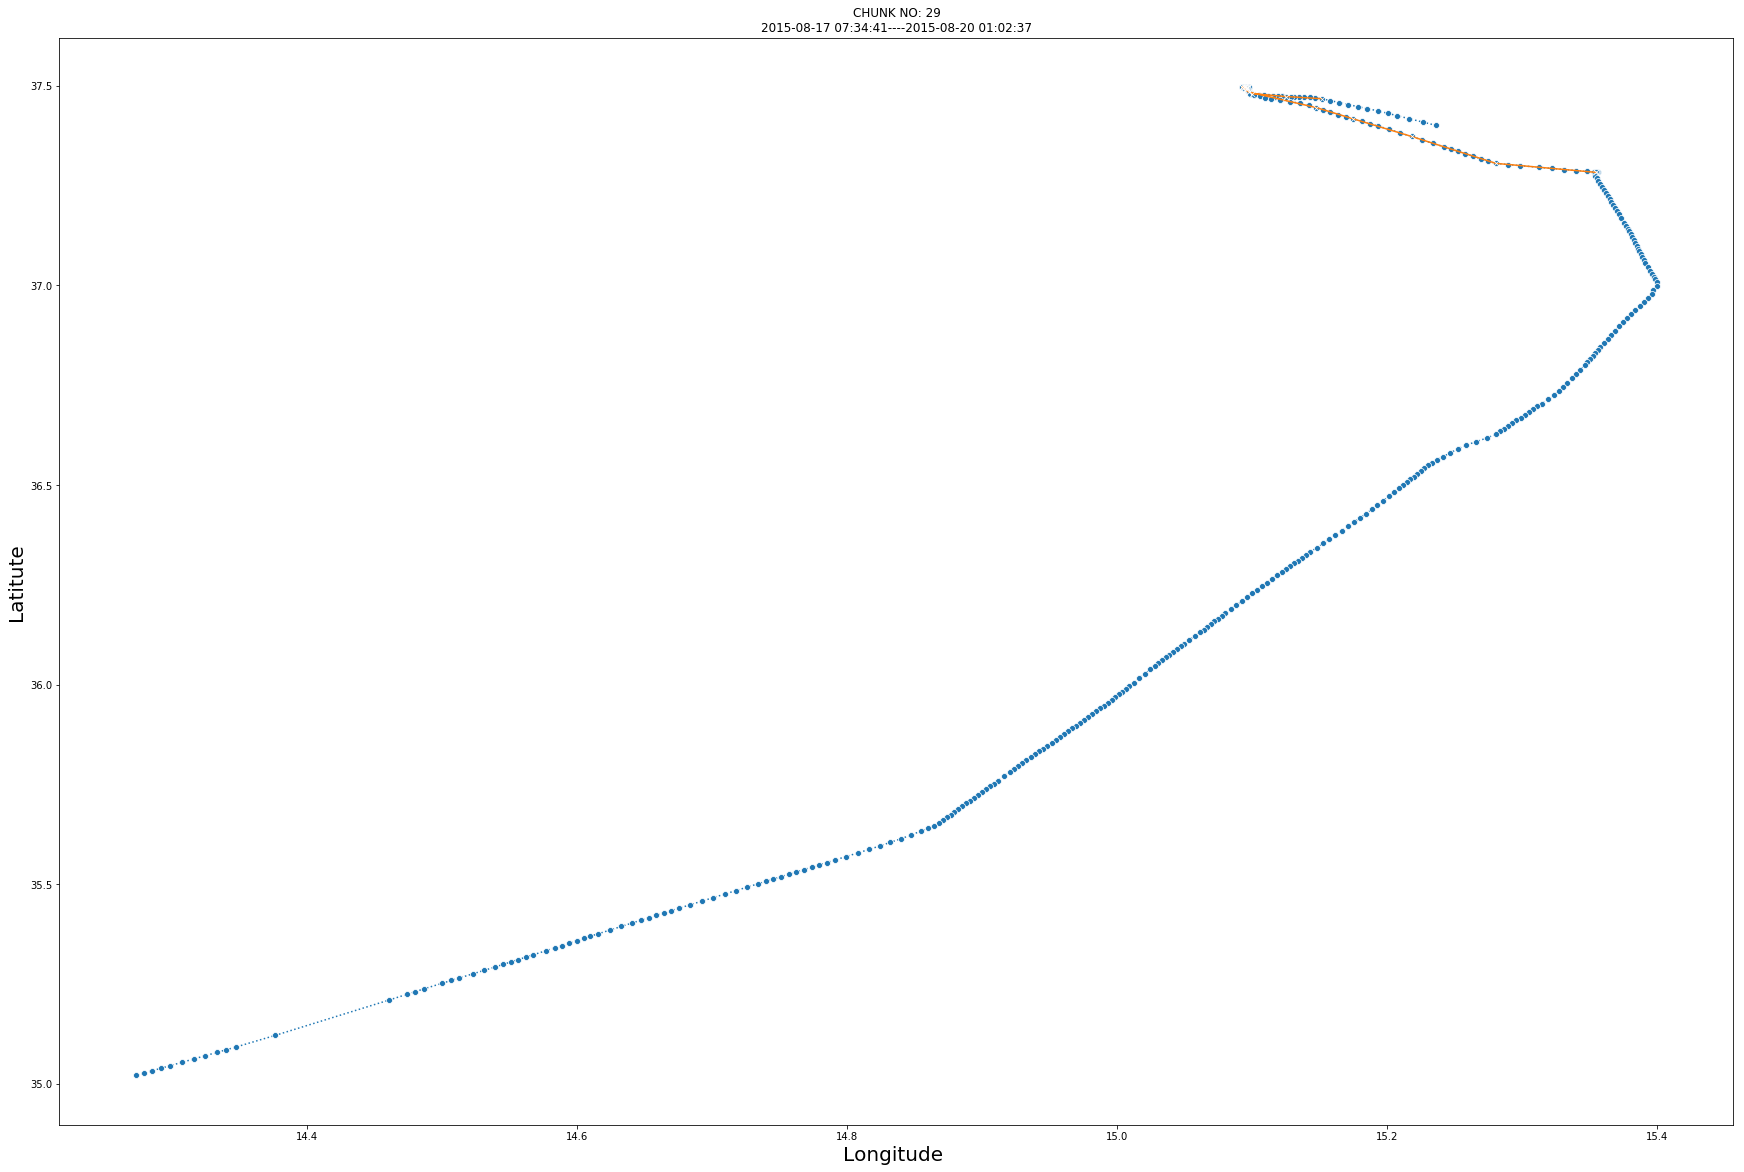

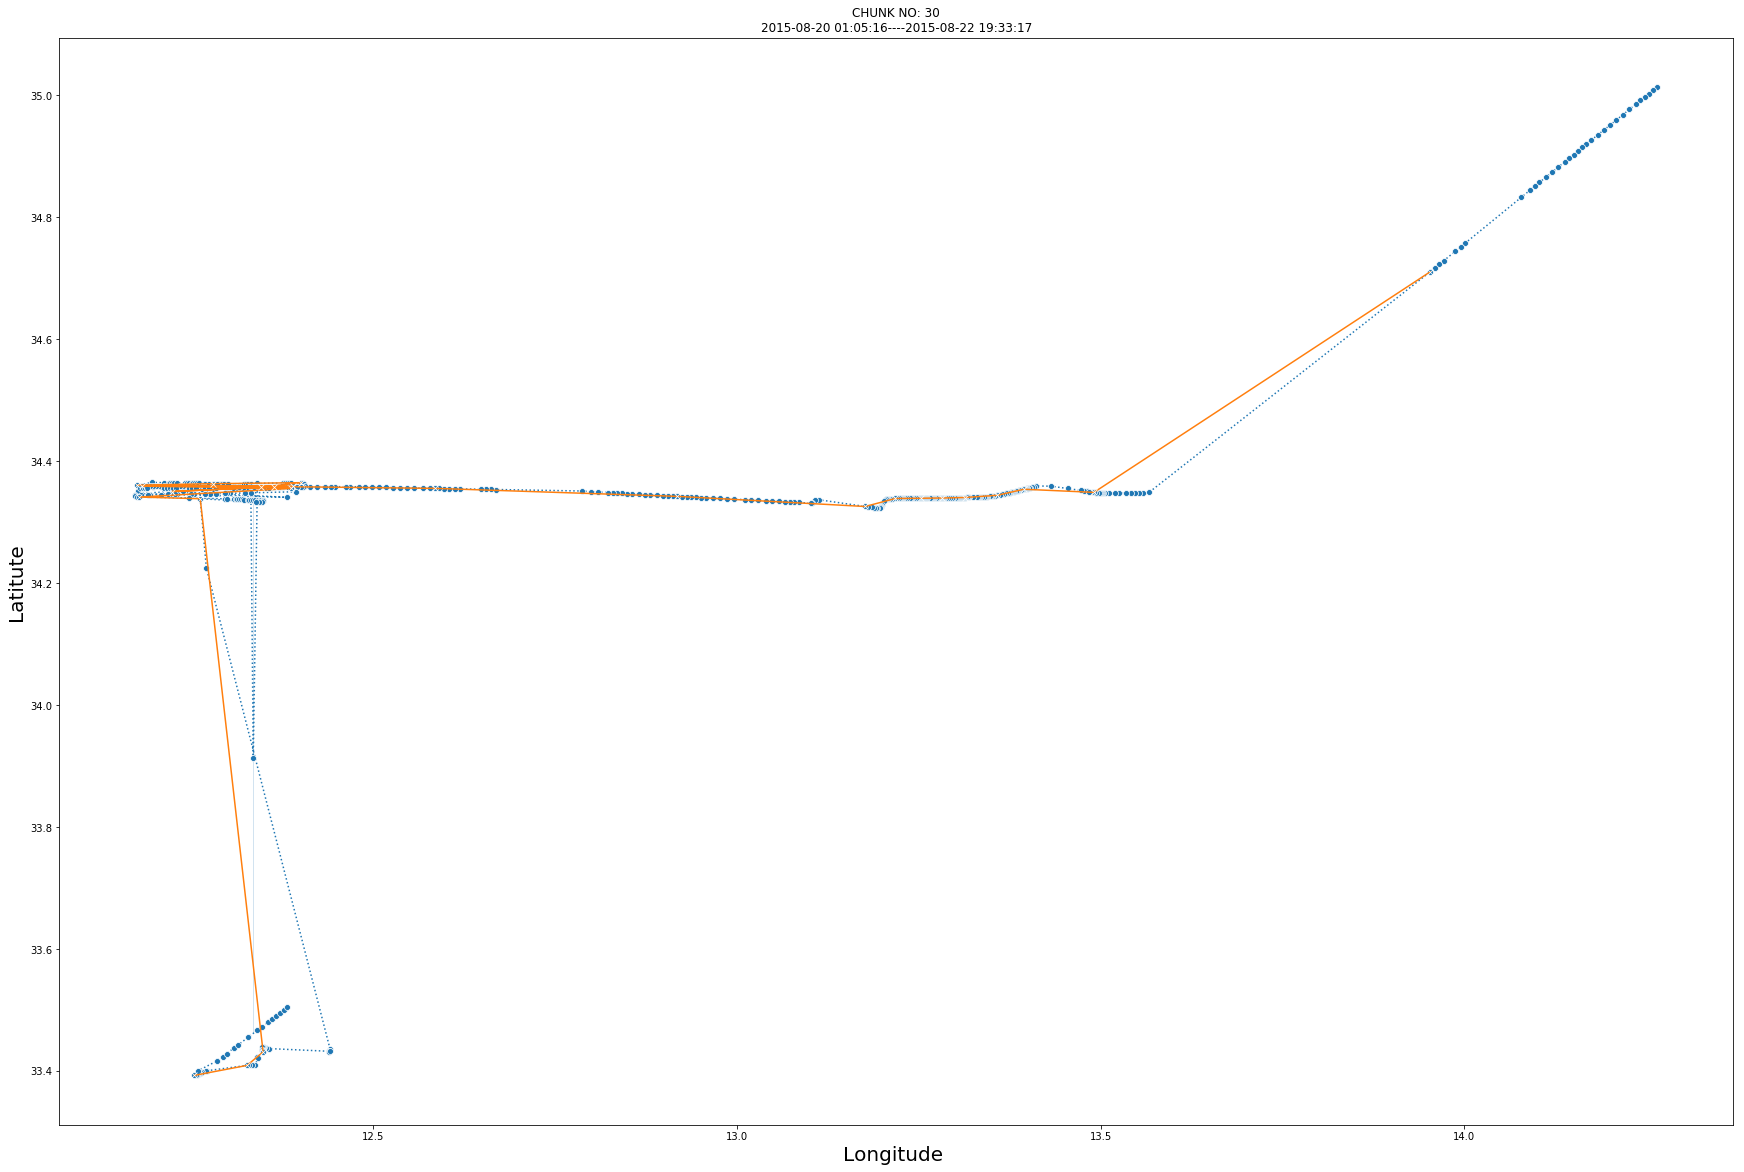

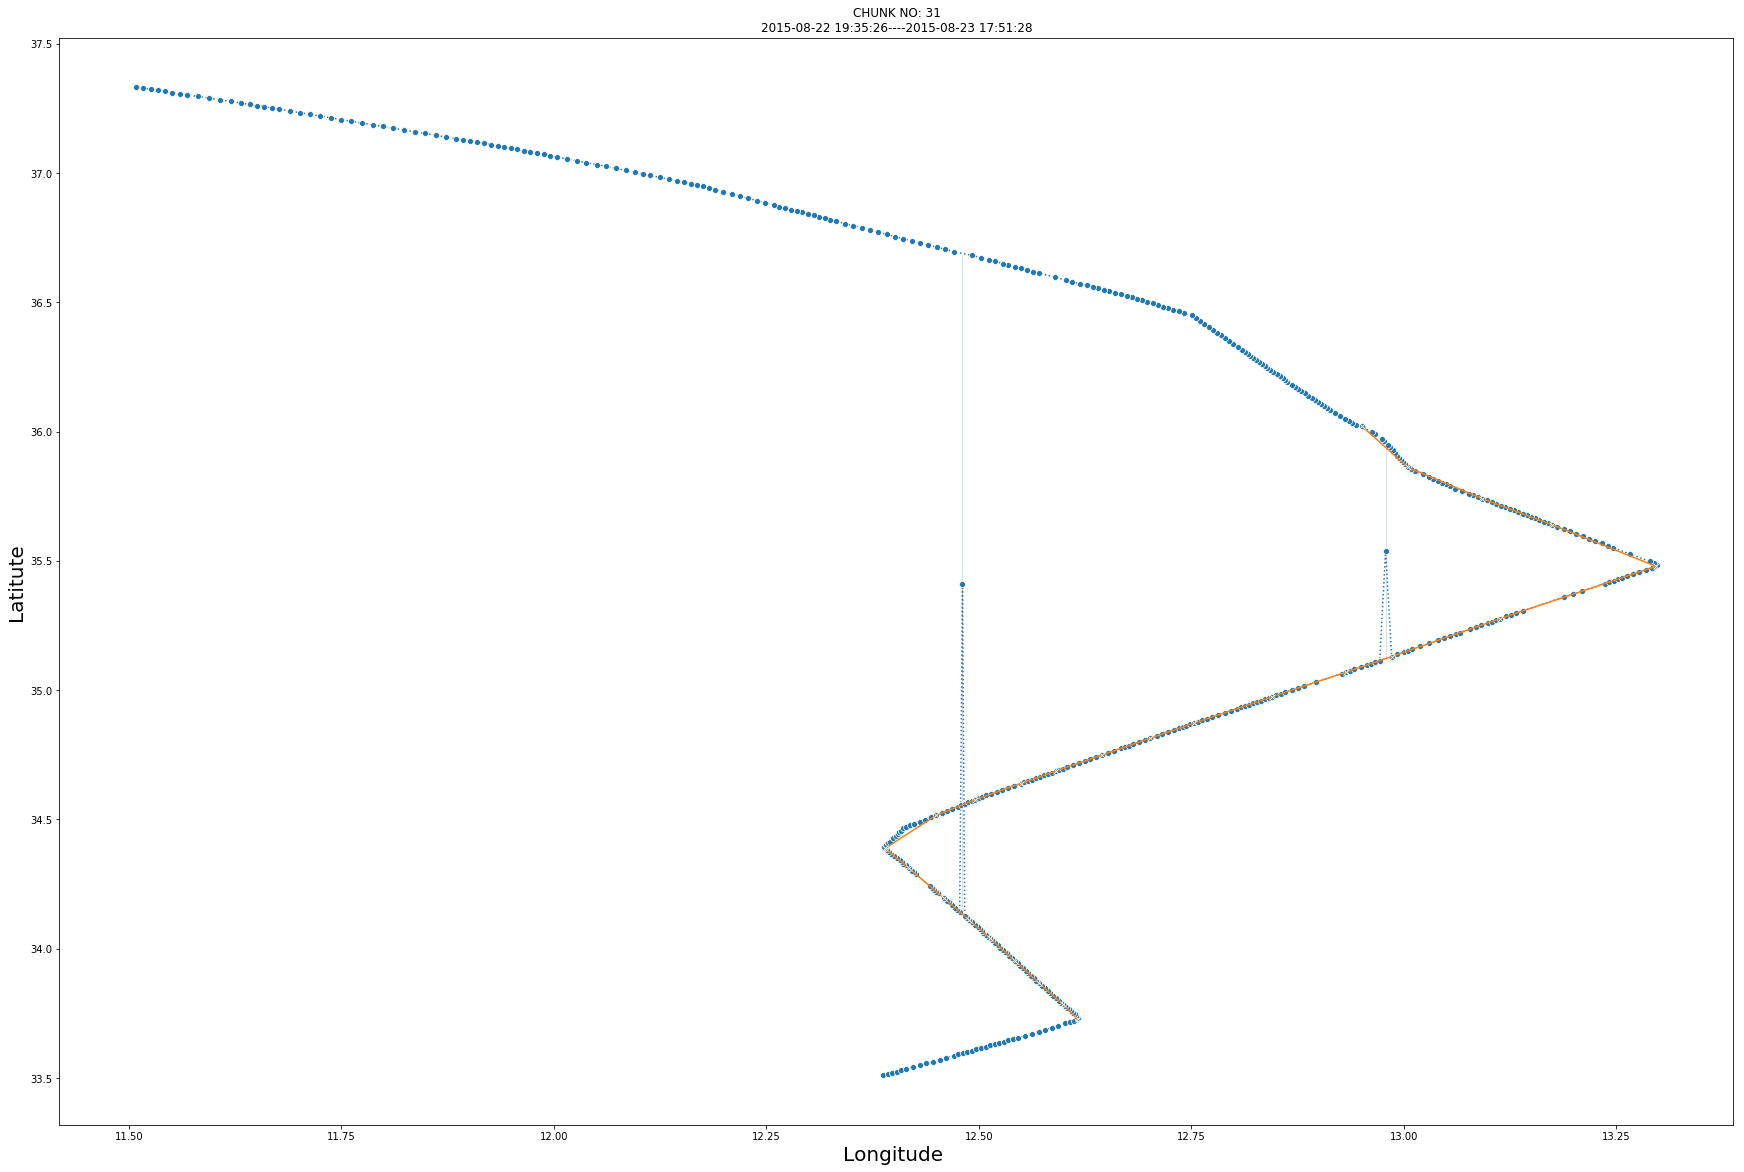

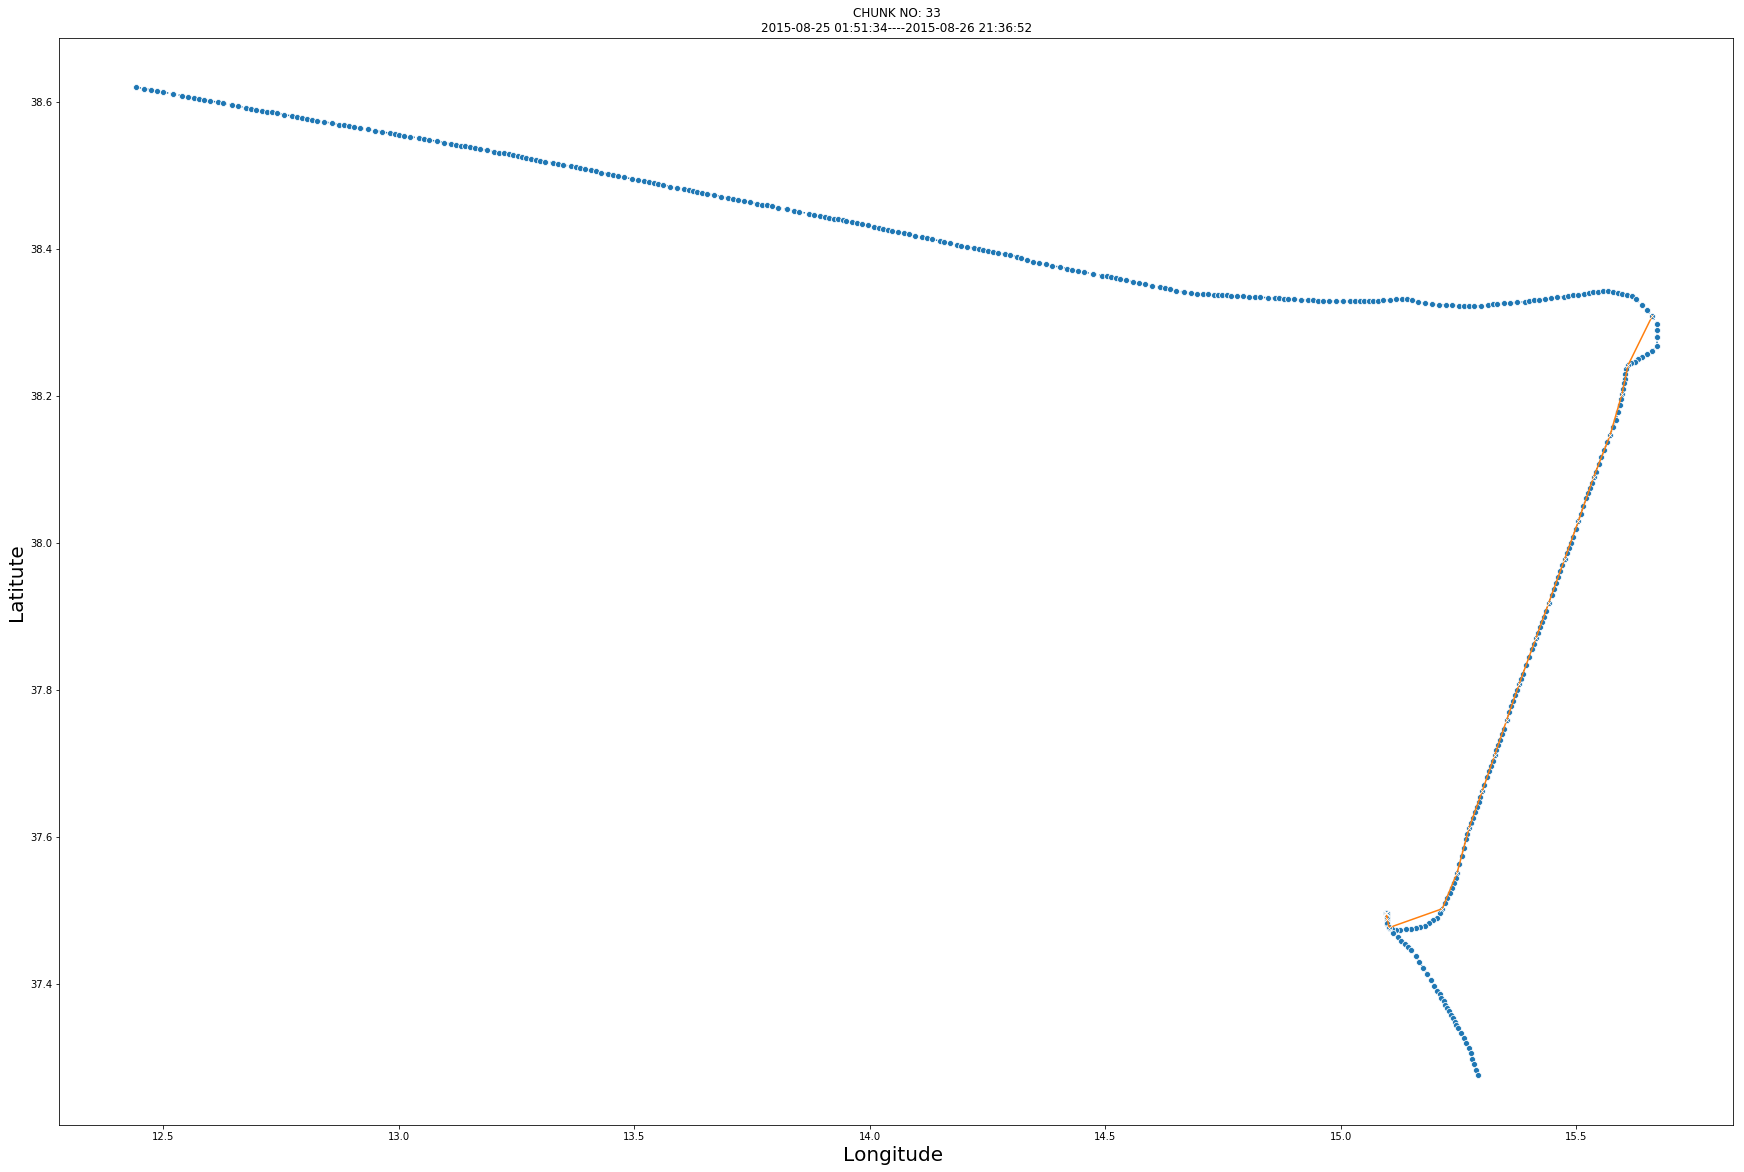

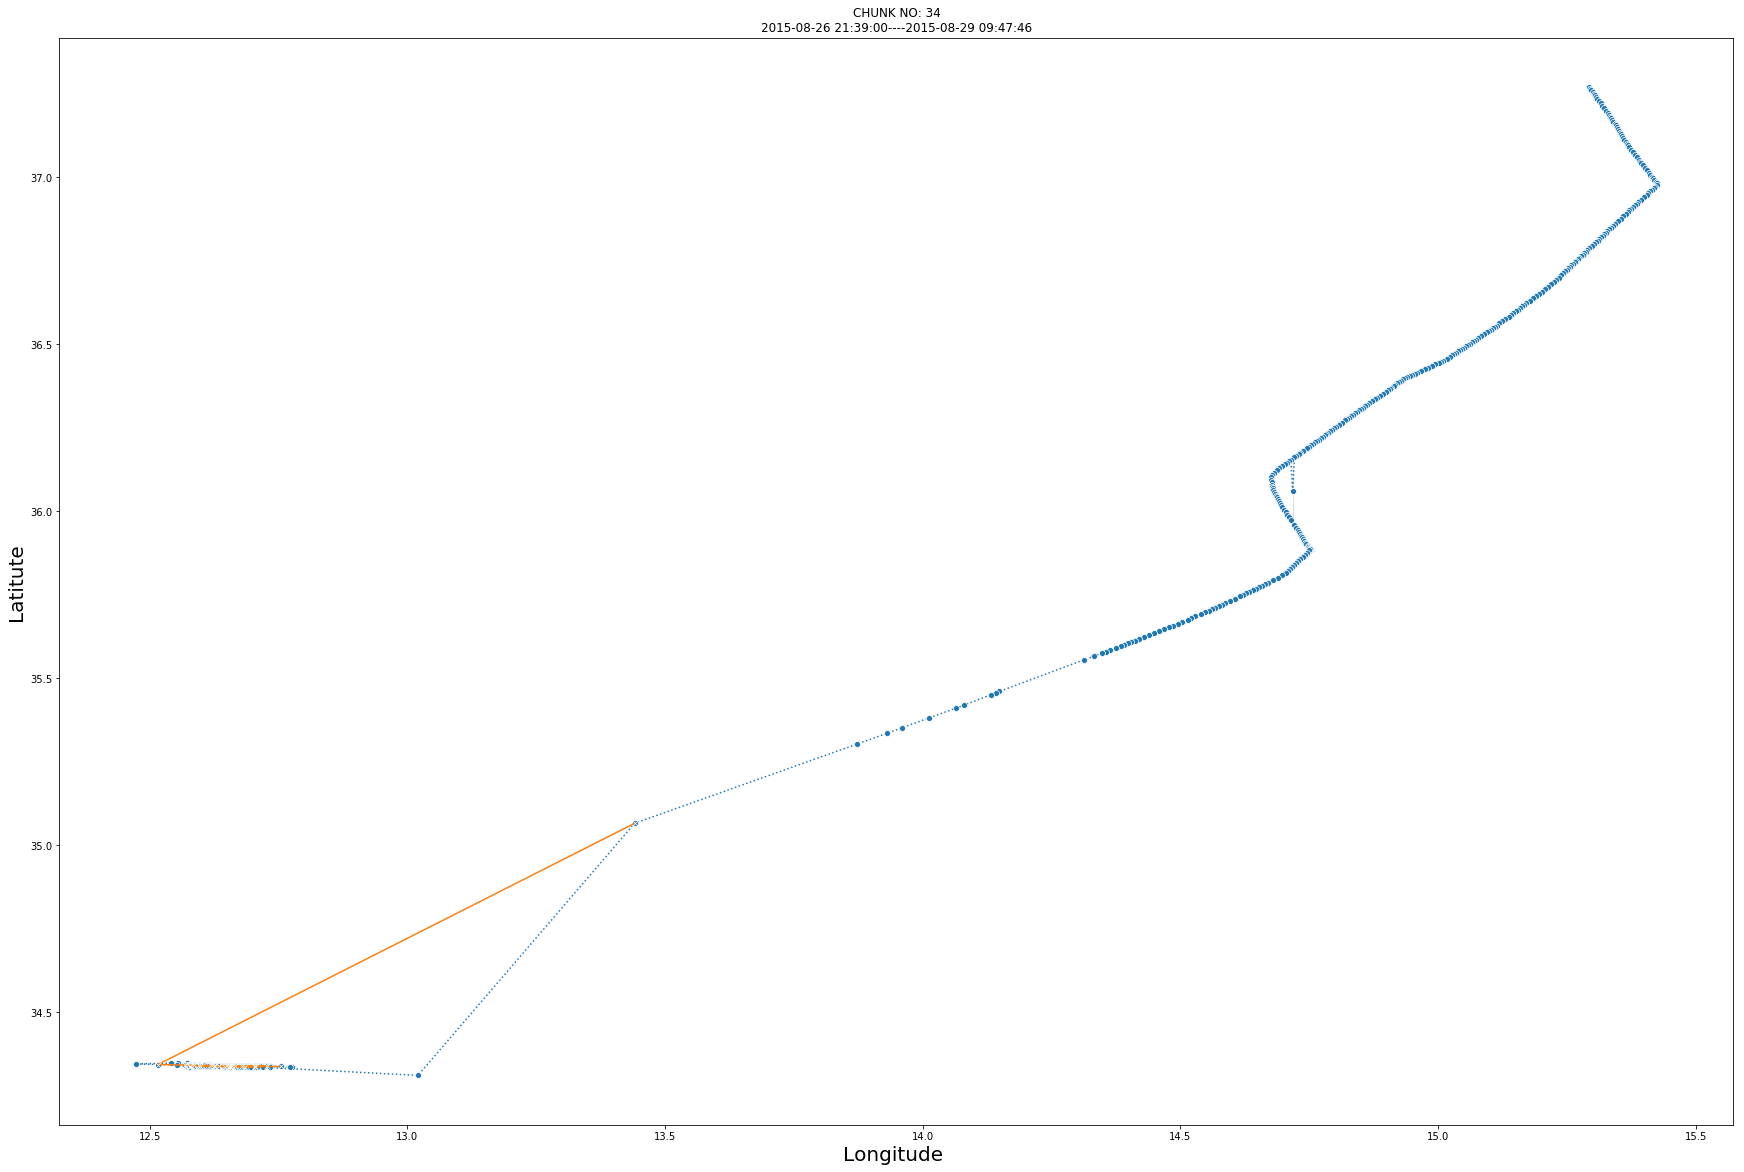

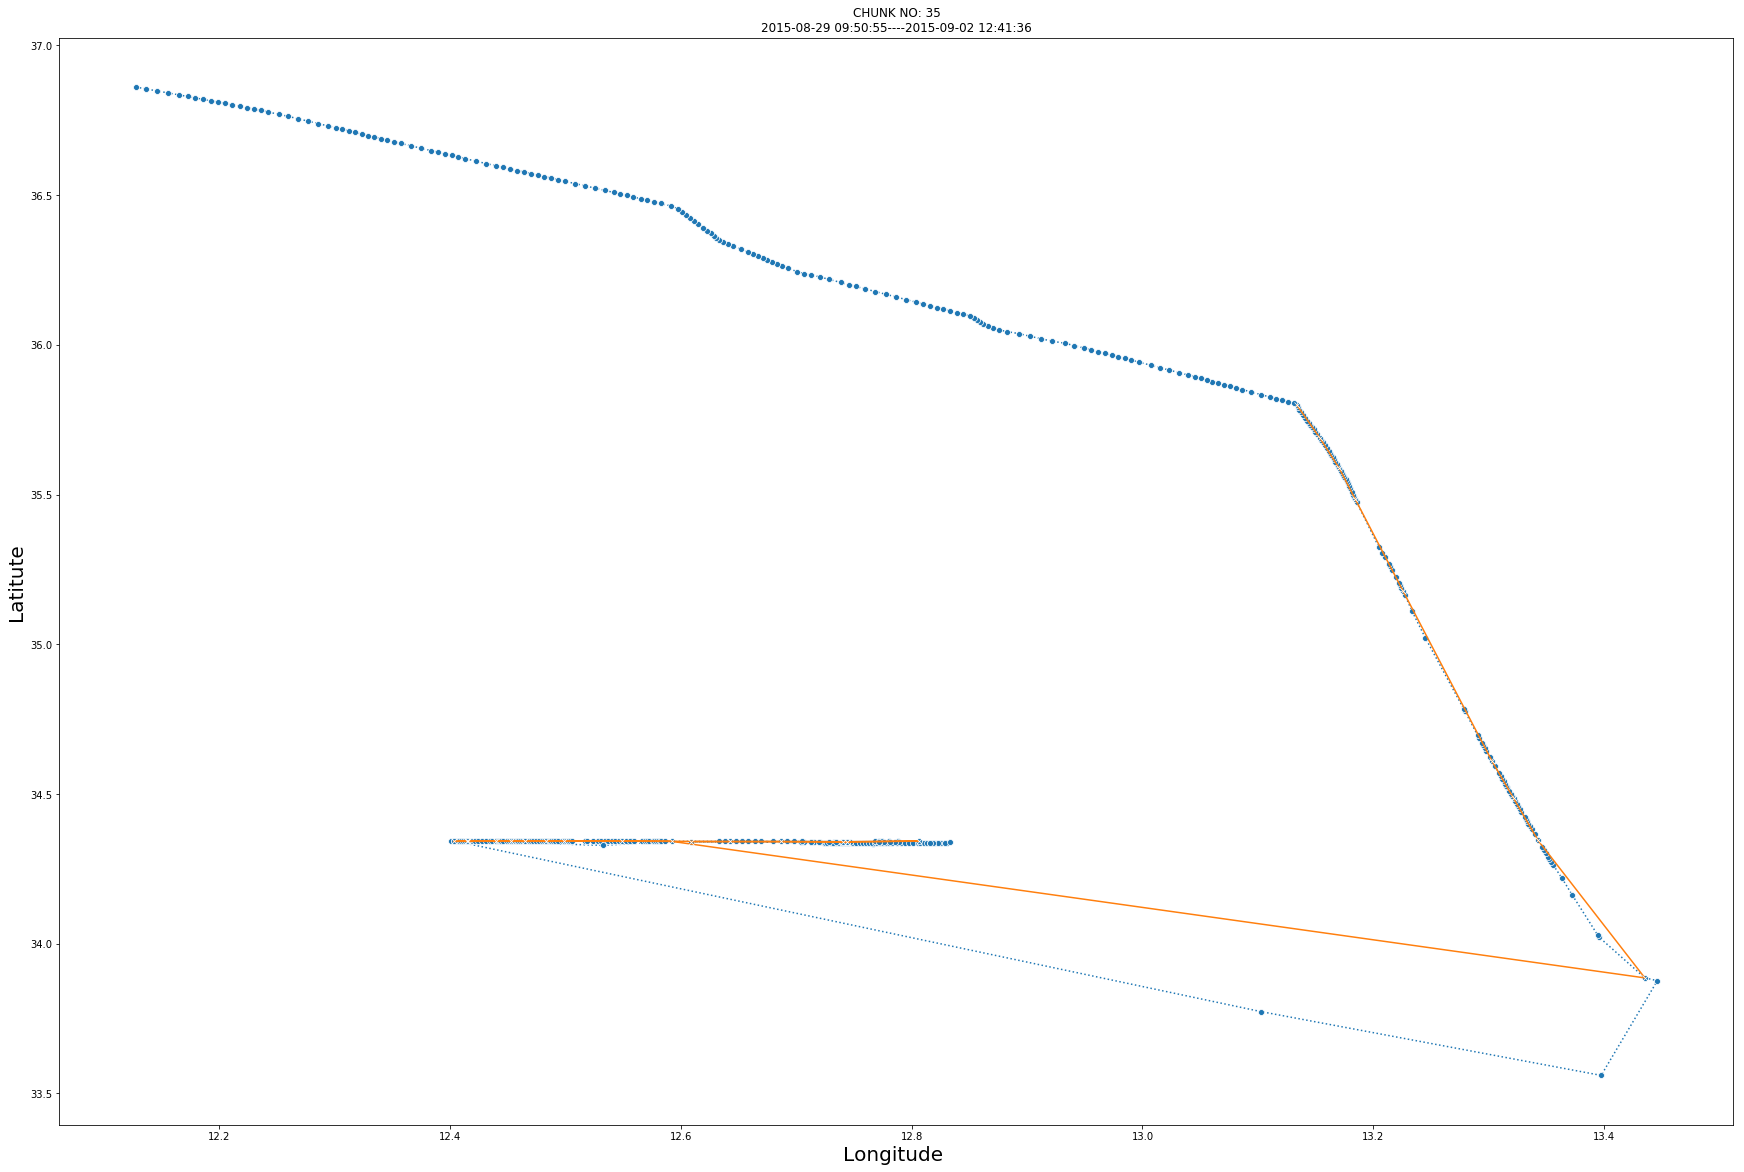

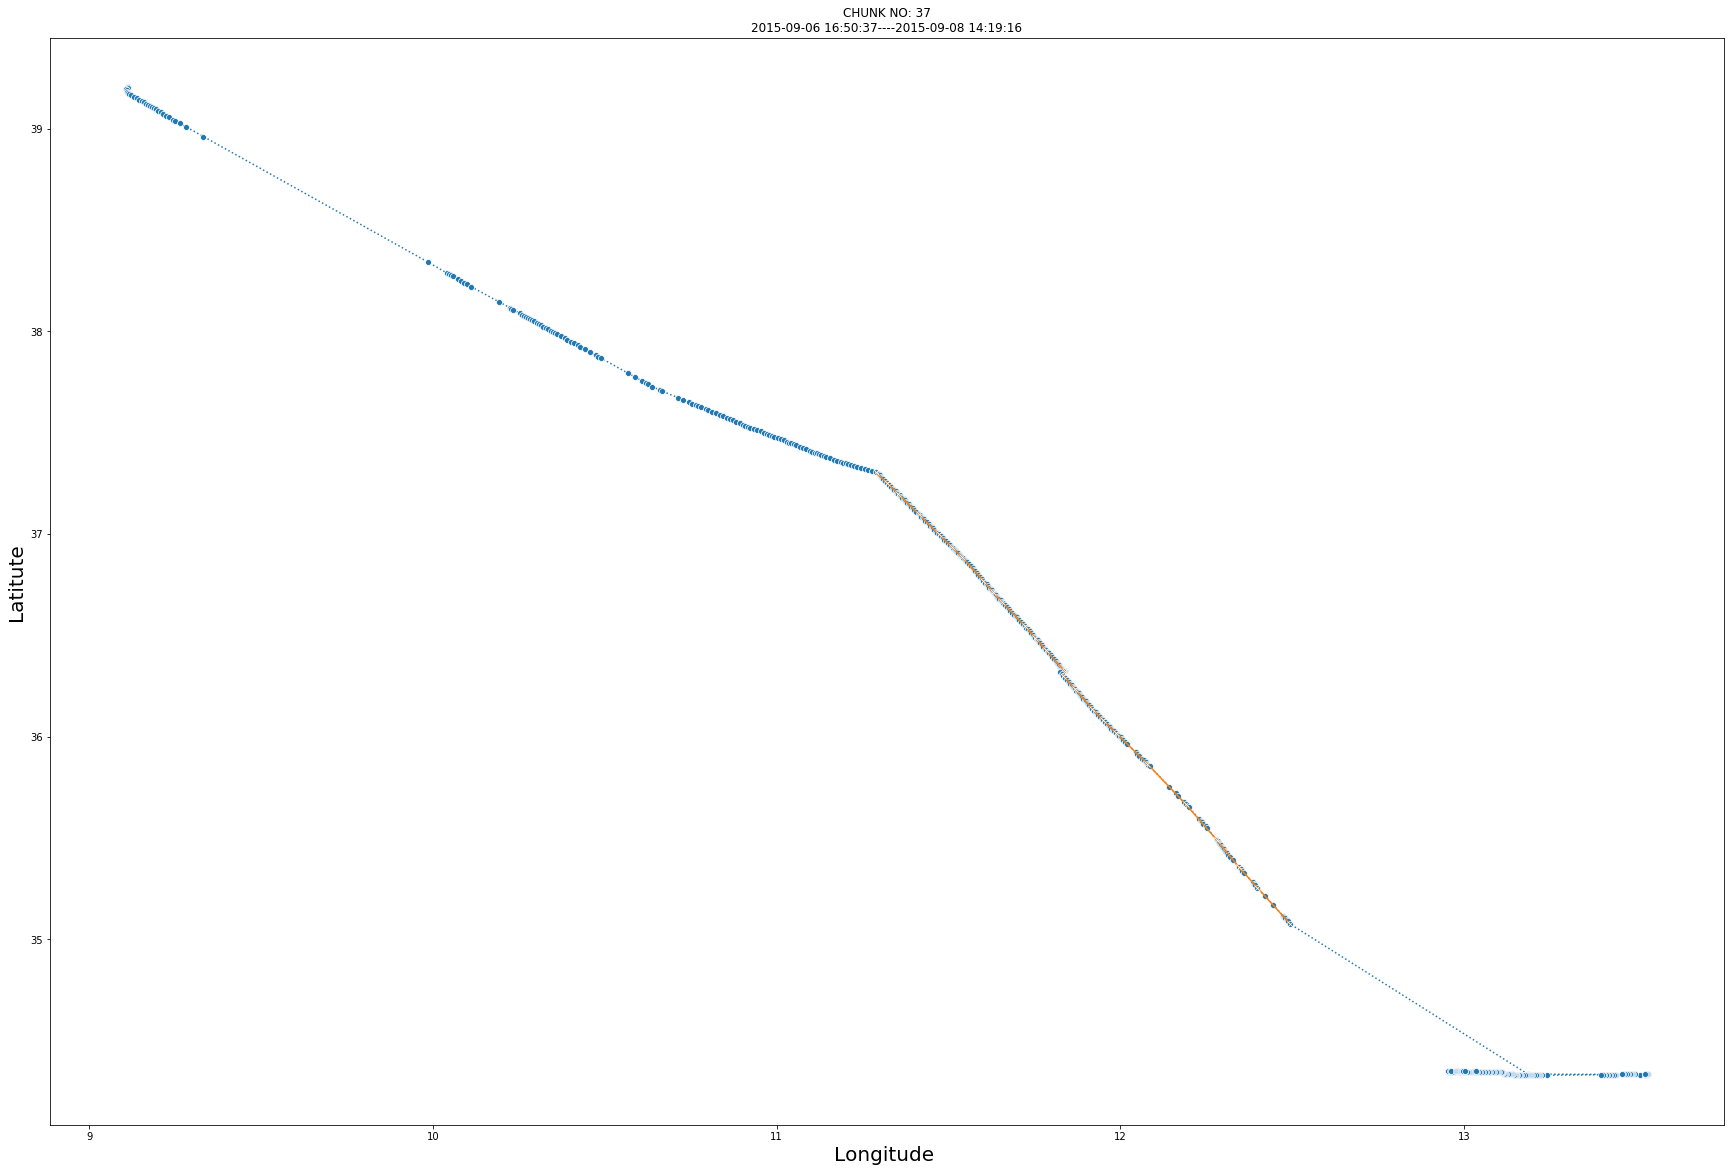

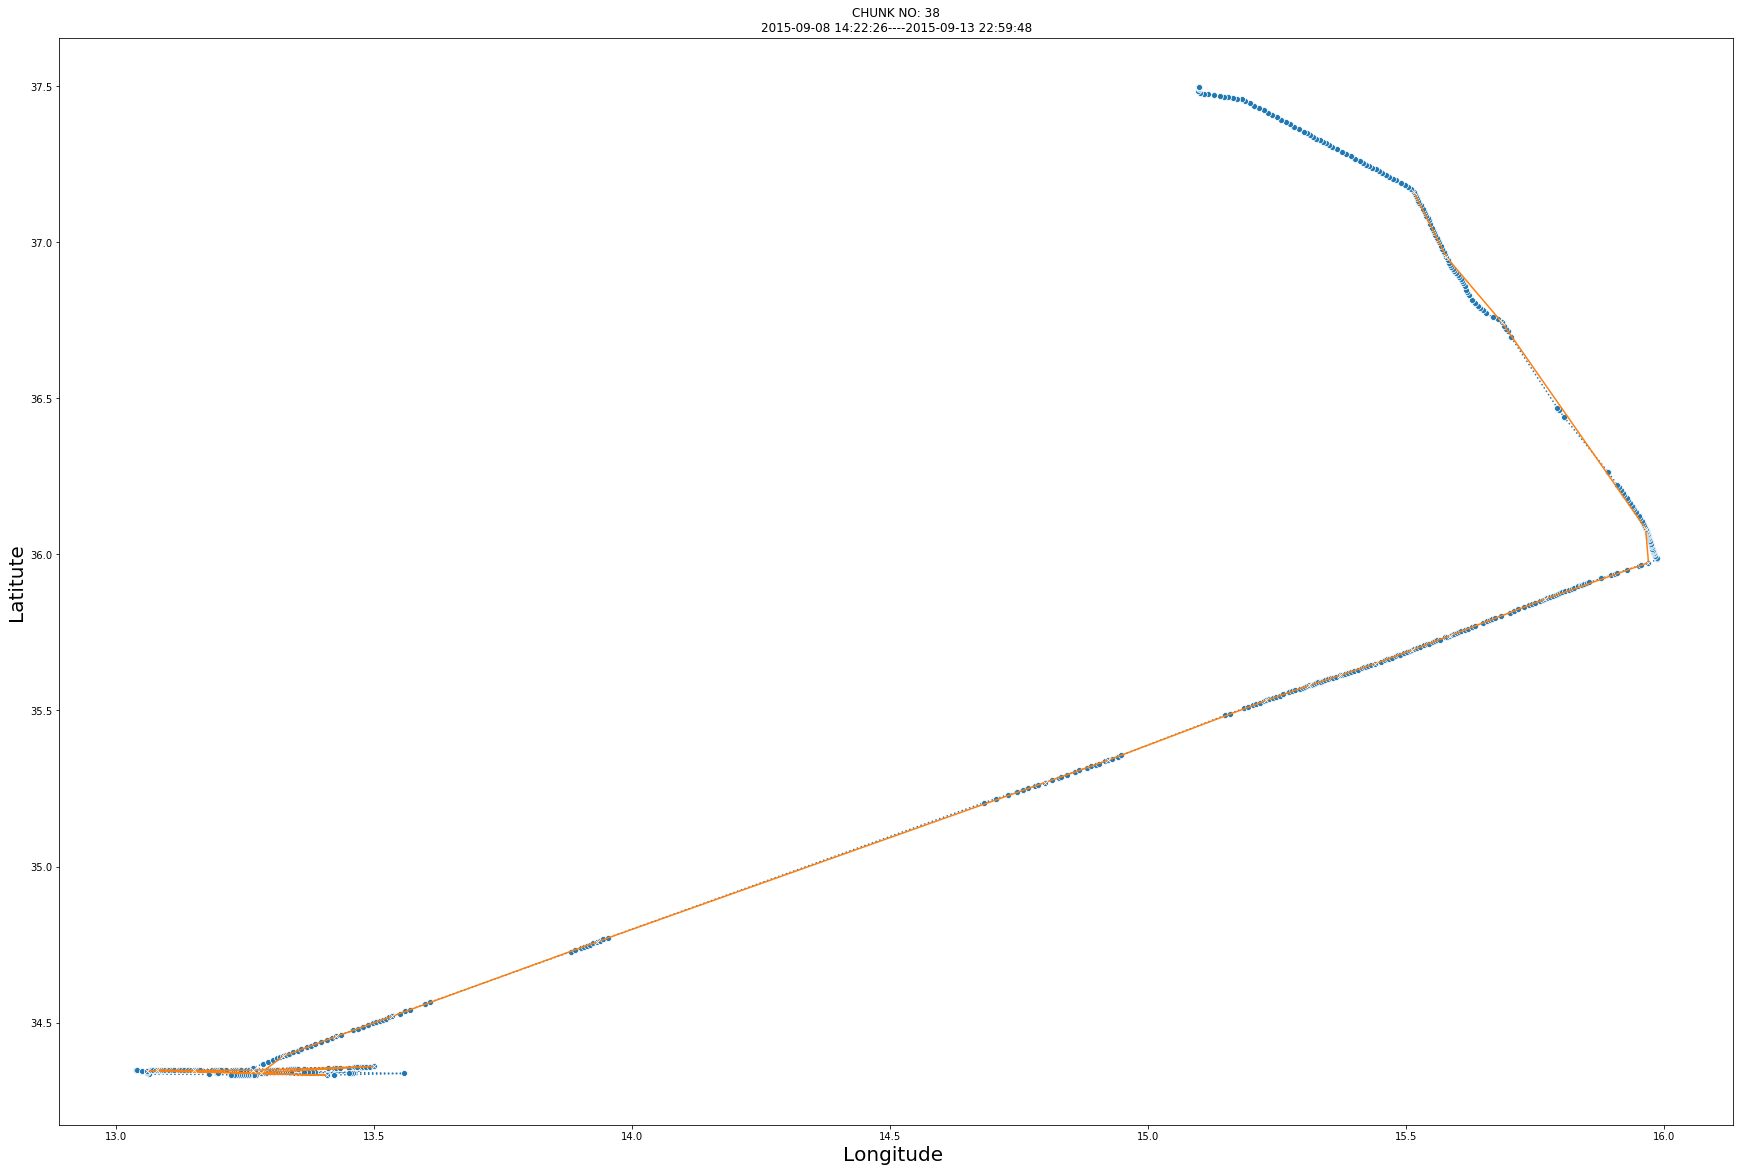

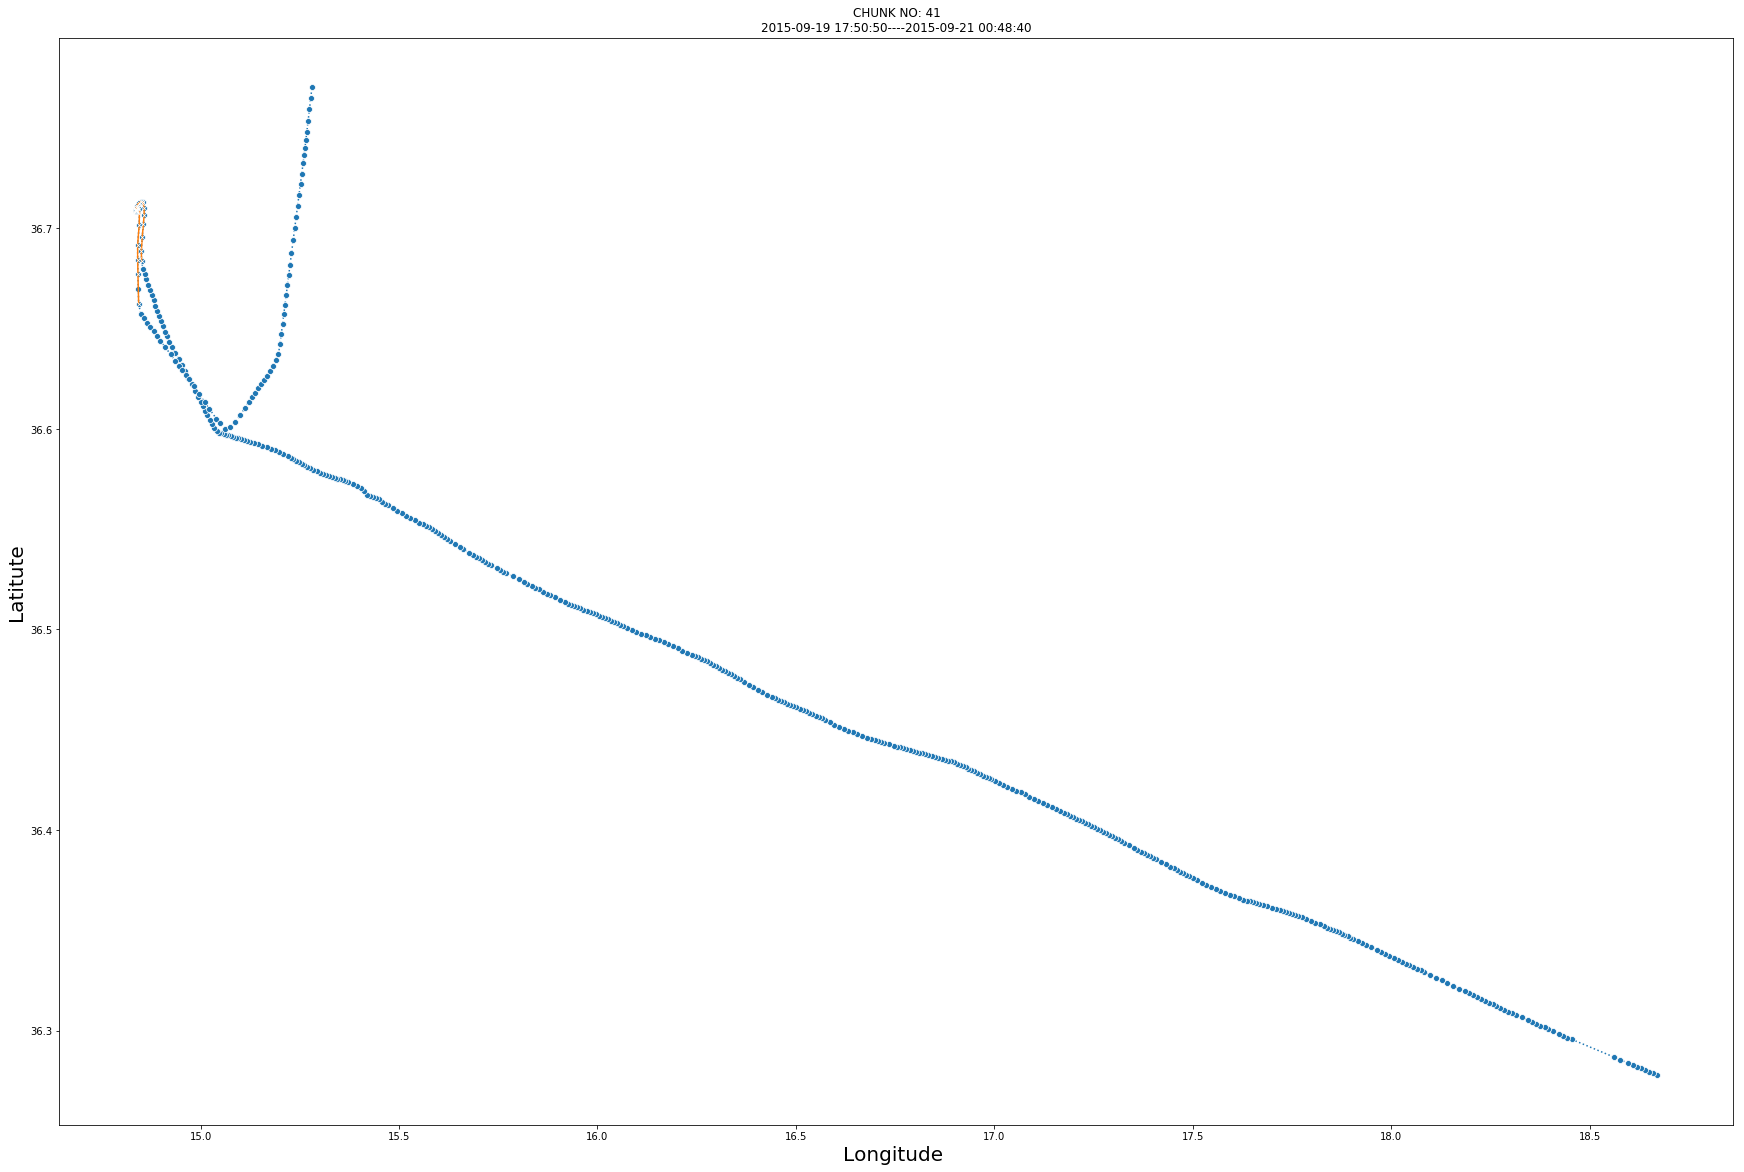

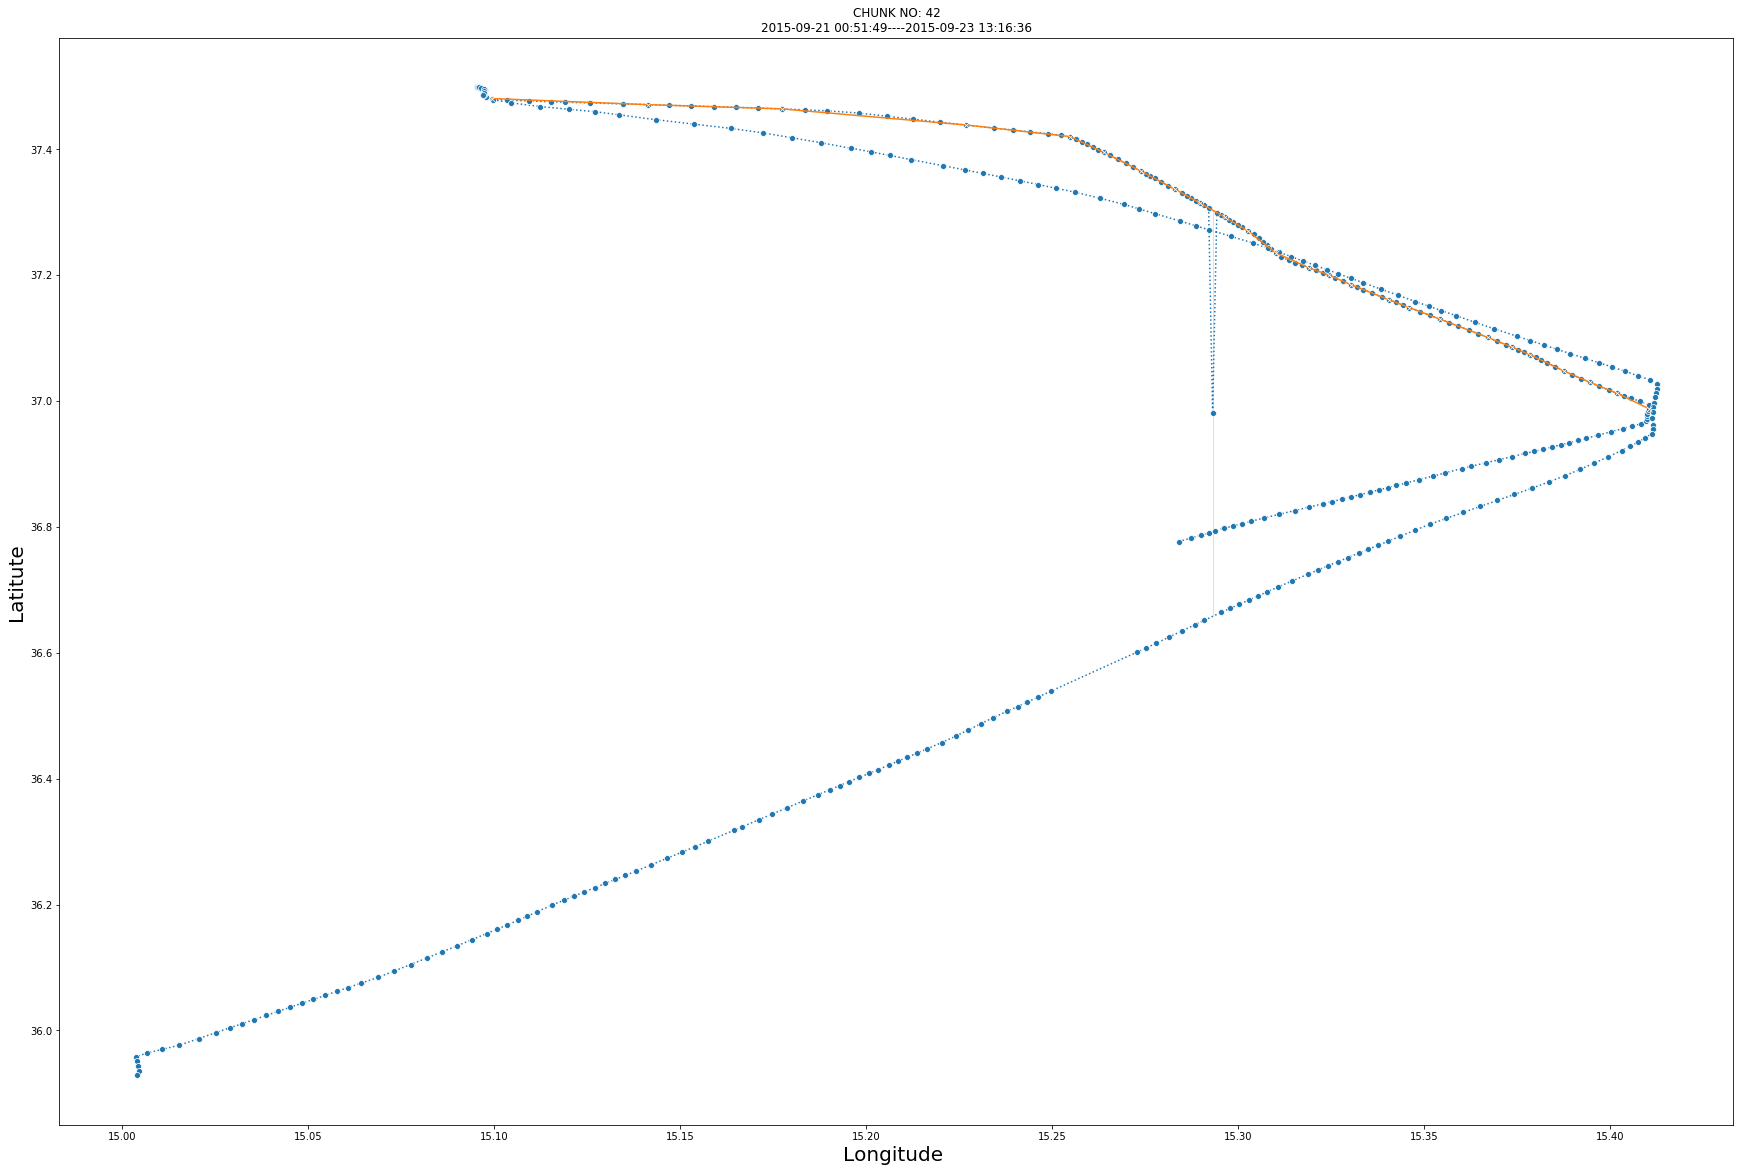

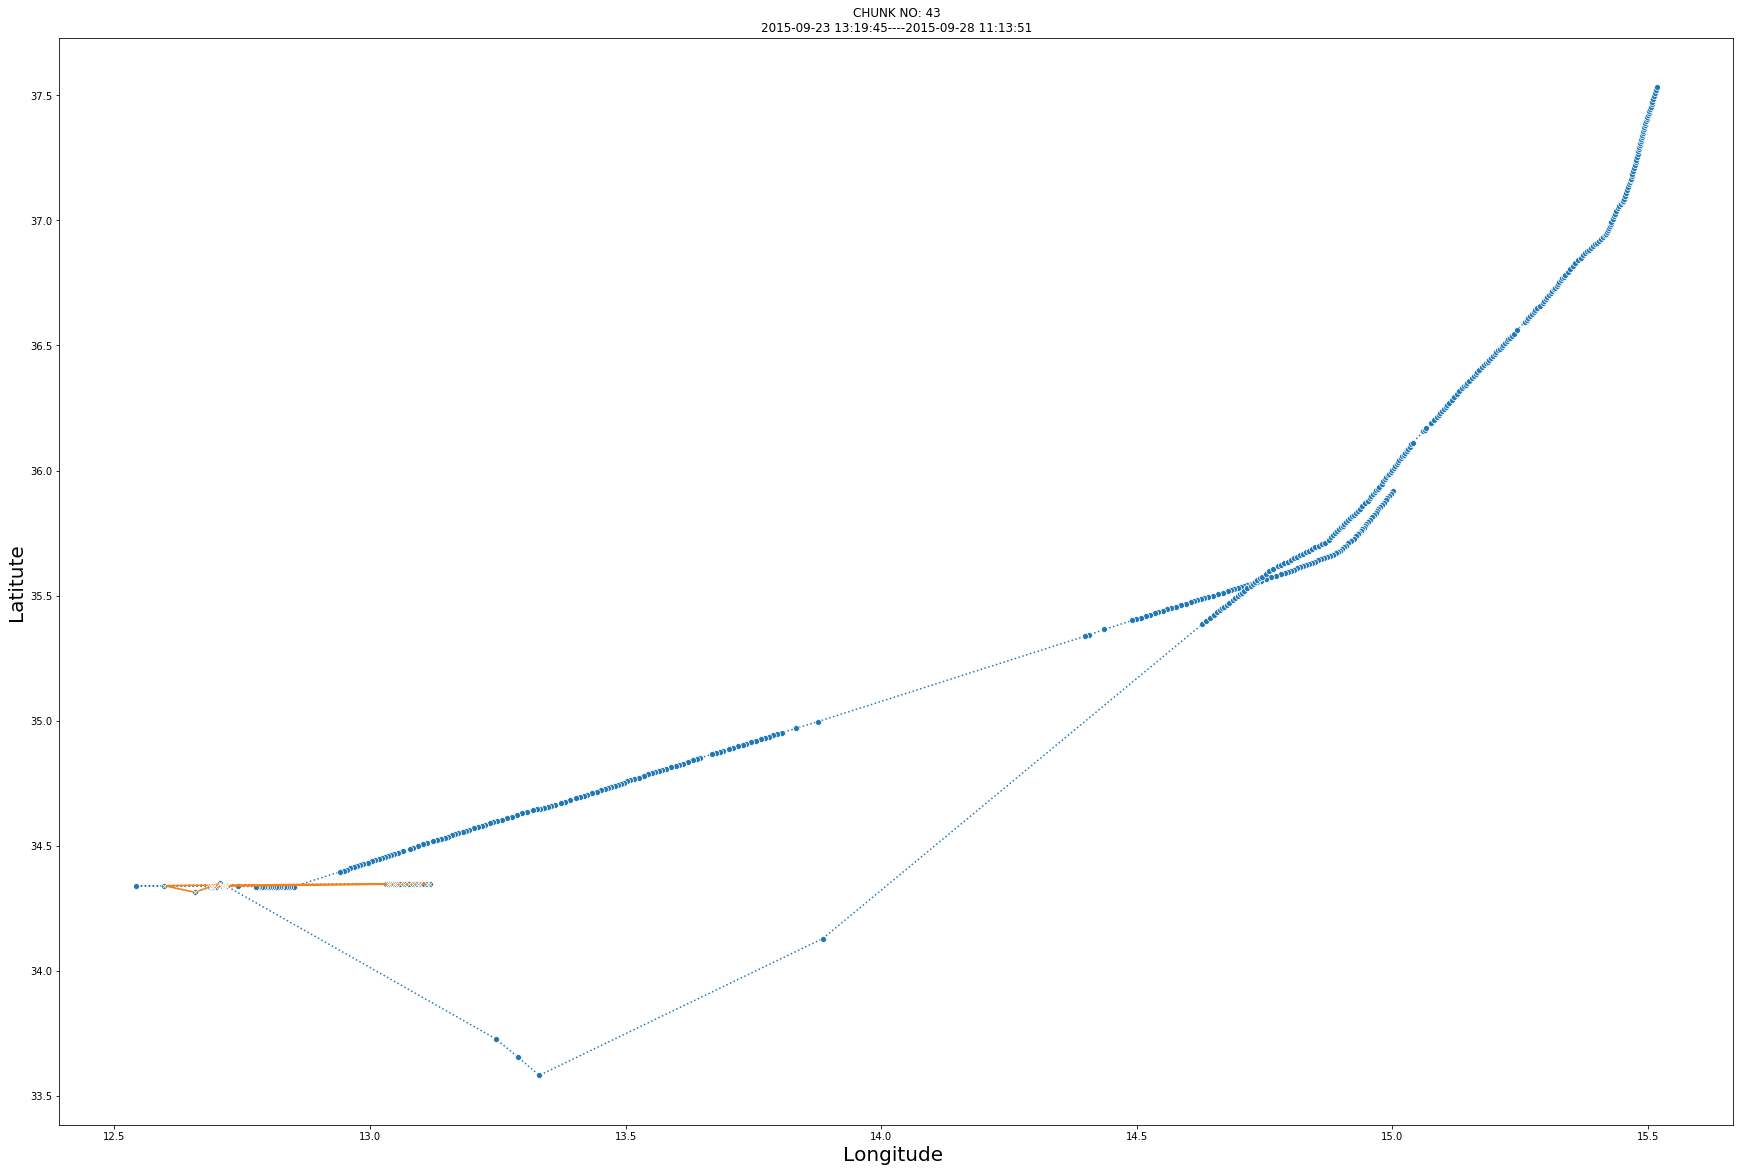

In [29]:
linestyles = ['-', '--', '-.', ':']
for idx,x in enumerate(ship_dfs):
    data_scaled=scale_down(x,train_test_options["split"])
    real_data=x
    if len(data_scaled) == train_test_options["split"]:
        fig, axs= plt.subplots(1, 1, figsize=(30, 20),sharex=True)    
        start = datetime.strftime(x["TIMESTAMP"].head(1).iloc[0],'%Y-%m-%d %H:%M:%S')
        end = datetime.strftime(x["TIMESTAMP"].tail(1).iloc[0],'%Y-%m-%d %H:%M:%S')
        title = "CHUNK NO: "+str(idx)+"\n"+start+"----"+end
        axs.set_title(title)
            # Plot using Seaborn
        pd
        ax = sns.lineplot(x='LON', y='LAT', data=real_data, ax=axs,sort=False,marker="o")
        ax = sns.lineplot(x='LON', y='LAT', data=data_scaled, ax=axs,sort=False,marker='x',legend="full")
        ax.lines[0].set_linestyle(':')
#         for j, point in data.iterrows():
#             ax.text(point['LON']+0.0011, point['LAT'], str(point['HEADING']),fontsize=20)
    
#         fig.set_size_inches(30, 20)
        axs.set_ylabel('Latitute', fontsize = 20.0) # Y label
        axs.set_xlabel('Longitude ', fontsize = 20.0) # X label


In [4]:
# start = real_data.iloc[0]["TIMESTAMP"]
# end = real_data.iloc[-1]["TIMESTAMP"]

# n['TIMESTAMP'] = pd.to_datetime(n['TIMESTAMP'])  
# mask = (n['TIMESTAMP'] > start) & (n['TIMESTAMP'] <= end)
# n_data = n[mask]
# print(n_data)